## import some Required libraries and data 

<h4 style="text-align:center; " > <b> import libraries

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

<h4 style="text-align:center; " > <b>import data

In [112]:
data = pd.read_csv("Data/2019/survey_results_public.csv")
data_schema= pd.read_csv("Data/2019/survey_results_schema.csv")



<h4 style="text-align:center; " > <b>what we can see when we calling specific data from files  

In [113]:
pd.set_option('display.max_columns', 6)   # number of Colums
pd.set_option('display.max_rows', None)   # number of Rows

##  Create functions for data processing

<h4 style="text-align:center; " > <b> Schedules

In [114]:
# Schedules with percent 

def Build_Barh_sizes( key_Phrases , Quantity , Filtered_data ,style , x_axis_visible, sizes, title ):
    
    fig, ax = plt.subplots(figsize=(sizes))

    


    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """

    ax.set_facecolor('xkcd:black')
    fig.patch.set_facecolor('xkcd:black')
    
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.grid(alpha=0.2)
    ax.title.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """



    langs = key_Phrases   # add key_Phrases into new variable

    langs_users_num = np.array(Quantity)

    total = len(Filtered_data)

    percent = langs_users_num/total*100


    new_labels = [i+'  {:.1f}%'.format(j) for i, j in zip( langs, percent )]   # percentage


    plt.barh(langs, langs_users_num)  # Chart
    plt.yticks( range(len(langs)), new_labels) # Ylabel 

    

    for spine in ax.spines.values():    # vertical lines   exist - clear
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # X-label,   numbers show-hide
    ax.tick_params(axis="y", left=False)
    

    plt.style.use(style)   # chart style

    plt.title(title)  # add title




    # change the fontsize of the xtick and ytick labels
    plt.rc('xtick', labelsize=13)
    plt.rc('ytick', labelsize=13)

    # change the fontsize of axes title
    plt.rc('axes', titlesize=18)

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 10)
    ax.yaxis.set_tick_params(pad = 10)


    
    plt.show()


In [115]:
# Schedules without percent 

def Build_Barh_sizes_withot_percent (key_Phrases , Quantity  ,style , x_axis_visible, sizes, title ) :
    
    fig, ax = plt.subplots(figsize=(sizes))


    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """

    ax.set_facecolor('xkcd:black')
    fig.patch.set_facecolor('xkcd:black')
    
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.grid(alpha=0.2)
    ax.title.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    """ COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR--COLOR  """




    langs = key_Phrases  # add key_Phrases into new variable

    langs_users_num = np.array(Quantity)


    new_labels = [i+'  {:.1f}'.format(j) for i, j in zip(langs, Quantity)]   # percentage



    plt.barh(langs, langs_users_num)  # chart 
    plt.yticks(range(len(langs)), new_labels) # Ylabel 



    for spine in ax.spines.values():    # vertical lines   exist - clear
        spine.set_visible(False)

    ax.axes.get_xaxis().set_visible(x_axis_visible)  # X-label,   numbers show-hide
    ax.tick_params(axis="y", left=False)

    plt.style.use(style)   # chart style


    plt.title(title)  # add title

    # change the fontsize of the xtick and ytick labels
    #plt.rc('xtick', labelsize=13)
    #plt.rc('ytick', labelsize=13)

    # change the fontsize of axes title
    #plt.rc('axes', titlesize=18)

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 10)
    ax.yaxis.set_tick_params(pad = 10)



    plt.show()


<h4 style="text-align:center; " > <b>Increase-decrease function  (Dictionary)

In [116]:
def sort_Dictionary(Dictionary, reverse = False):        # Sorts by decrease-growth
    return dict(sorted(Dictionary.items(), key = lambda x: x[1], reverse = reverse)) 

<h4 style="text-align:center; " > <b>Double list sorter-counter function (lists in list)

In [117]:
def Double_list_sort_count(filtered_list ,Increase_decrease):
  
  global key_Phrases    # We declare it as a global variable         reason: To use in other functions
  global Quantity       # We declare it as a global variable         reason: To use in other functions
  global union

  union = []                          # One big list                 reason: To save every list element (for easy count)

  for i in filtered_list:
      for k in i :                    # this function takes all lists elemets and add them into big list (union) 
          union.append(k)

  Counted = Counter(union)            # Count everysing into big list (union) 

  
  sorted = sort_Dictionary(Counted , Increase_decrease)  # Sorts by decrease-growth    "answer will be Dictinary"


  key_Phrases = []  # It contein Phrases 
  Quantity = []     # It contein Quantity of variable

  

  items = sorted.items()    # Takes items from Dictinary 

  for item in items:      
      key_Phrases.append(item[0])   # Add Phrases into Phrases' list
      Quantity.append(item[1])      # Add Quantity into Quantity' list


<h4 style="text-align:center; " > <b>The most common function for lists  (not lists in list just one list)

In [118]:
def Dictionary_Distributor(filtered_list , Increase_decrease):

    global key_Phrases      # We declare it as a global variable         reason: To use in other functions
    global Quantity         # We declare it as a global variable         reason: To use in other functions

    Counted = Counter(filtered_list)   # Count everysing into filtered_list

    sorted = sort_Dictionary (Counted , Increase_decrease)  # Sorts by decrease-growth    "answer will be Dictinary"

    key_Phrases = []    # It contein Phrases 
    Quantity = []       # It contein Quantity of variable

    for i in sorted:
        key_Phrases.append(i)           # Add Phrases into Phrases' list
        Quantity.append(sorted[i])      # Add Quantity into Quantity' list

<h4 style="text-align:center; " > <b>Rare functions 

In [119]:
def Stacking_Less_than_5( data_list):   # This function sorts variables
    
    global full_info

    full_info = {}


    Less_than_5 = []
    from_5_9 = []
    from_10_14 = []
    from_15_19 = []
    from_20_24 = []
    from_25_29 = []
    from_30_34 = []
    from_35_39 = []
    from_40_44 = []
    from_45_49 = []
    more_50 = []



    for i in data_list:   # Distribution function

        if i in ["1", "2" ,"3" ,"4", "Less than 1 year"]:
            Less_than_5.append(i)
        elif i in ["5","6","7","8","9"]:
            from_5_9.append(i)
        elif i in ["10","11","12","13","14"]:
            from_10_14.append(i)
        elif i in ["15","16","17","18","19"]:
            from_15_19.append(i)
        elif i in ["20","21","22","23","24"]:
            from_20_24.append(i)
        elif i in ["25","26","27","28","29"]:
            from_25_29.append(i)
        elif i in ["30","31","32","33","34"]:
            from_30_34.append(i)
        elif i in ["35","36","37","38","39"]:
            from_35_39.append(i)
        elif i in ["40","41","42","43","44"]:
            from_40_44.append(i)
        elif i in ["45","46","47","48","49"]:
            from_45_49.append(i)
        else :
            more_50.append(i)
    

    Less_than_5 = len(Less_than_5) 
    from_5_9 = len(from_5_9) 
    from_10_14 = len(from_10_14) 
    from_15_19 = len(from_15_19) 
    from_20_24 = len(from_20_24) 
    from_25_29 = len(from_25_29) 
    from_30_34 = len(from_30_34) 
    from_35_39 = len(from_35_39) 
    from_40_44 = len(from_40_44) 
    from_45_49 = len(from_45_49) 
    more_50 = len(more_50) 

    full_info["Less than 5 years"] = Less_than_5
    full_info["5 to 9 years"] = from_5_9
    full_info["10 to 14 years"] = from_10_14
    full_info["15 to 19 years"] = from_15_19
    full_info["20 to 24 years"] = from_20_24
    full_info["25 to 29 years"] = from_25_29
    full_info["30 to 34 years"] = from_30_34
    full_info["35 to 39 years"] = from_35_39
    full_info["40 to 44 years"] = from_40_44
    full_info["45 to 49 years"] = from_45_49
    full_info["50 years or more"] = more_50



def Stacking_Less_than_10(data_list):   # This function sorts variables

    global full_info


    full_info = {}

    
    Less_than_10 = []
    from_10_11 = []
    from_12_13 = []
    from_14_15 = []
    from_16_17 = []
    from_18_19 = []
    from_20_21 = []
    from_22_23 = []
    from_24_25 = []
    from_26_27 = []
    from_28_29 = []
    more_30= []



    for i in data_list:   # Distribution function

        if i in ["1", "2" ,"3" ,"4","5","6","7","8","9", "Younger than 5 years"]:
            Less_than_10.append(i)
        elif i in ["10","11"]:
            from_10_11.append(i)
        elif i in ["12","13"]:
            from_12_13.append(i)
        elif i in ["14","15"]:
            from_14_15.append(i)
        elif i in ["16","17"]:
            from_16_17.append(i)
        elif i in ["18","19"]:
             from_18_19.append(i)
        elif i in ["20","21"]:
            from_20_21.append(i)
        elif i in ["22","23"]:
            from_22_23.append(i)
        elif i in ["24","25"]:
            from_24_25.append(i)
        elif i in ["26","27"]:
            from_26_27.append(i)
        elif i in ["28","29"]:
            from_28_29.append(i)
        else :
            more_30.append(i)
    

        aLess_than_10 = len(Less_than_10) 
        afrom_10_11 = len(from_10_11) 
        afrom_12_13 = len(from_12_13) 
        afrom_14_15 = len(from_14_15) 
        afrom_16_17 = len(from_16_17) 
        afrom_18_19 = len(from_18_19) 
        afrom_20_21 = len(from_20_21) 
        afrom_22_23 = len(from_22_23) 
        afrom_24_25 = len(from_24_25) 
        afrom_26_27 = len(from_26_27) 
        afrom_28_29 = len(from_28_29) 
        amore_30 = len(more_30) 

        full_info["Younger than 10 years"] = aLess_than_10
        full_info["10 to 11 years old"] = afrom_10_11
        full_info["12 to 13 years old"] = afrom_12_13
        full_info["14 to 15 years old"] = afrom_14_15
        full_info["16 to 17 years old"] = afrom_16_17
        full_info["18 to 19 years old"] = afrom_18_19
        full_info["20 to 21 years old"] = afrom_20_21
        full_info["22 to 23 years old"] = afrom_22_23
        full_info["24 to 25 years old"] = afrom_24_25
        full_info["26 to 27 years old"] = afrom_26_27
        full_info["28 to 29 years old"] = afrom_28_29
        full_info["30 years old or older"] = amore_30



def Stacking_Less_than_15(data_list):   # This function sorts variables

    global full_info


    full_info = {}

    
    Less_than_15 = []
    from_15_19 = []
    from_20_24 = []
    from_25_29 = []
    from_30_34 = []
    from_35_39 = []
    from_40_44 = []
    from_45_49 = []
    from_50_54 = []
    from_55_59 = []
    more_60 = []
   



    for i in data_list:   # Distribution function
        if int(i) in list(range(1,15)):
            Less_than_15.append(i)

        elif int(i) in list(range(15,20)):
            from_15_19.append(i)

        elif int(i) in list(range(20,25)):
            from_20_24.append(i)

        elif int(i) in list(range(25,30)):
            from_25_29.append(i)

        elif int(i) in list(range(30,35)):
            from_30_34.append(i)

        elif int(i) in list(range(35,40)):
            from_35_39.append(i)

        elif int(i) in list(range(40,45)):
            from_40_44.append(i)

        elif int(i) in list(range(45,50)):
            from_45_49.append(i)

        elif int(i) in list(range(50,55)):
            from_50_54.append(i)

        elif int(i) in list(range(55,60)):
            from_55_59.append(i)
        else:
            more_60.append(i)
    
    

        aLess_than_15 = len(Less_than_15) 
        afrom_15_19 = len(from_15_19) 
        afrom_20_24 = len(from_20_24) 
        afrom_25_29 = len(from_25_29) 
        afrom_30_34 = len(from_30_34) 
        afrom_35_39 = len(from_35_39) 
        afrom_40_44 = len(from_40_44) 
        afrom_45_49 = len(from_45_49) 
        afrom_50_54 = len(from_50_54) 
        afrom_55_59 = len(from_55_59) 
        amore_60 = len(more_60) 
        

        full_info["Younger than 15 years"] = aLess_than_15
        full_info["15 to 19 years"] = afrom_15_19
        full_info["20 to 24 years"] = afrom_20_24
        full_info["25 to 29 years"] = afrom_25_29
        full_info["30 to 34 years"] = afrom_30_34
        full_info["35 to 39 years"] = afrom_35_39
        full_info["40 to 44 years"] = afrom_40_44
        full_info["45 to 49 years"] = afrom_45_49
        full_info["50 to 54 years"] = afrom_50_54
        full_info["55 to 59 years"] = afrom_55_59
        full_info["60 years and older"] = amore_60
 
 

def after_stacking(full_info):

    global key_Phrases      # We declare it as a global variable         reason: To use in other functions
    global Quantity         # We declare it as a global variable         reason: To use in other functions


    full_infoo = dict(reversed(list(full_info.items())))  # sort dictinary 


    key_Phrases = []    # It contein Phrases 
    Quantity = []       # It contein Quantity of variable

    for i in full_infoo:
        key_Phrases.append(i)           # Add Phrases into Phrases' list
        Quantity.append(full_infoo[i])      # Add Quantity into Quantity' list

## <h2 style="text-align:center; ">  <br > 

## <h2 style="text-align:center; "> Data processing with a certain classification

## <h2 style="text-align:center; ">  <br > 

## Developer Profile

#### Developer Roles

<h5 style="text-align:center; " > <b>Developer Type

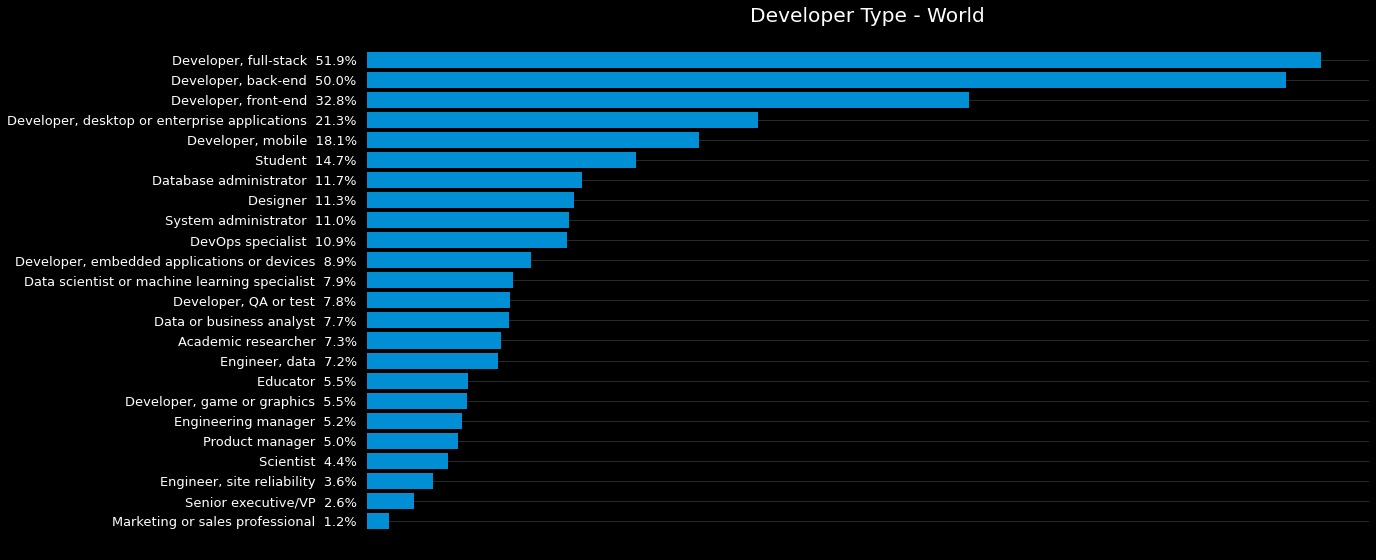

In [120]:
DevType = data["DevType"]    # We called necessary data
 
DevType.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

DevType = DevType.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(DevType , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, DevType ,"fivethirtyeight", False , (16,9), "Developer Type - World") # Building a schedule

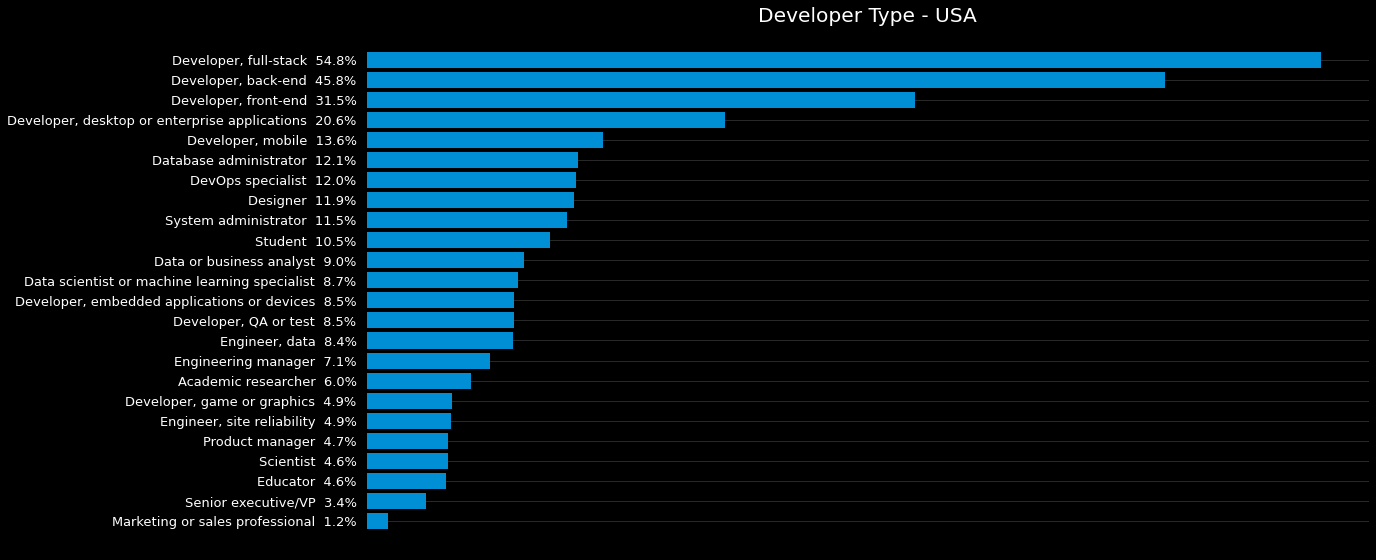

In [121]:
DevType_Filtered = data["DevType"]    # We called necessary data
 
DevType_Filtered.dropna( inplace=True)  # We filter the data from NaN and empty spaces 


DevType =data[(DevType_Filtered != "NaN") & (data["Country"] == "United States")]  # Data by specific country  (USA)



New_DevType = DevType["DevType"]  # Save our new data into new variable

New_DevType = New_DevType.str.split(';')  # We are splitting variables    "split variable when program sees (;) "



Double_list_sort_count(New_DevType , False)   # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_DevType ,"fivethirtyeight", False , (16,9), "Developer Type - USA") # Building a schedule

<h5 style="text-align:center; " > <b>Contributing to Open Source

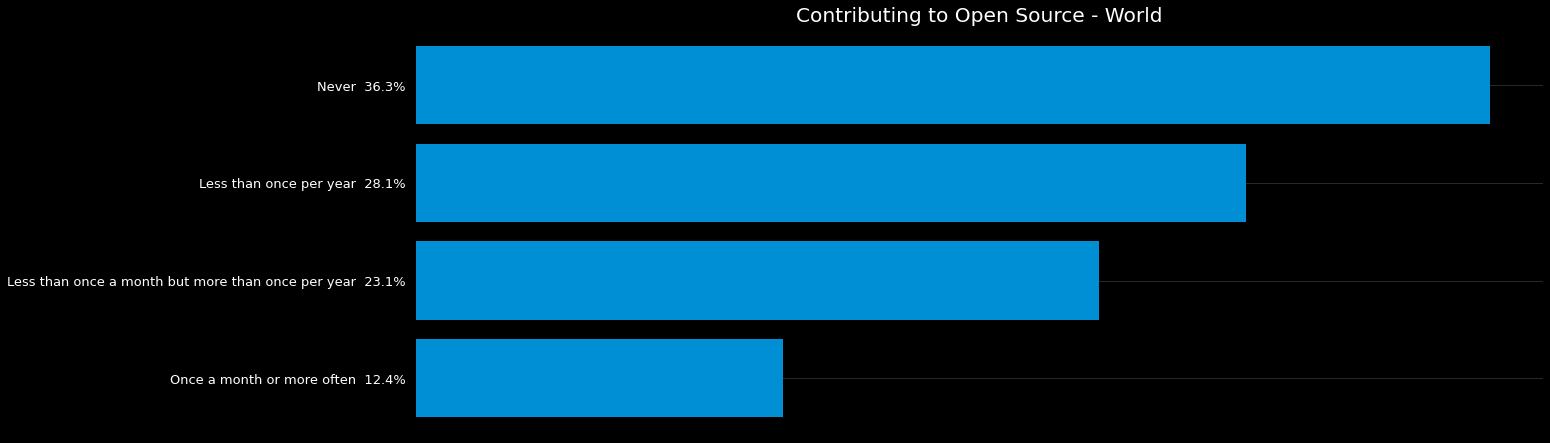

In [122]:
OpenSourcer = data["OpenSourcer"]   # We called necessary data

OpenSourcer.dropna( inplace=True)   # We filter the data from NaN and empty spaces 



Dictionary_Distributor(OpenSourcer , False)     # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, OpenSourcer ,"fivethirtyeight", False , (18,7), "Contributing to Open Source - World")   # Building a schedule

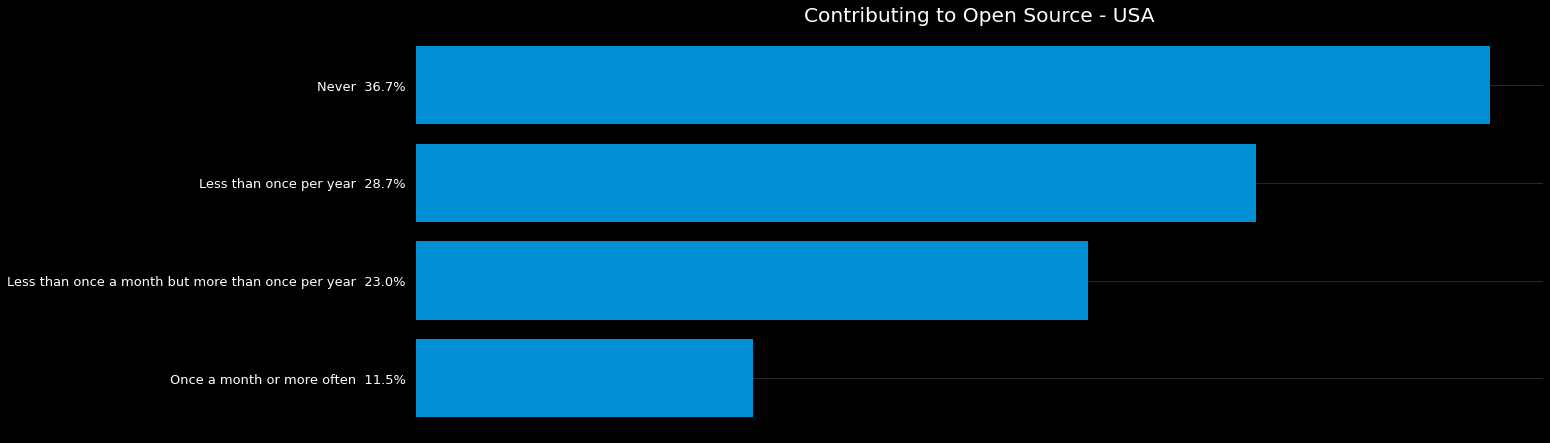

In [123]:
OpenSourcer = data["OpenSourcer"]    # We called necessary data
 
OpenSourcer.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

OpenSourcer =data[(OpenSourcer != "NaN") & (data["Country"] == "United States")]  # Data by specific country  (USA)

New_OpenSourcer = OpenSourcer["OpenSourcer"]  # Save our new data into new variable



Dictionary_Distributor(New_OpenSourcer , False)     # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_OpenSourcer ,"fivethirtyeight", False , (18,7), "Contributing to Open Source - USA")  # Building a schedule


<h5 style="text-align:center; " > <b>Coding as a Hobby

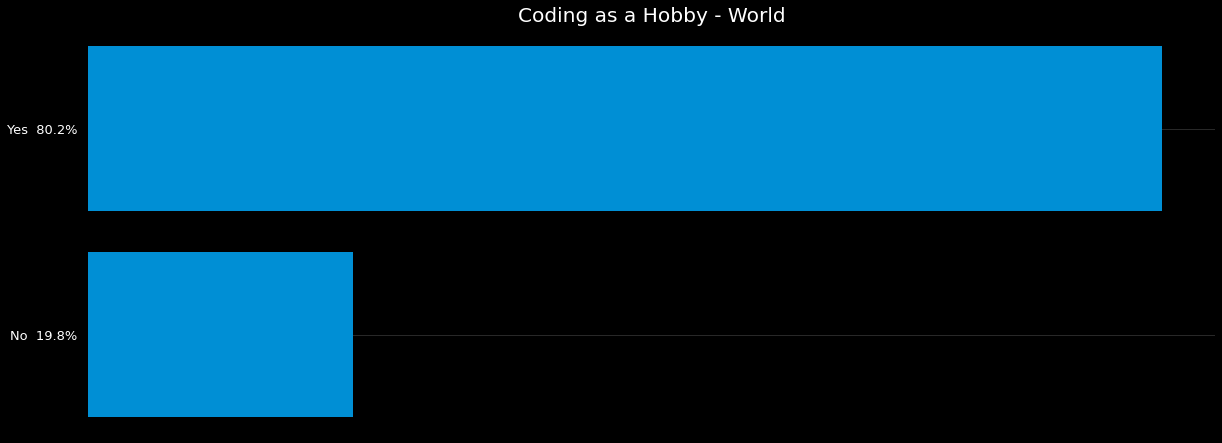

In [124]:
Hobbyist = data["Hobbyist"]    # We called necessary data
 
Hobbyist.dropna( inplace=True)   # We filter the data from NaN and empty spaces 



Dictionary_Distributor(Hobbyist , False)     # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Hobbyist ,"fivethirtyeight", False , (18,7), "Coding as a Hobby - World")   # Building a schedule

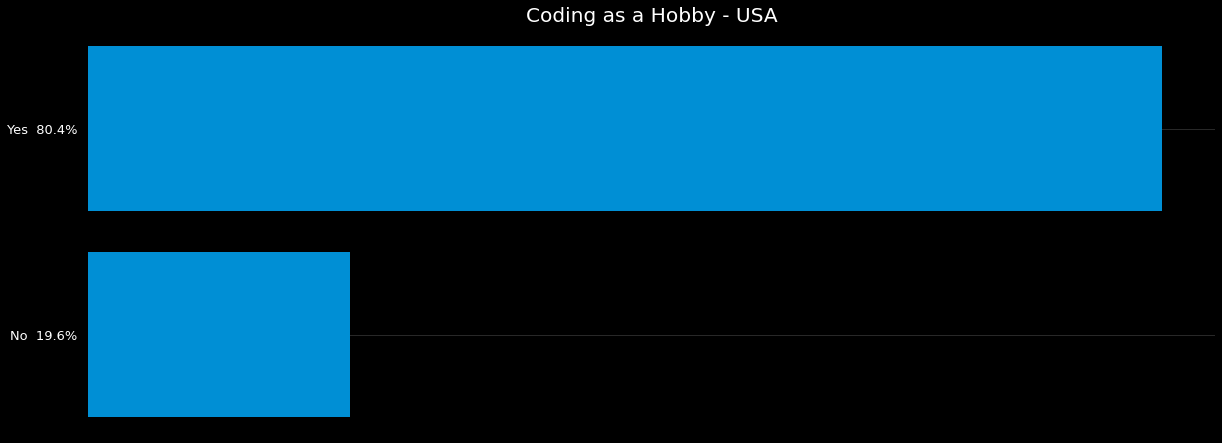

In [125]:
Hobbyist = data["Hobbyist"]         # We called necessary data
 
Hobbyist.dropna( inplace=True)      # We filter the data from NaN and empty spaces 

Hobbyist =data[(Hobbyist != "NaN") & (data["Country"] == "United States")]  # Data by specific country  (USA)

New_Hobbyist = Hobbyist["Hobbyist"]     # Save our new data into new variable



Dictionary_Distributor(New_Hobbyist , False)     # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_Hobbyist ,"fivethirtyeight", False , (18,7), "Coding as a Hobby - USA")   # Building a schedule

#### Experience

<h5 style="text-align:center; " > <b>Years Since Learning to Code

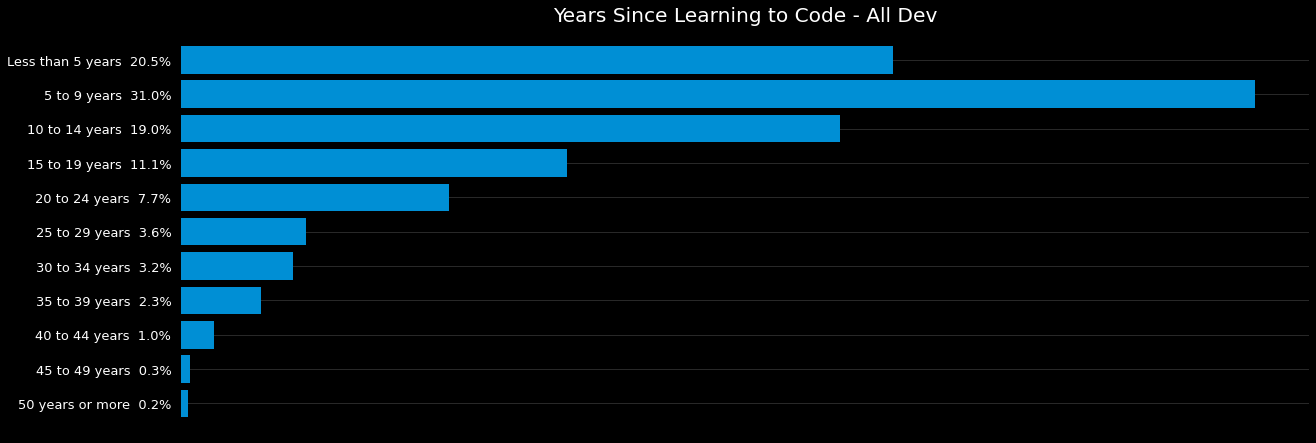

In [126]:
YearsCode = data["YearsCode"]       # We called necessary data
YearsCode=YearsCode.dropna()        # We filter the data from NaN and empty spaces 

Stacking_Less_than_5(YearsCode)     # Auto sort and count Stacking_Less_than_5 function


after_stacking(full_info)



Build_Barh_sizes( key_Phrases , Quantity, YearsCode ,"fivethirtyeight", False , (18,7), "Years Since Learning to Code - All Dev")  # Building a schedule

<h5 style="text-align:center; " > <b>Years Coding Professionally

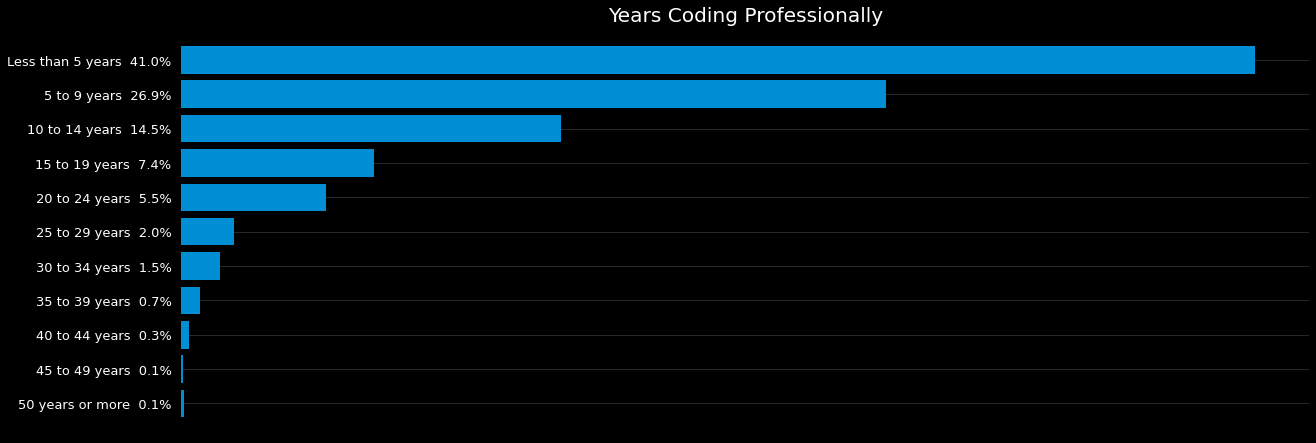

In [127]:
YearsCodePro = data["YearsCodePro"]       # We called necessary data
YearsCodePro=YearsCodePro.dropna()        # We filter the data from NaN and empty spaces 

Stacking_Less_than_5(YearsCodePro)     # Auto sort and count Stacking_Less_than_5 function


after_stacking(full_info)



Build_Barh_sizes( key_Phrases , Quantity, YearsCodePro ,"fivethirtyeight", False , (18,7), "Years Coding Professionally")  # Building a schedule

<h5 style="text-align:center; " > <b>Writing That First Line of Code

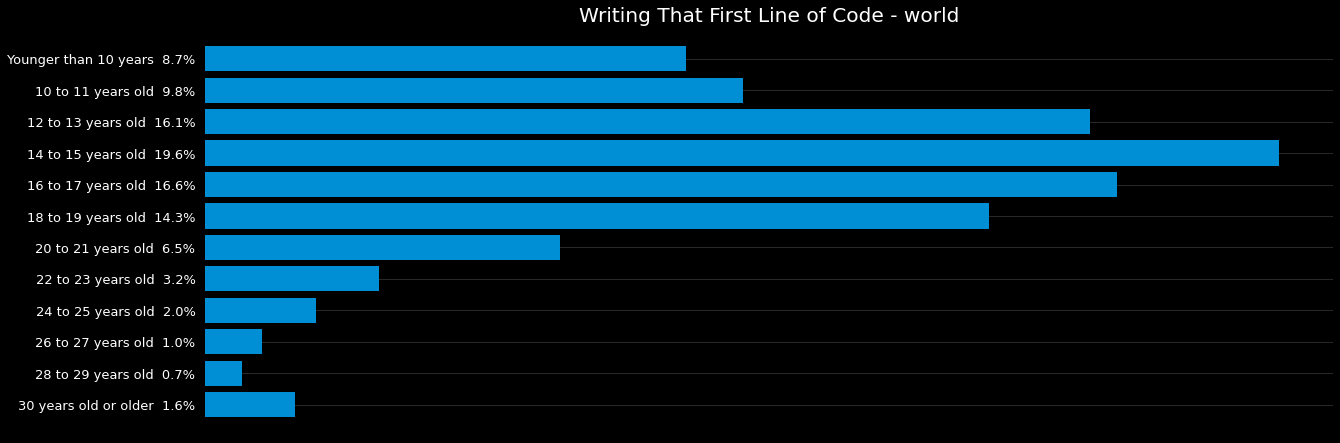

In [128]:
Age1stCode = data["Age1stCode"]       # We called necessary data
Age1stCode=Age1stCode.dropna()        # We filter the data from NaN and empty spaces 

Stacking_Less_than_10(Age1stCode)     # Auto sort and count Stacking_Less_than_5 function


after_stacking(full_info)


Build_Barh_sizes( key_Phrases , Quantity, Age1stCode ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code - world")  # Building a schedule

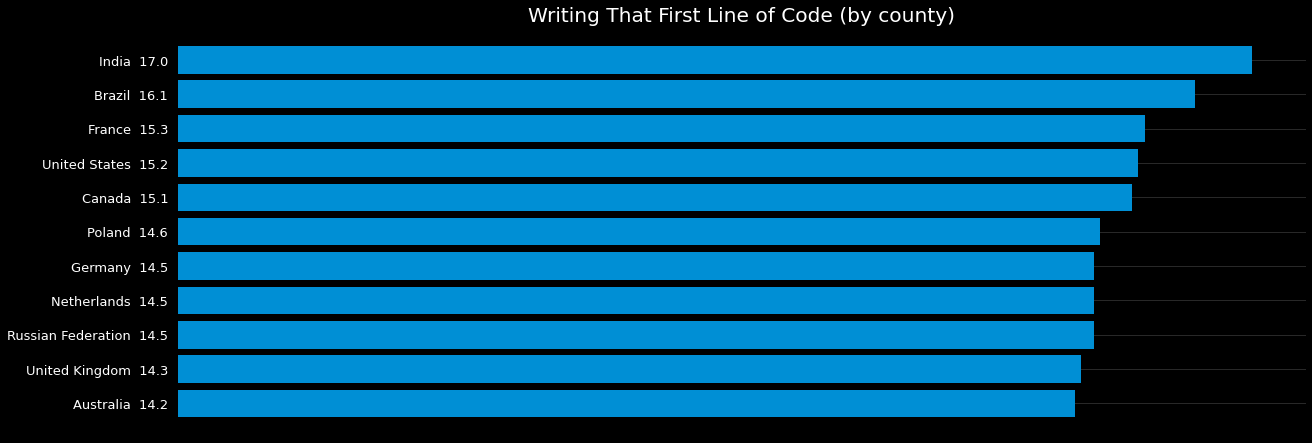

In [129]:
Age1stCode = data["Age1stCode"]       # We called necessary data
Age1stCode=Age1stCode.dropna()        # We filter the data from NaN and empty spaces 

Countries = ["India"  , "Brazil" , "France" , "United States" , "Canada" , "Poland" , "Germany" , "Netherlands" , "Russian Federation" , "United Kingdom" , "Australia"]


key_Phrases=[]      # It contein Phrases 
Quantity=[]         # It contein Quantity of variable



for i in Countries:

    new_data =data[(Age1stCode != "NaN") & (data["Country"] == i)] # Data by specific country  (from list)


    new_list = np.array(new_data["Age1stCode"])    
    new_list = np.where(new_list == "Younger than 5 years", 5, new_list)  # replace "Younger than 5 years" with 5
    new_list = np.where(new_list == "Older than 85", 85, new_list)   # replace "Older than 85" with 85



    new_list = list(map(int, new_list))   # change variable from str to int


    length = len(new_list)  # Quantity of all respodent 
    counted  = sum(new_list)     # sum all ages


    avarage_age = round( counted / length  , 1)   # Calculate avarage age


    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(avarage_age)    # Add Quantity into Quantity' list

    

key_Phrases.reverse()   # reverse key_Phrases
Quantity.reverse()      # reverse Quantity

Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code (by county)")  # Building a schedule

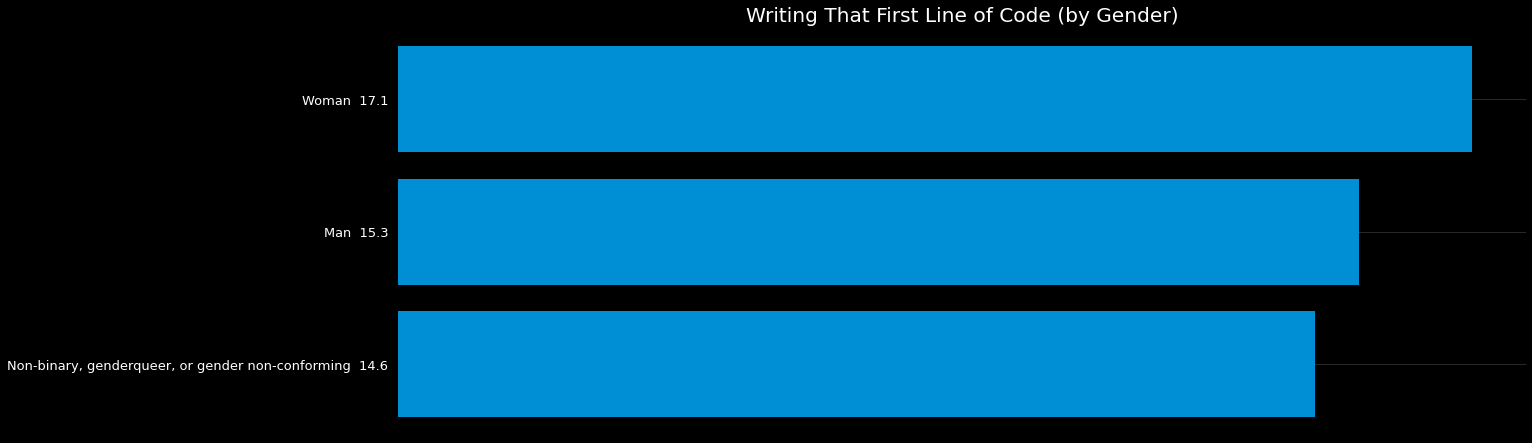

In [130]:
Age1stCode = data["Age1stCode"]       # We called necessary data
Age1stCode=Age1stCode.dropna()        # We filter the data from NaN and empty spaces 

Gender =  ["Woman" , "Man" , "Non-binary, genderqueer, or gender non-conforming"]


key_Phrases=[]      # It contein Phrases 
Quantity=[]         # It contein Quantity of variable



for i in Gender:

    new_data =data[(Age1stCode != "NaN") & (data["Gender"] == i)] # Data by specific Gender  (from list)


    new_list = np.array(new_data["Age1stCode"])    
    new_list = np.where(new_list == "Younger than 5 years", 5, new_list)  # replace "Younger than 5 years" with 5
    new_list = np.where(new_list == "Older than 85", 85, new_list)   # replace "Older than 85" with 85



    new_list = list(map(int, new_list))   # change variable from str to int


    length = len(new_list)  # Quantity of all respodent 
    counted  = sum(new_list)     # sum all ages


    avarage_age = round( counted / length  , 1)   # Calculate avarage age


    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(avarage_age)    # Add Quantity into Quantity' list

    

key_Phrases.reverse()   # reverse key_Phrases
Quantity.reverse()      # reverse Quantity

Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code (by Gender)")  # Building a schedule

####  Education

<h5 style="text-align:center; " > <b>How Many Developers are Students?

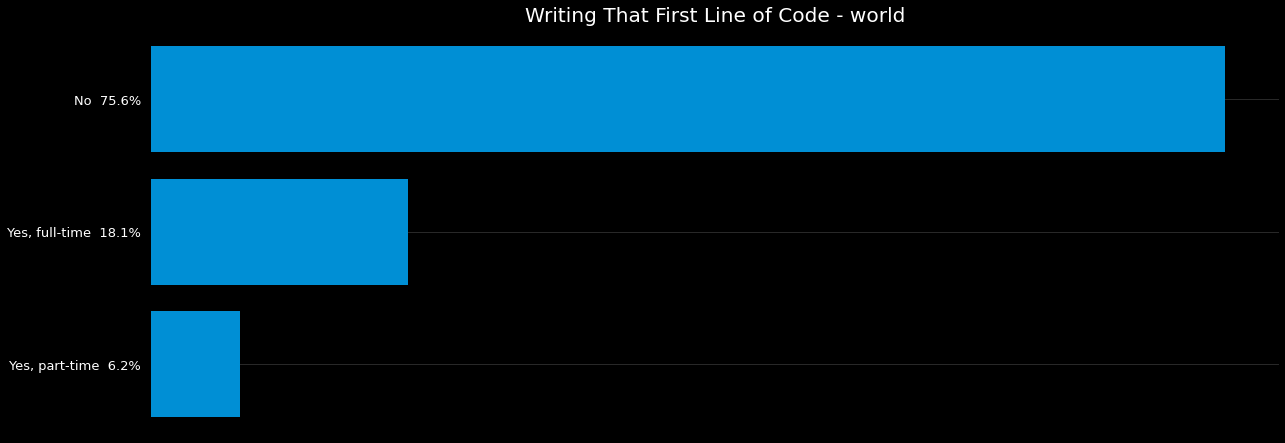

In [131]:
Student = data["Student"]       # We called necessary data
Student=Student.dropna(inplace=False)        # We filter the data from NaN and empty spaces 



Dictionary_Distributor(Student , False)     # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Student ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code - world")  # Building a schedule


<h5 style="text-align:center; " > <b>Educational Attainment

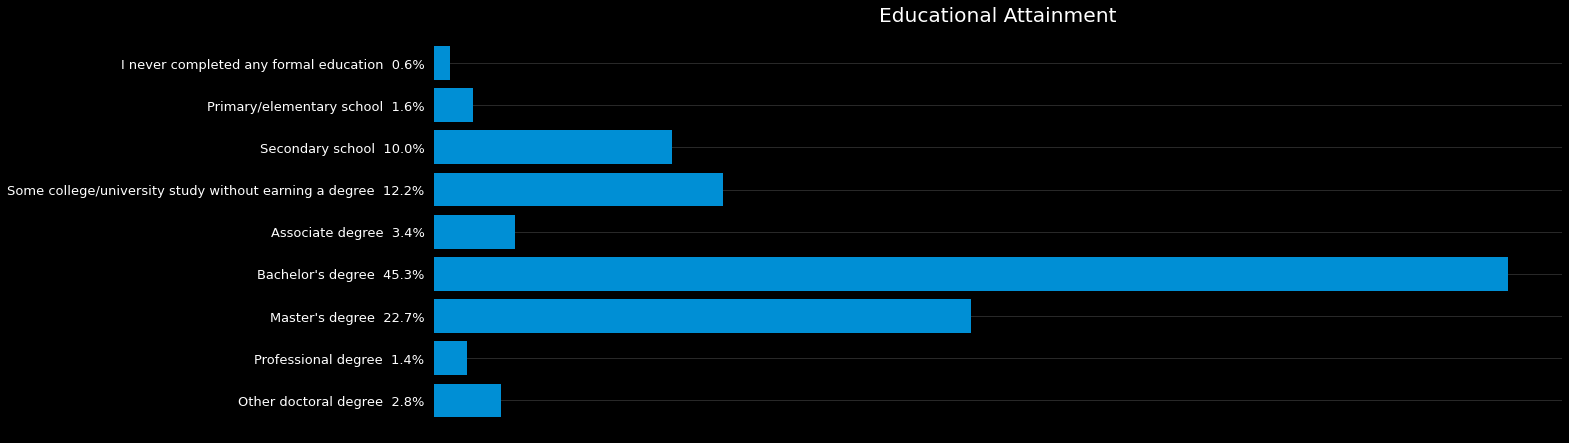

In [132]:
EdLevel = data["EdLevel"]     # We called necessary data

EdLevel = EdLevel.dropna(inplace=False)   # We filter the data from NaN and empty spaces 



EdLevel = np.where(EdLevel == "Professional degree (JD, MD, etc.)",    "Professional degree", EdLevel)  # replace
EdLevel = np.where(EdLevel == "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",   "Secondary school", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Bachelor’s degree (BA, BS, B.Eng., etc.)",     "Bachelor's degree", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Master’s degree (MA, MS, M.Eng., MBA, etc.)",     "Master's degree", EdLevel)  # replace 
EdLevel = np.where(EdLevel == "Other doctoral degree (Ph.D, Ed.D., etc.)",     "Other doctoral degree", EdLevel)  # replace 


Counted_EdLevel = Counter(EdLevel)  # Count information into EdLevel (where variable are replaced)

lCE = list(Counted_EdLevel.items())    # take items from dictinary

new_sorted_list = []    # new list were will be sorted answers


new_sorted_list.append(lCE[5])      # We sort the set
new_sorted_list.append(lCE[-2])     # We sort the set
new_sorted_list.append(lCE[4])      # We sort the set
new_sorted_list.append(lCE[2])      # We sort the set
new_sorted_list.append(lCE[-3])     # We sort the set
new_sorted_list.append(lCE[3])      # We sort the set
new_sorted_list.append(lCE[1])      # We sort the set
new_sorted_list.append(lCE[0])      # We sort the set
new_sorted_list.append(lCE[-1])     # We sort the set

new_sorted_list = dict(new_sorted_list)    # From list to Dictinary




key_Phrases = []    # It contein Phrases 
Quantity = []       # It contein Quantity of variable

for i in new_sorted_list:
    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(new_sorted_list[i])      # Add Quantity into Quantity' list


Build_Barh_sizes( key_Phrases , Quantity, EdLevel ,"fivethirtyeight", False , (18,7), "Educational Attainment")  # Building a schedule


<h5 style="text-align:center; " > <b>Undergraduate Major

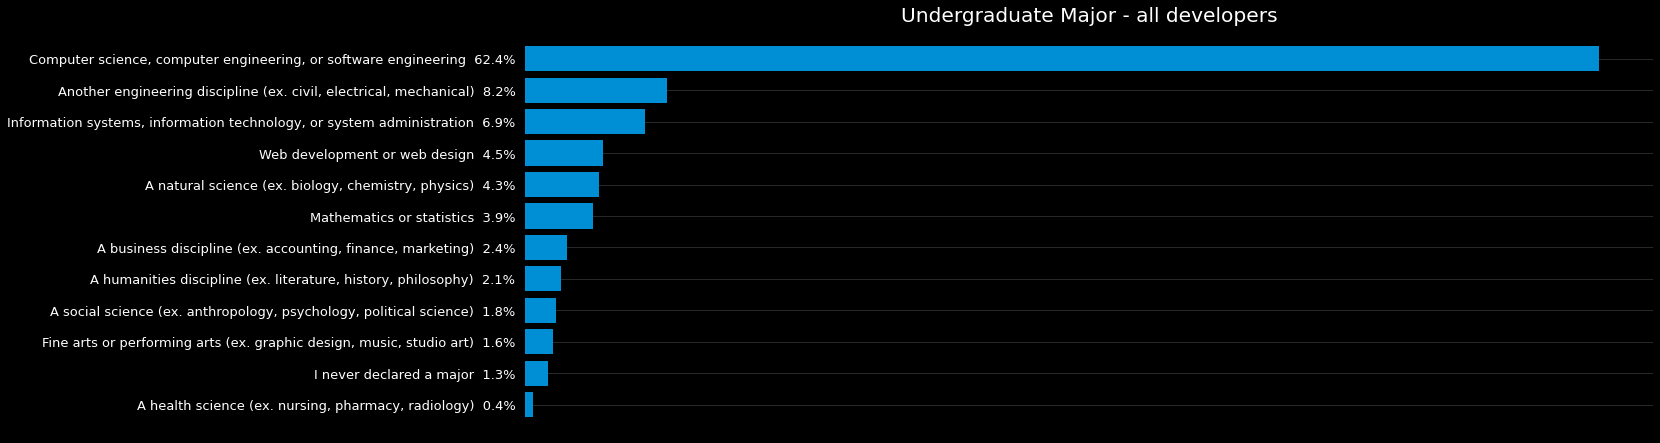

In [133]:
UndergradMajor = data["UndergradMajor"]     # We called necessary data

UndergradMajor = UndergradMajor.dropna(inplace=False)   # We filter the data from NaN and empty spaces 



Dictionary_Distributor(UndergradMajor , False)          # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, UndergradMajor ,"fivethirtyeight", False , (18,7), "Undergraduate Major - all developers")  # Building a schedule


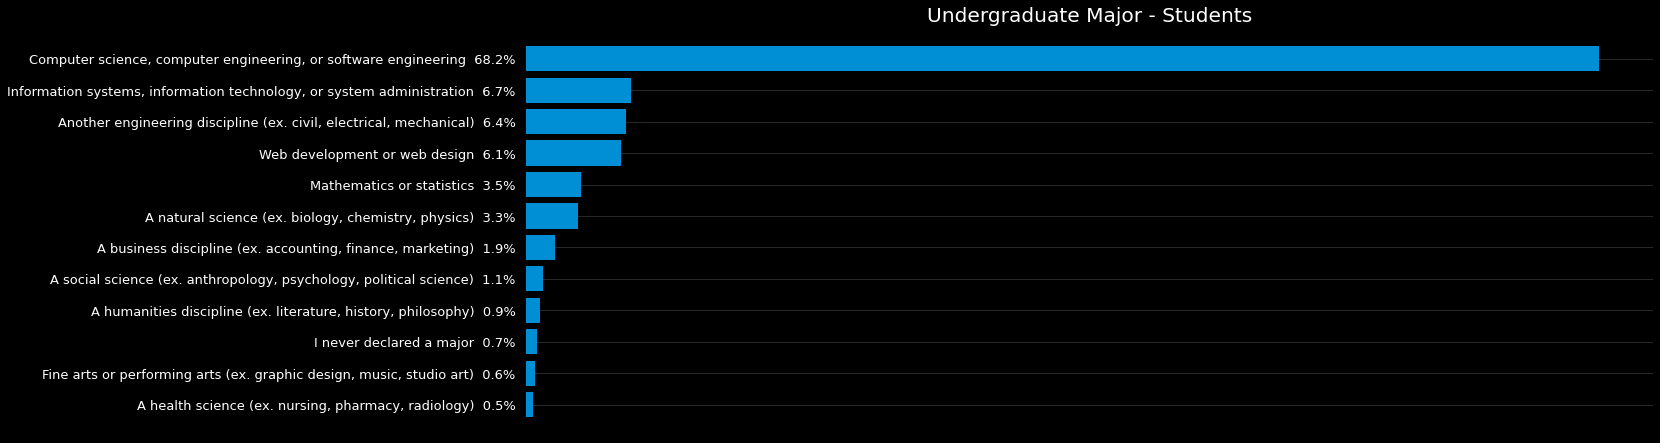

In [134]:
UndergradMajor = data["UndergradMajor"]     # We called necessary data

UndergradMajor = UndergradMajor.dropna(inplace=False)   # We filter the data from NaN and empty spaces 


New_UndergradMajor = data[(UndergradMajor != "NA5N") &  ((data["Student"] == "Yes, part-time") | (data["Student"] == "Yes, full-time"))]  # Data by Student


UndergradMajor = New_UndergradMajor["UndergradMajor"]  # save new filtred data inro new variable




Dictionary_Distributor(UndergradMajor , False)      # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_UndergradMajor ,"fivethirtyeight", False , (18,7), "Undergraduate Major - Students")  # Building a schedule


<h5 style="text-align:center; " > <b>Other Types of Education

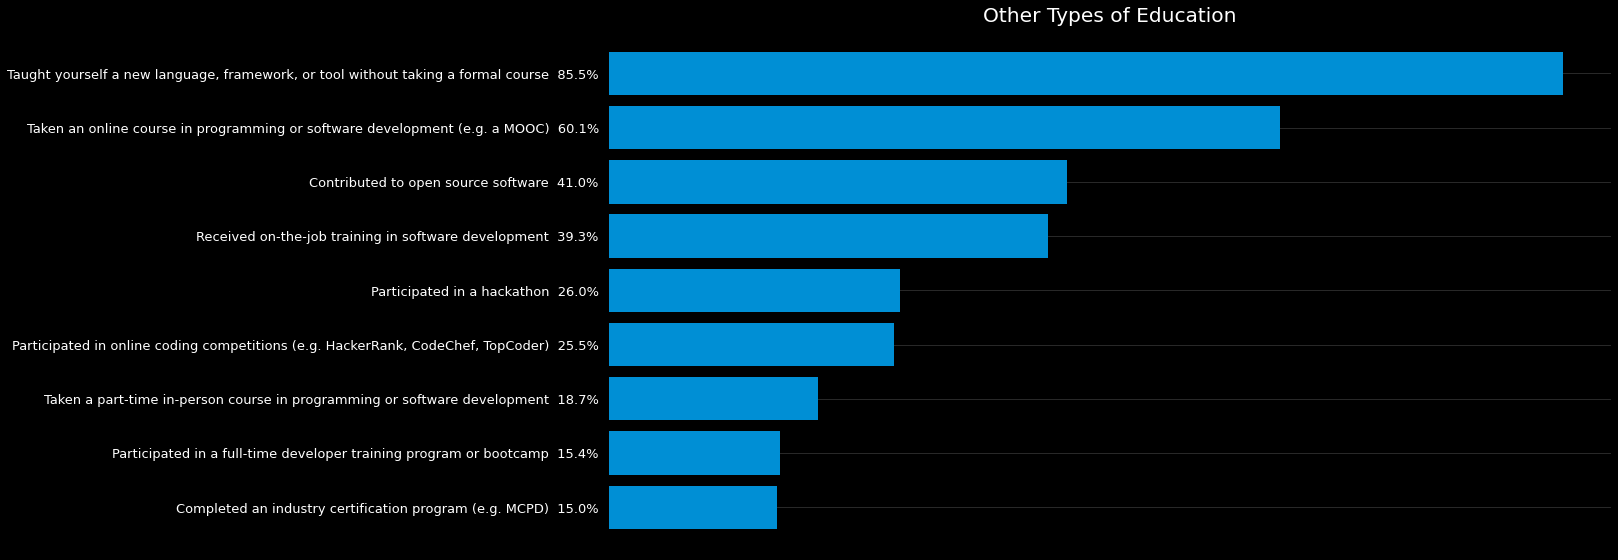

In [135]:
EduOther = data["EduOther"]    # We called necessary data
 
EduOther.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

EduOther = EduOther.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(EduOther , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, EduOther ,"fivethirtyeight", False , (16,9), "Other Types of Education") # Building a schedule

####  Demographics

<h5 style="text-align:center; " > <b>Race and Ethnicity

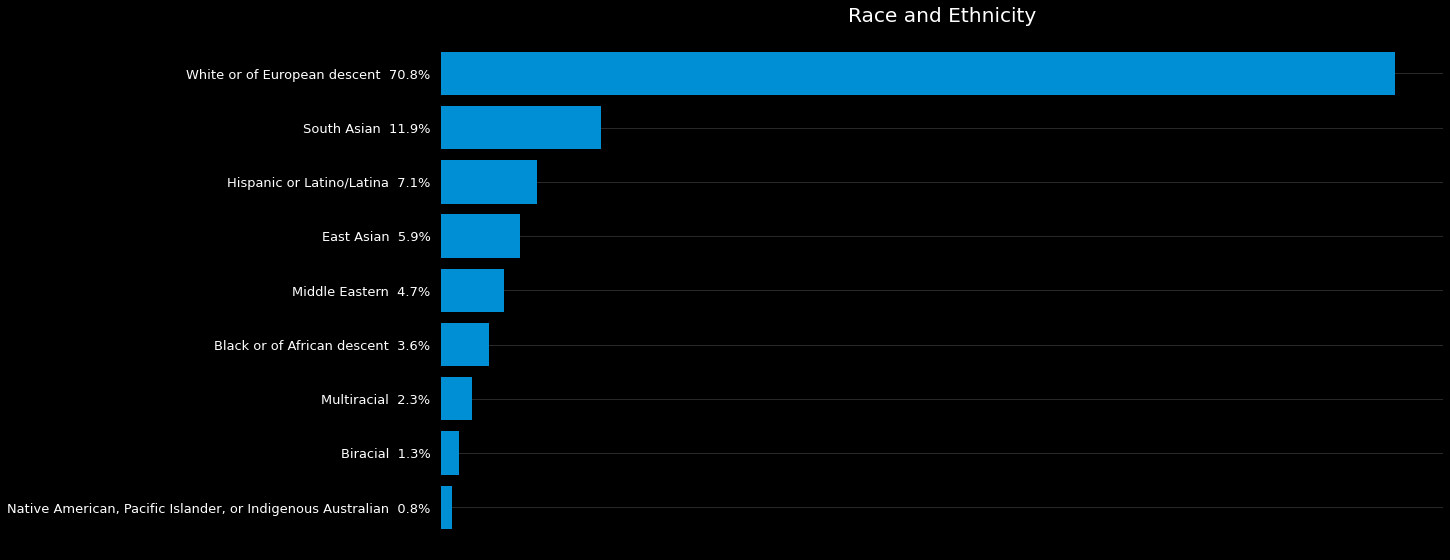

In [136]:
Ethnicity = data["Ethnicity"]    # We called necessary data
 
Ethnicity.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

Ethnicity = Ethnicity.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(Ethnicity , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Ethnicity ,"fivethirtyeight", False , (16,9), "Race and Ethnicity") # Building a schedule

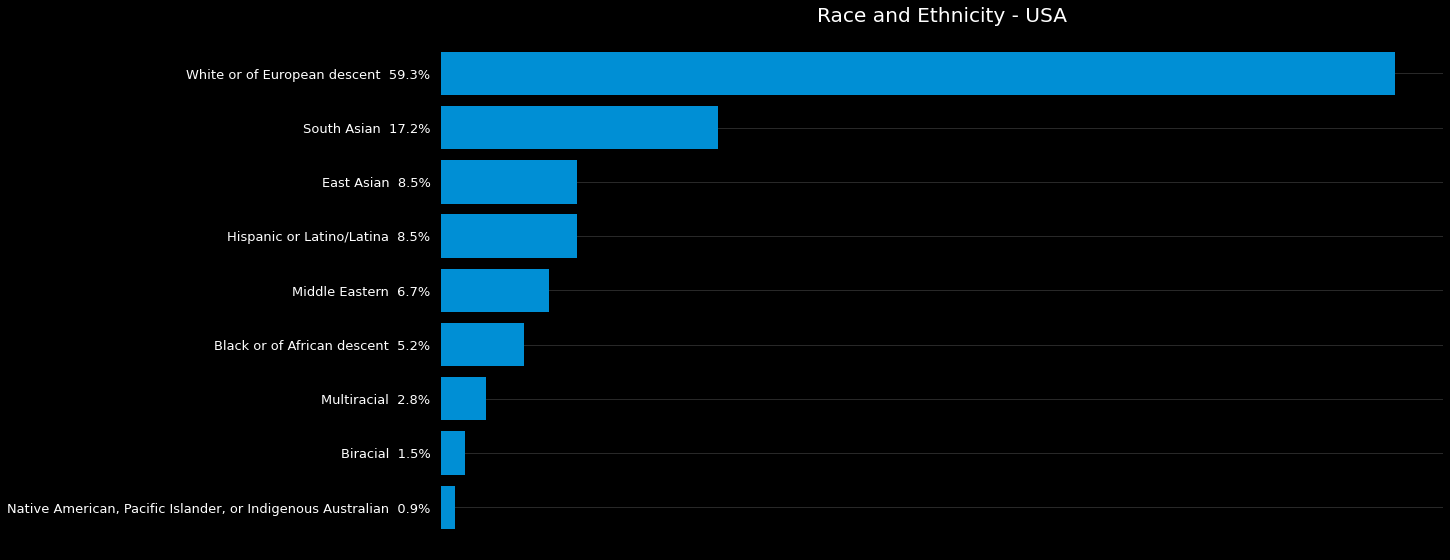

In [137]:
Ethnicity = data["Ethnicity"]    # We called necessary data
 
Ethnicity.dropna( inplace=True)  # We filter the data from NaN and empty spaces 


Ethnicity =data[(Ethnicity != "NAN") &  ((data["Student"] == "Yes, part-time") | (data["Student"] == "Yes, full-time"))] # Data by Student


New_Ethnicity = Ethnicity["Ethnicity"].str.split(';')  # We are splitting variables    "split variable when program sees (;) "



Double_list_sort_count(New_Ethnicity , False)   # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_Ethnicity ,"fivethirtyeight", False , (16,9), "Race and Ethnicity - USA") # Building a schedule

<h5 style="text-align:center; " > <b>Gender

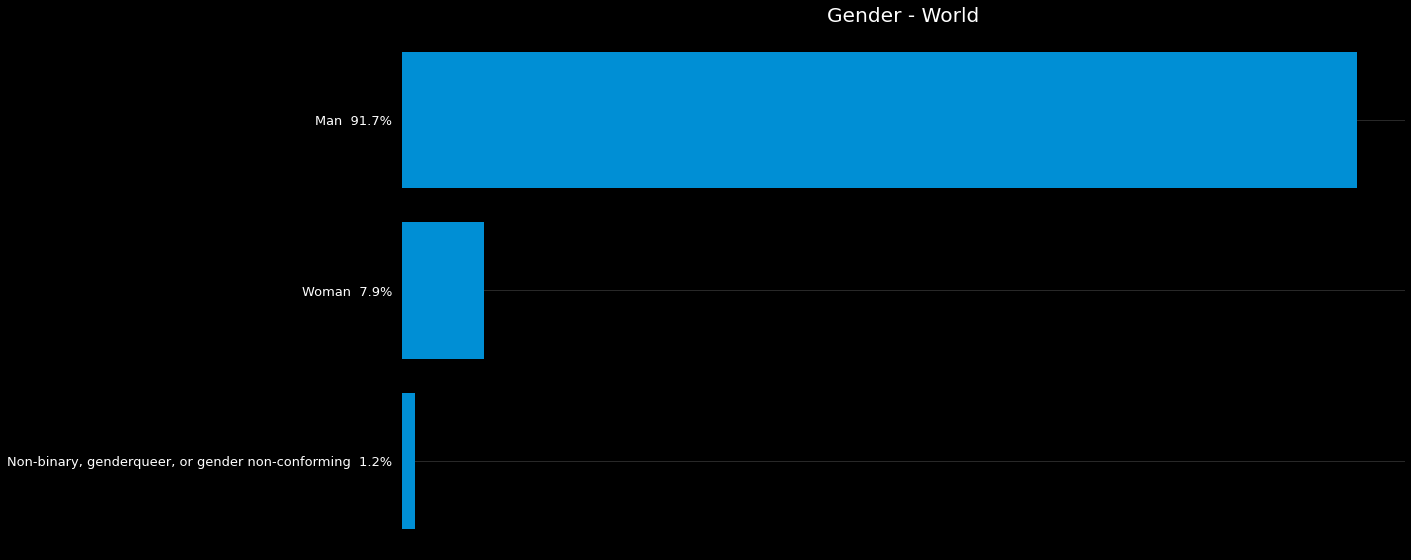

In [138]:
Gender = data["Gender"]    # We called necessary data
 
Gender.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

Gender = Gender.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(Gender , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Gender ,"fivethirtyeight", False , (16,9), "Gender - World") # Building a schedule

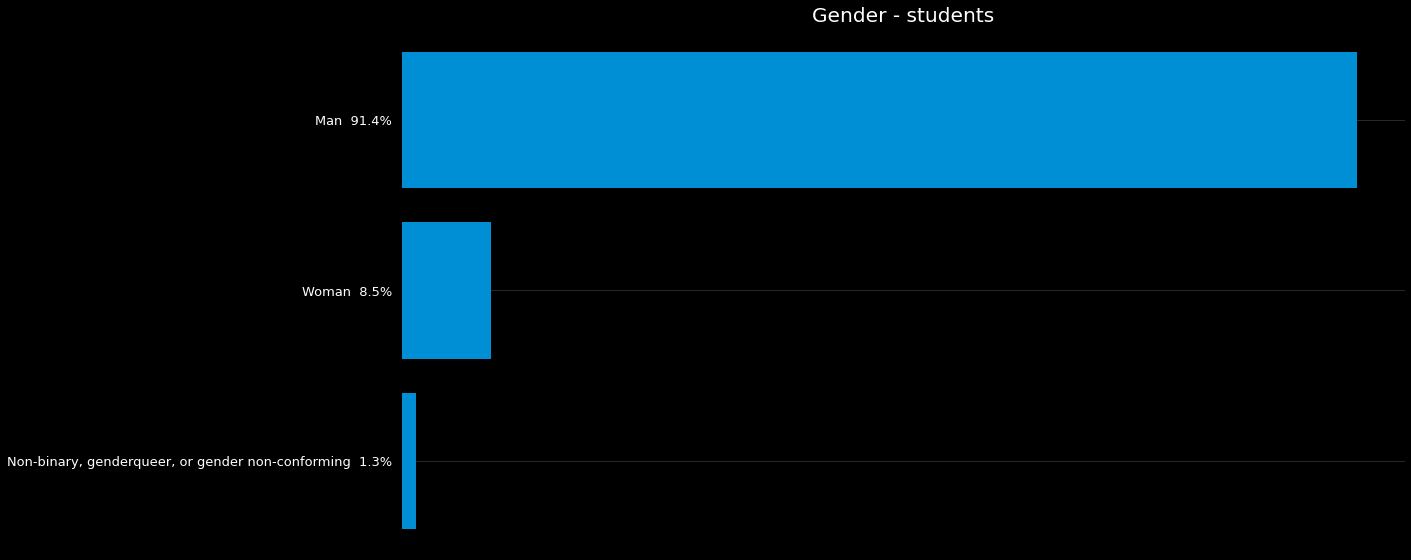

In [139]:
Gender = data["Gender"]    # We called necessary data
 
Gender.dropna( inplace=True)  # We filter the data from NaN and empty spaces 


Gender =data[(Gender != "NAN") &  ((data["Student"] == "Yes, part-time") | (data["Student"] == "Yes, full-time"))] # Data by Student


New_Gender = Gender["Gender"].str.split(';')  # We are splitting variables    "split variable when program sees (;) "



Double_list_sort_count(New_Gender , False)   # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_Gender ,"fivethirtyeight", False , (16,9), "Gender - students") # Building a schedule

<h5 style="text-align:center; " > <b>Experience and Gender

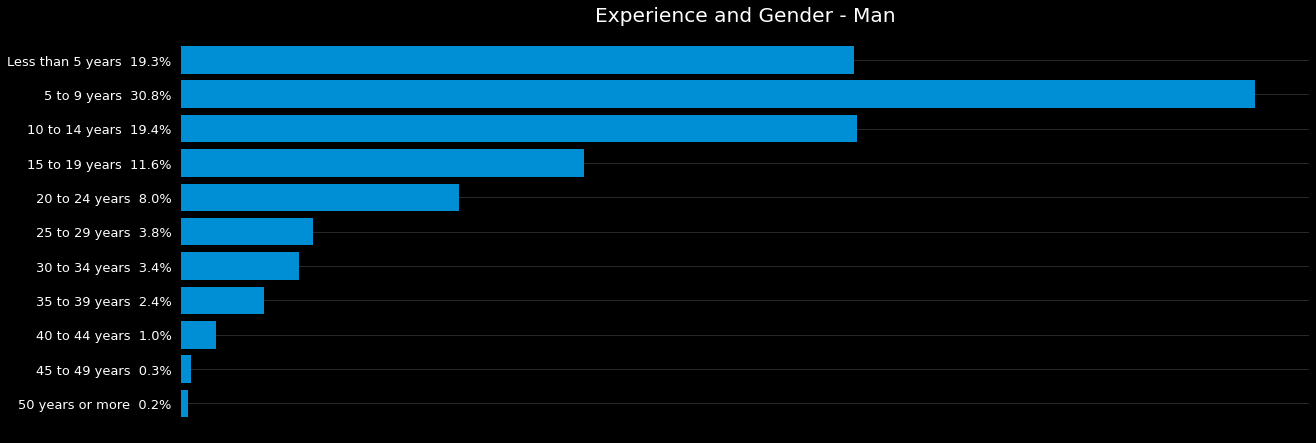

In [140]:
YearsCode = data["YearsCode"]   # We called necessary data
YearsCode=YearsCode.dropna()  # We filter the data from NaN and empty spaces 


New_list  = data[ (YearsCode != "nan") & ((data["Gender"] == "Man") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming"))] # Data by gender

New_list = New_list["YearsCode"]

Stacking_Less_than_5(New_list)     # Auto sort and count Stacking_Less_than_5 function


after_stacking(full_info)



Build_Barh_sizes( key_Phrases , Quantity, New_list ,"fivethirtyeight", False , (18,7), "Experience and Gender - Man")  # Building a schedule


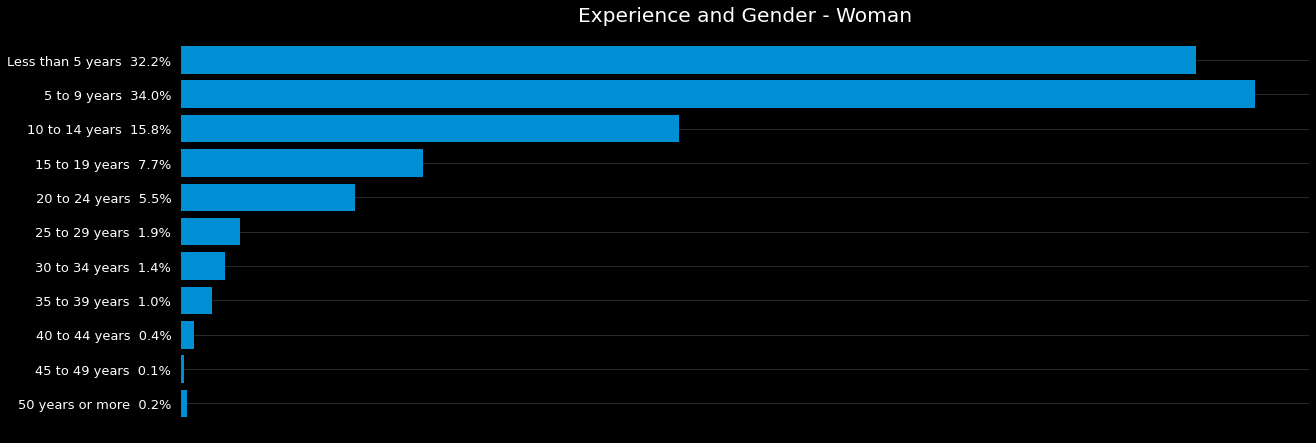

In [141]:
YearsCode = data["YearsCode"]   # We called necessary data
YearsCode=YearsCode.dropna()  # We filter the data from NaN and empty spaces 


New_list  = data[ (YearsCode != "nan")  & ((data["Gender"] == "Woman") | (data["Gender"] == "Woman;Man")  | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming"))]  # Data by gender

New_list = New_list["YearsCode"]

Stacking_Less_than_5(New_list)     # Auto sort and count Stacking_Less_than_5 function


after_stacking(full_info)



Build_Barh_sizes( key_Phrases , Quantity, New_list ,"fivethirtyeight", False , (18,7), "Experience and Gender - Woman")  # Building a schedule


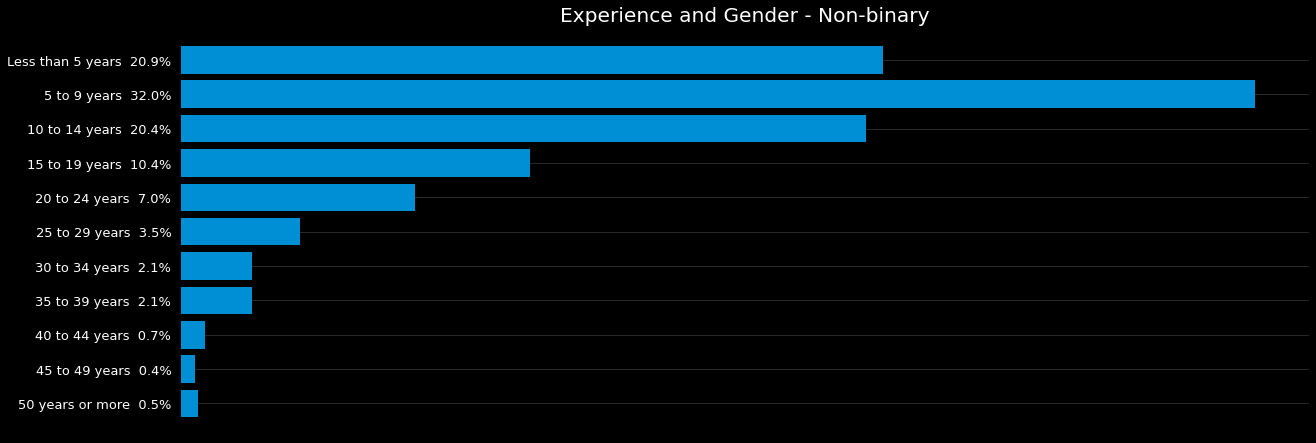

In [142]:
YearsCode = data["YearsCode"]   # We called necessary data
YearsCode=YearsCode.dropna()  # We filter the data from NaN and empty spaces 


New_list  = data[ (YearsCode != "nan")  & ((data["Gender"] == "Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Woman;Non-binary, genderqueer, or gender non-conforming") | (data["Gender"] == "Man;Non-binary, genderqueer, or gender non-conforming")   | (data["Gender"] == "Woman;Man;Non-binary, genderqueer, or gender non-conforming"))]   # Data by gender

New_list = New_list["YearsCode"]

Stacking_Less_than_5(New_list)     # Auto sort and count Stacking_Less_than_5 function

after_stacking(full_info)



Build_Barh_sizes( key_Phrases , Quantity, New_list ,"fivethirtyeight", False , (18,7), "Experience and Gender - Non-binary")  # Building a schedule


<h5 style="text-align:center; " > <b>Sexual Orientation

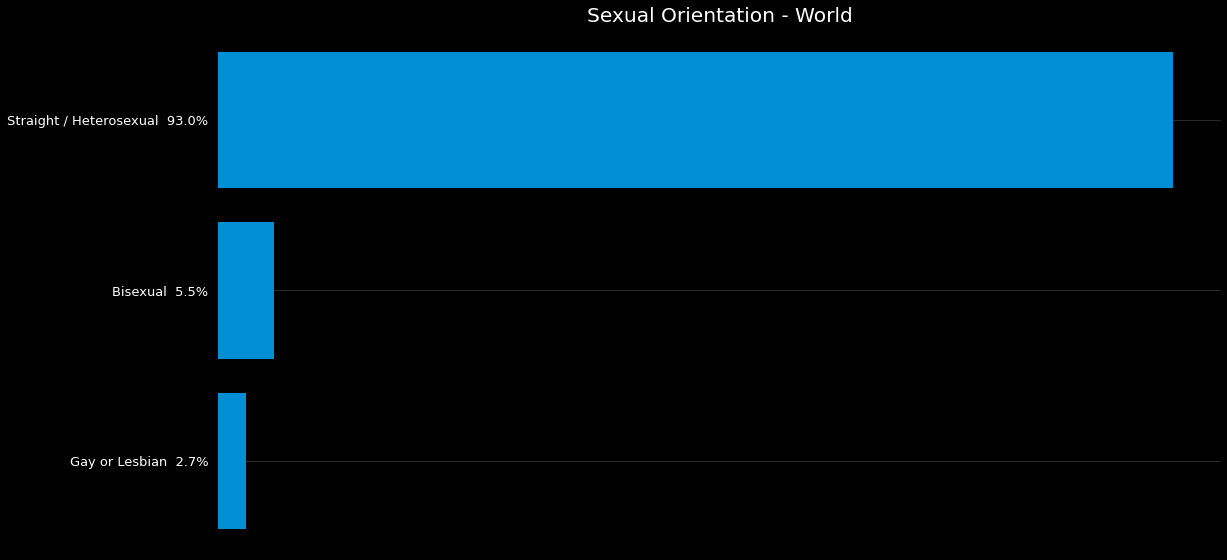

In [143]:
Sexuality = data["Sexuality"]    # We called necessary data
 
Sexuality.dropna( inplace=True)   # We filter the data from NaN and empty spaces 

Sexuality = Sexuality.str.split(';')  # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(Sexuality , False)  # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, Sexuality ,"fivethirtyeight", False , (16,9), "Sexual Orientation - World") # Building a schedule

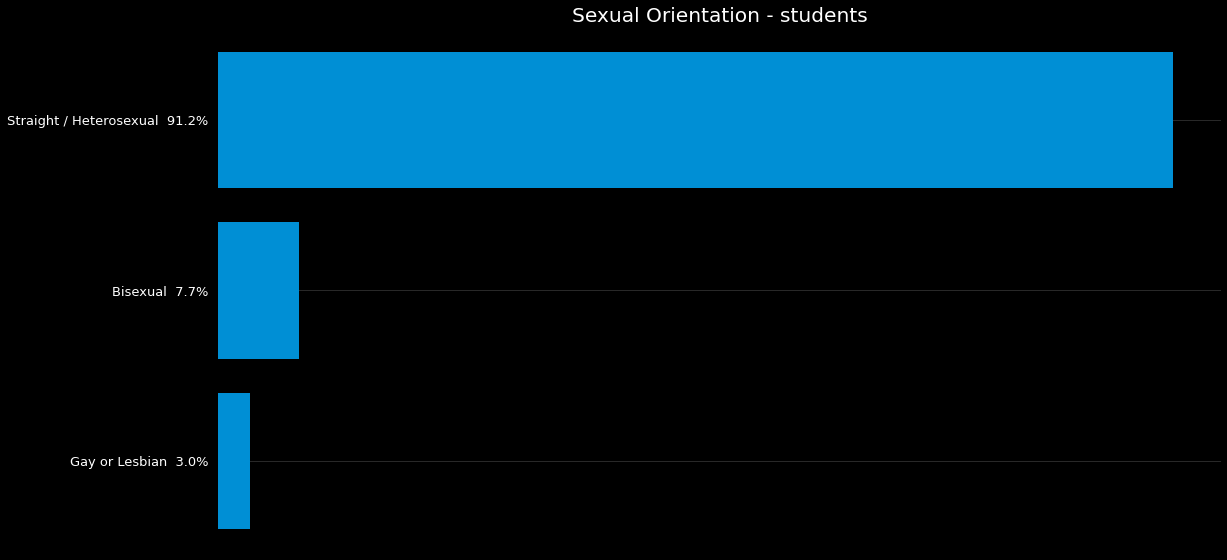

In [144]:
Sexuality = data["Sexuality"]    # We called necessary data
 
Sexuality.dropna( inplace=True)  # We filter the data from NaN and empty spaces 


Sexuality_students = data [ (Sexuality != "nan") & ((data["Student"] == "Yes, part-time") | (data["Student"] == "Yes, full-time"))]  # Data by Student


New_Sexuality = Sexuality_students["Sexuality"].str.split(';')  # We are splitting variables    "split variable when program sees (;) "



Double_list_sort_count(New_Sexuality , False)   # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_Sexuality ,"fivethirtyeight", False , (16,9), "Sexual Orientation - students") # Building a schedule

<h5 style="text-align:center; " > <b>Age

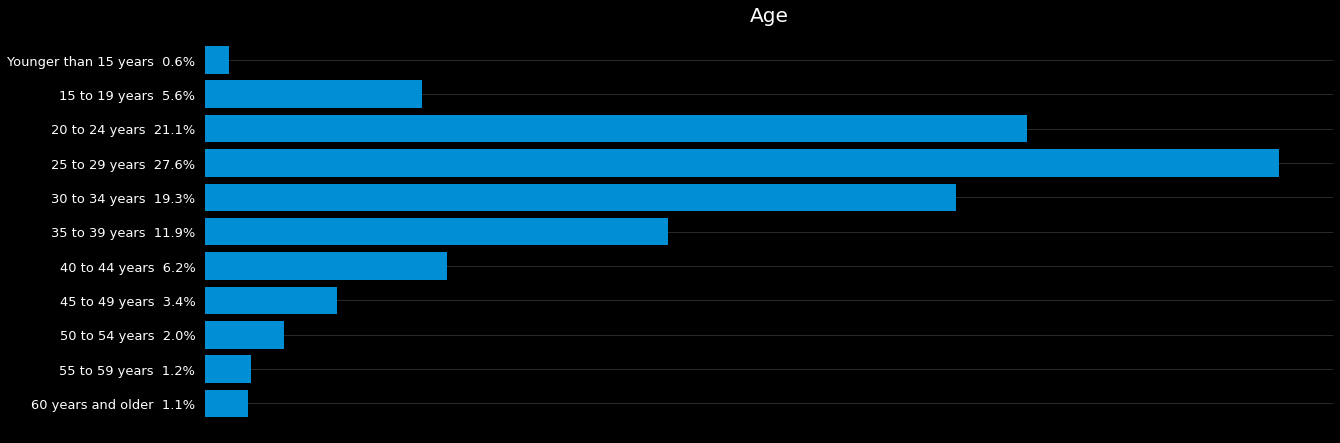

In [145]:
Age = data["Age"]   # We called necessary data
Age=Age.dropna()  # We filter the data from NaN and empty spaces 


Stacking_Less_than_15(Age)     # Auto sort and count Stacking_Less_than_5 function


after_stacking(full_info)


Build_Barh_sizes( key_Phrases , Quantity, Age ,"fivethirtyeight", False , (18,7), "Age")  # Building a schedule


<h5 style="text-align:center; " > <b>Age and Experience by Country

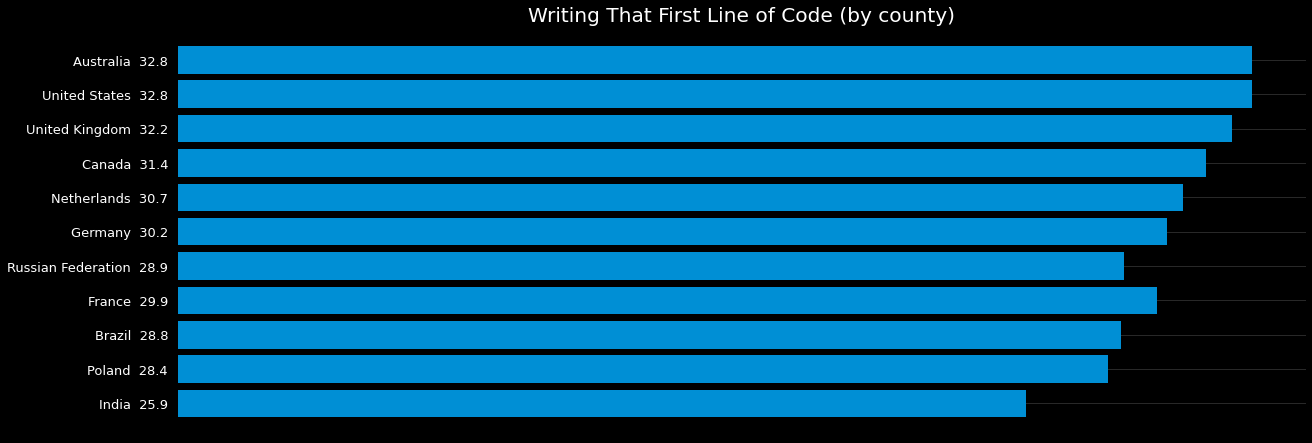

In [146]:
Age = data["Age"]       # We called necessary data
Age=Age.dropna()        # We filter the data from NaN and empty spaces 

Countries = ["India"  ,  "Poland"  , "Brazil" , "France",  "Russian Federation" , "Germany" , "Netherlands" , "Canada", "United Kingdom" , "United States" , "Australia"]


key_Phrases=[]      # It contein Phrases 
Quantity=[]         # It contein Quantity of variable



for i in Countries:

    new_data =data[(Age != "NaN") & (data["Country"] == i)] # Data by specific country  (from list)


    new_list = np.array(new_data["Age"])    

    new_list = list(map(int, new_list))   # change variable from str to int


    length = len(new_list)  # Quantity of all respodent 
    counted  = sum(new_list)     # sum all ages


    avarage_age = round( counted / length  , 1)   # Calculate avarage age


    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(avarage_age)    # Add Quantity into Quantity' list


Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Writing That First Line of Code (by county)")  # Building a schedule

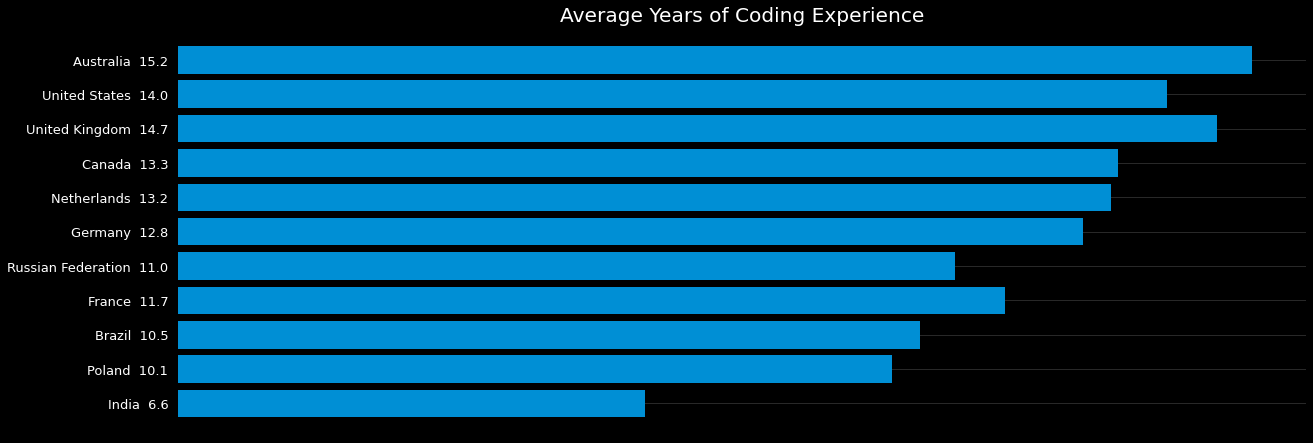

In [147]:
YearsCode = data["YearsCode"]       # We called necessary data
YearsCode=YearsCode.dropna()        # We filter the data from NaN and empty spaces 

Countries =  ["India"  ,  "Poland"  , "Brazil" , "France",  "Russian Federation" , "Germany" , "Netherlands" , "Canada", "United Kingdom" , "United States" , "Australia"]


key_Phrases=[]      # It contein Phrases 
Quantity=[]         # It contein Quantity of variable



for i in Countries:

    new_data =data[(YearsCode != "NaN") & (data["Country"] == i)] # Data by specific Gender  (from list)


    new_list = np.array(new_data["YearsCode"])    
    new_list = np.where(new_list == "Less than 1 year", 1, new_list)  # replace "Less than 1 year" with 1
    new_list = np.where(new_list == "More than 50 years", 50, new_list)   # replace "More than 50 years" with 50



    new_list = list(map(int, new_list))   # change variable from str to int


    length = len(new_list)  # Quantity of all respodent 
    counted  = sum(new_list)     # sum all ages


    avarage_age = round( counted / length  , 1)   # Calculate avarage age


    key_Phrases.append(i)           # Add Phrases into Phrases' list
    Quantity.append(avarage_age)    # Add Quantity into Quantity' list

    


Build_Barh_sizes_withot_percent( key_Phrases , Quantity ,"fivethirtyeight", False , (18,7), "Average Years of Coding Experience")  # Building a schedule

#### Evaluating Competence

<h5 style="text-align:center; " > <b>All of the Developers Are Above Average?

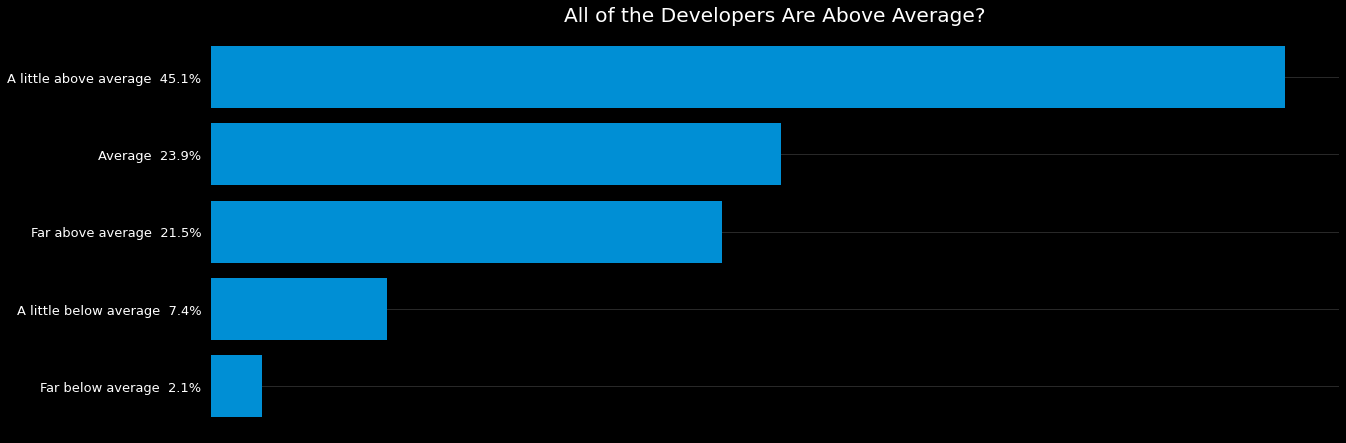

In [148]:
ImpSyn = data["ImpSyn"]                      # We called necessary data
ImpSyn=ImpSyn.dropna(inplace=False)          # We filter the data from NaN and empty spaces 

Dictionary_Distributor(ImpSyn , False)       # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, ImpSyn ,"fivethirtyeight", False , (18,7), "All of the Developers Are Above Average?")  # Building a schedule


<h5 style="text-align:center; " > <b>Feelings of Competence By Gender

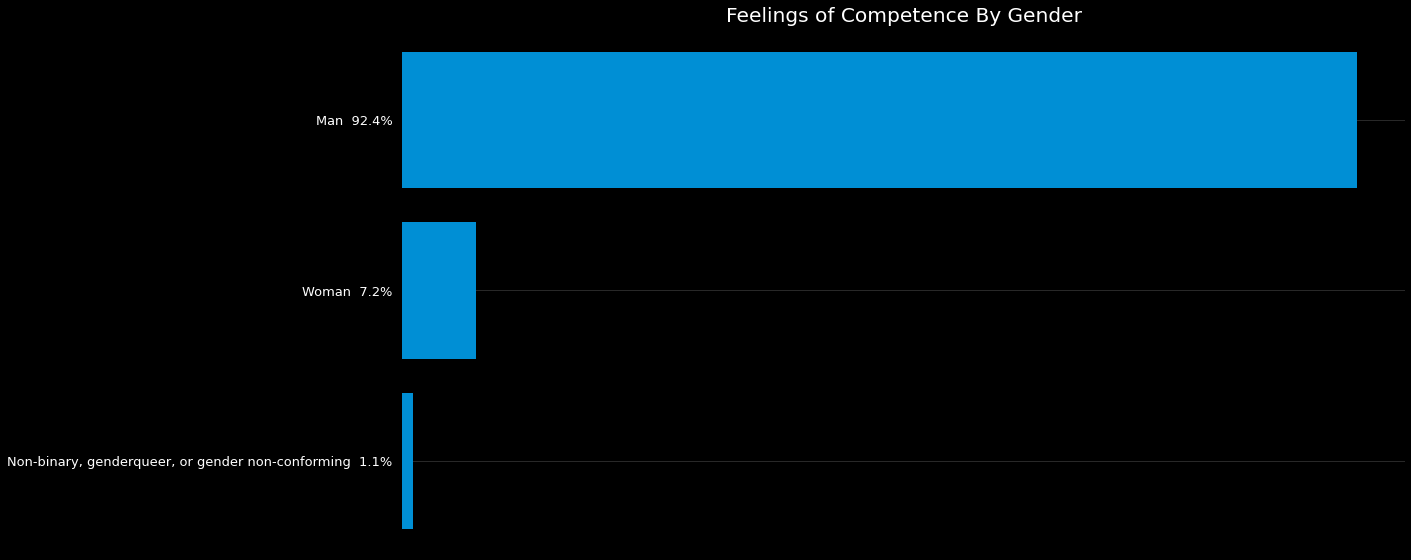

In [149]:
ImpSyn = data["ImpSyn"]    # We called necessary data
 
ImpSyn.dropna( inplace=True)  # We filter the data from NaN and empty spaces 


new_data = data[ ((ImpSyn == "Far above average") | (ImpSyn == "A little above average") | (ImpSyn == "Average")) & (data["Gender"] != "Women1")]  # Data by Student


New_Gender = new_data["Gender"].str.split(';')  # We are splitting variables    "split variable when program sees (;) "

New_Gender.dropna( inplace=True)    # We filter the data from NaN and empty spaces 



Double_list_sort_count(New_Gender , False)   # Auto sort and count

Build_Barh_sizes( key_Phrases , Quantity, New_Gender ,"fivethirtyeight", False , (16,9), "Feelings of Competence By Gender") # Building a schedule


####  Life Outside Work

<h5 style="text-align:center; " > <b>Children and Other Dependents

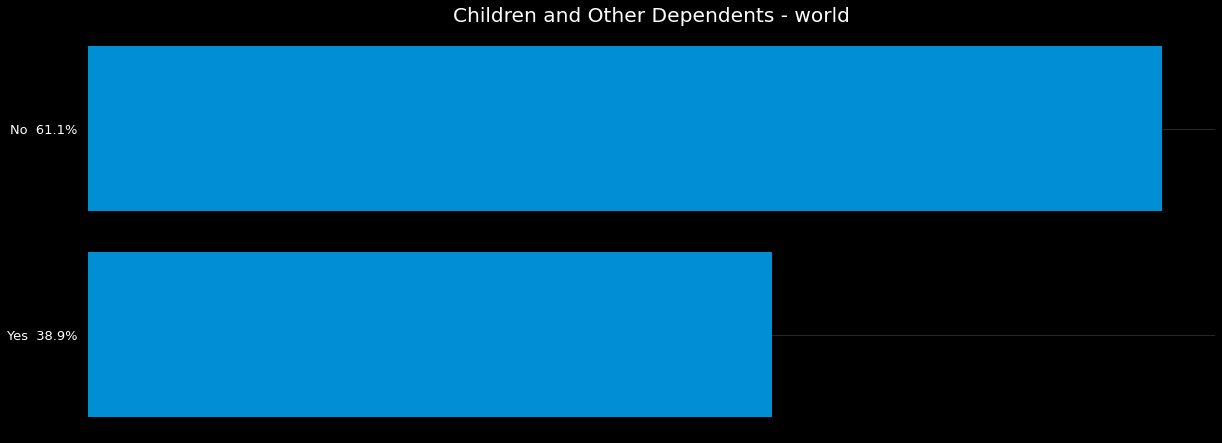

In [150]:
Dependents = data["Dependents"]                      # We called necessary data
Dependents=Dependents.dropna(inplace=False)          # We filter the data from NaN and empty spaces 

Dictionary_Distributor(Dependents , False)       # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, Dependents ,"fivethirtyeight", False , (18,7), "Children and Other Dependents - world")  # Building a schedule


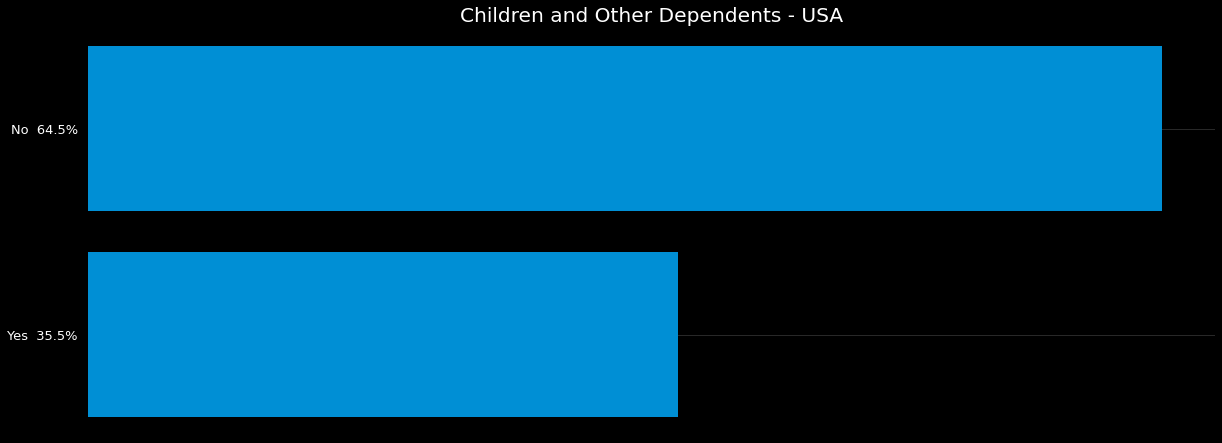

In [151]:
Dependents = data["Dependents"]                      # We called necessary data
Dependents=Dependents.dropna(inplace=False)          # We filter the data from NaN and empty spaces 

new_data = data[ (Dependents != "nan") & ( data["Country"] == "United States")] # data by country (USA)

new_Dependents = new_data["Dependents"]  # save new data into new variable

Dictionary_Distributor(new_Dependents , False)       # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, new_Dependents ,"fivethirtyeight", False , (18,7), "Children and Other Dependents - USA")  # Building a schedule


<h5 style="text-align:center; " > <b>Families and IT Support

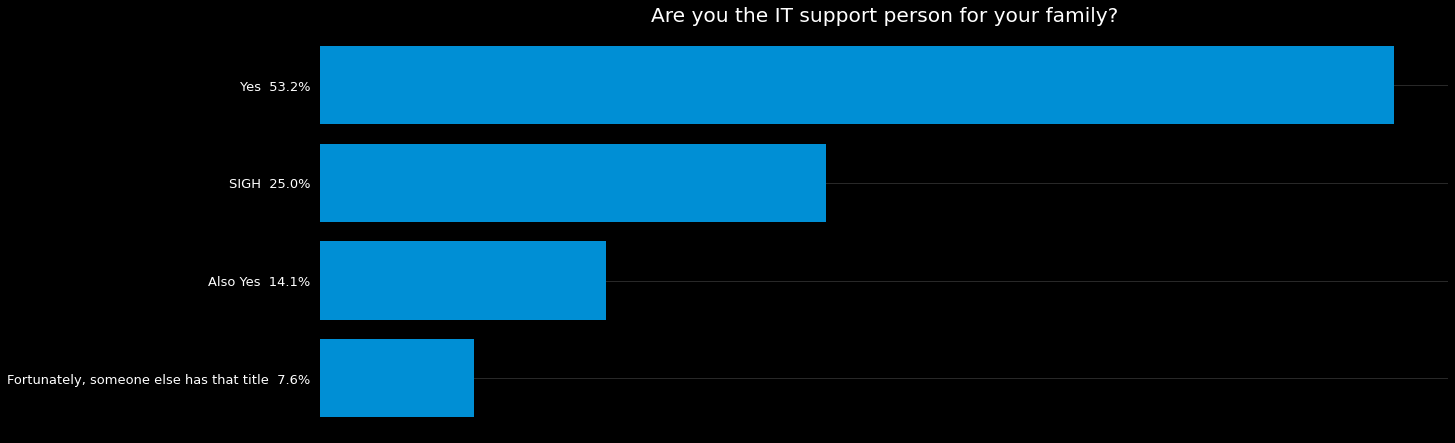

In [152]:
ITperson = data["ITperson"]                      # We called necessary data
ITperson=ITperson.dropna(inplace=False)          # We filter the data from NaN and empty spaces 

Dictionary_Distributor(ITperson , False)       # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, ITperson ,"fivethirtyeight", False , (18,7), "Are you the IT support person for your family?")  # Building a schedule


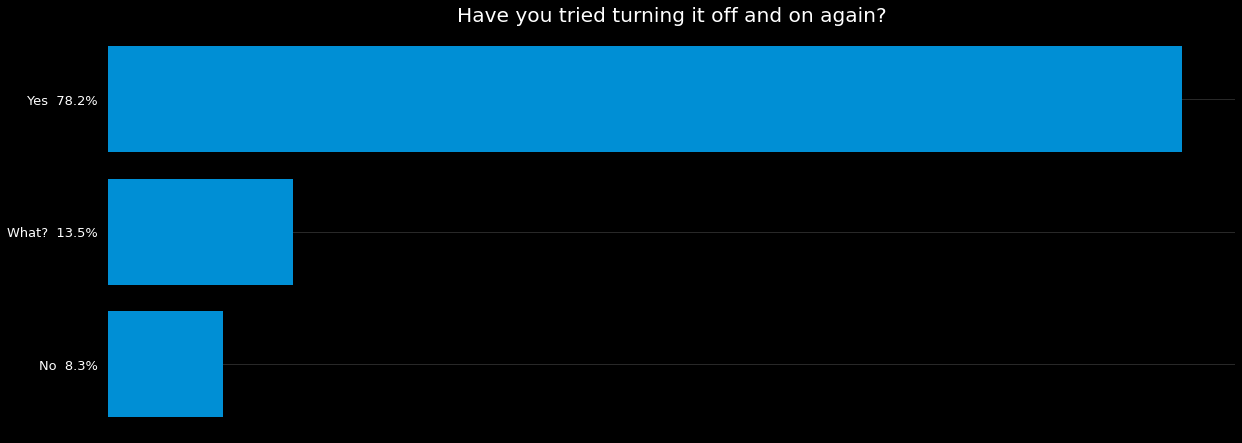

In [153]:
OffOn = data["OffOn"]                      # We called necessary data
OffOn=OffOn.dropna(inplace=False)          # We filter the data from NaN and empty spaces 

Dictionary_Distributor(OffOn , False)       # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, OffOn ,"fivethirtyeight", False , (18,7), "Have you tried turning it off and on again?")  # Building a schedule


<h5 style="text-align:center; " > <b>Will People Born Today Have a Better Life Than Their Parents?

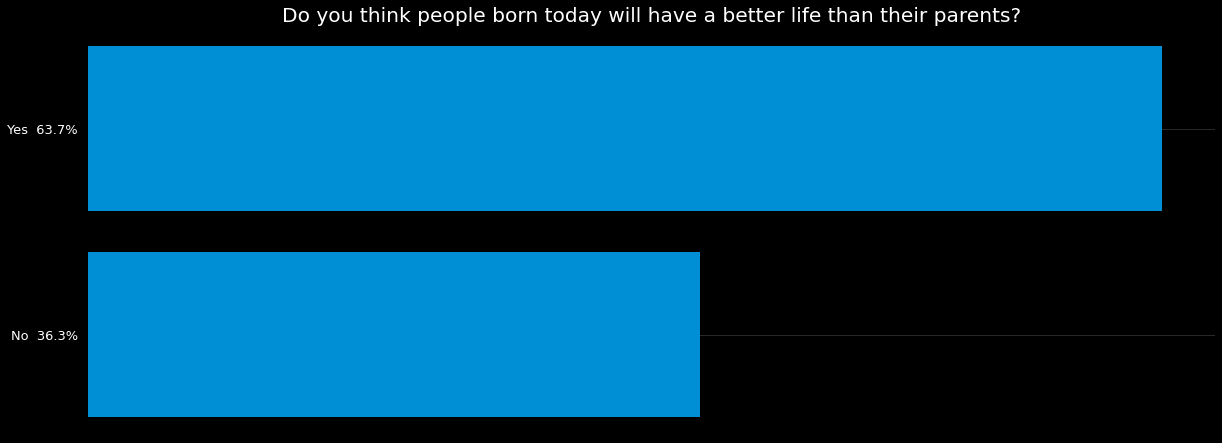

In [154]:
BetterLife = data["BetterLife"]                      # We called necessary data
BetterLife=BetterLife.dropna(inplace=False)          # We filter the data from NaN and empty spaces 

Dictionary_Distributor(BetterLife , False)       # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, BetterLife ,"fivethirtyeight", False , (18,7), "Do you think people born today will have a better life than their parents?")  # Building a schedule


<h5 style="text-align:center; " > <b>Social Media Use

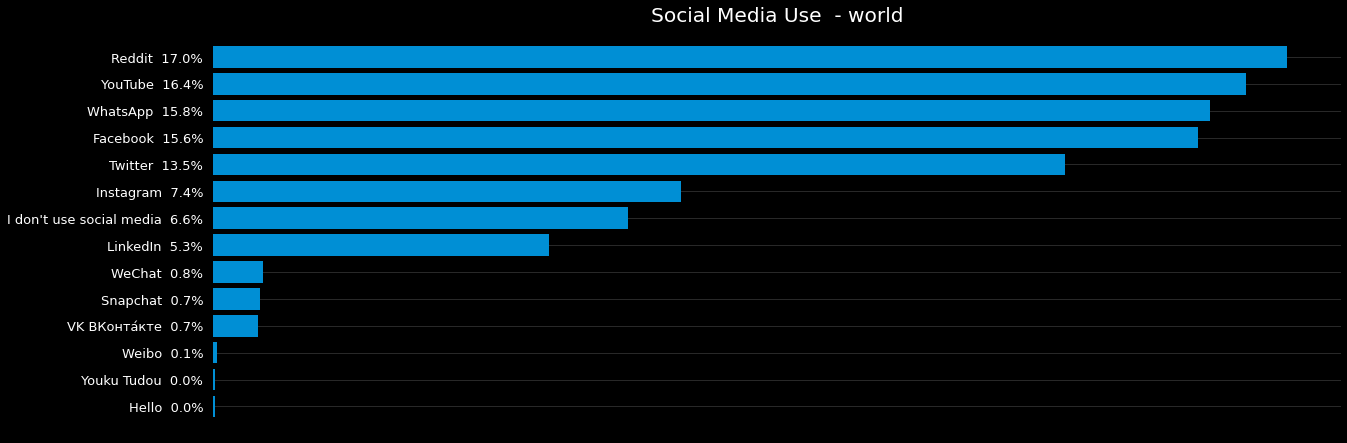

In [155]:
SocialMedia = data["SocialMedia"]   # We called necessary data

SocialMedia.dropna(inplace=True)    # We filter the data from NaN and empty spaces 


SocialMedia = np.where(SocialMedia == "WeChat 微信", "WeChat", SocialMedia)  # replace "WeChat 微信" with "WeChat"
SocialMedia = np.where(SocialMedia == "Weibo 新浪微博", "Weibo", SocialMedia)  # replace "Weibo 新浪微博" with "Weibo"
SocialMedia = np.where(SocialMedia == "Youku Tudou 优酷", "Youku Tudou", SocialMedia)  # replace "Youku Tudou 优酷" with "Youku Tudou"


Dictionary_Distributor(SocialMedia , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, SocialMedia ,"fivethirtyeight", False , (18,7), "Social Media Use  - world")  # Building a schedule


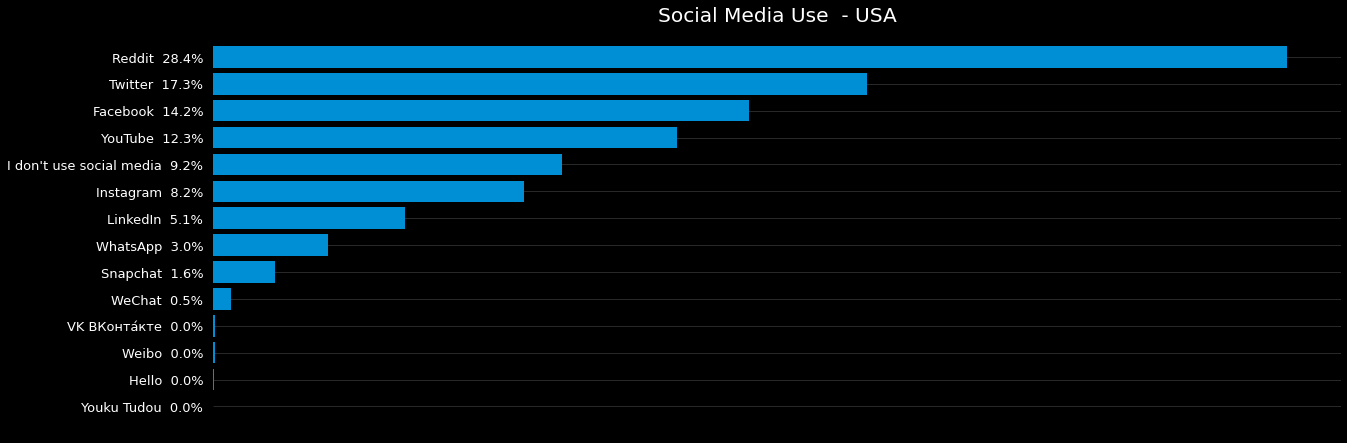

In [156]:
SocialMedia = data["SocialMedia"]   # We called necessary data

SocialMedia.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

new_SocialMedia = data[ (SocialMedia != "nan") & (data["Country"] == "United States")] # data by country (USA)

new_SocialMedia = new_SocialMedia ["SocialMedia"] # save new data inro new variable 

new_SocialMedia = np.where(new_SocialMedia == "WeChat 微信", "WeChat", new_SocialMedia)  # replace "WeChat 微信" with "WeChat"
new_SocialMedia = np.where(new_SocialMedia == "Weibo 新浪微博", "Weibo", new_SocialMedia)  # replace "Weibo 新浪微博" with "Weibo"
new_SocialMedia = np.where(new_SocialMedia == "Youku Tudou 优酷", "Youku Tudou", new_SocialMedia)  # replace "Youku Tudou 优酷" with "Youku Tudou"

Dictionary_Distributor(new_SocialMedia , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, new_SocialMedia ,"fivethirtyeight", False , (18,7), "Social Media Use  - USA")  # Building a schedule



<h5 style="text-align:center; " > <b>What's Your Handle?

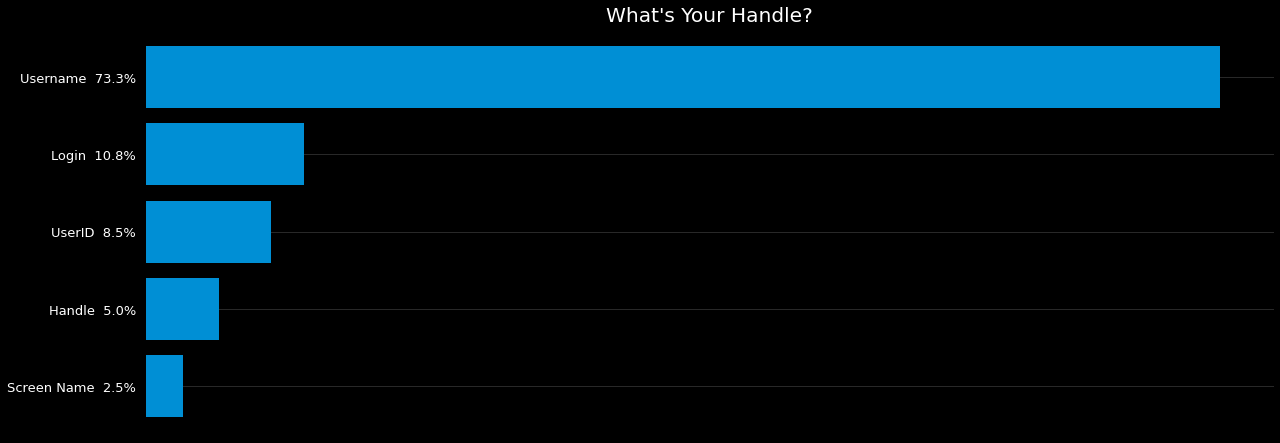

In [157]:
ScreenName = data["ScreenName"]   # We called necessary data

ScreenName.dropna(inplace=True)    # We filter the data from NaN and empty spaces 


Dictionary_Distributor(ScreenName , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, ScreenName ,"fivethirtyeight", False , (18,7), "What's Your Handle?")  # Building a schedule


<h5 style="text-align:center; " > <b>IRL or online chat?

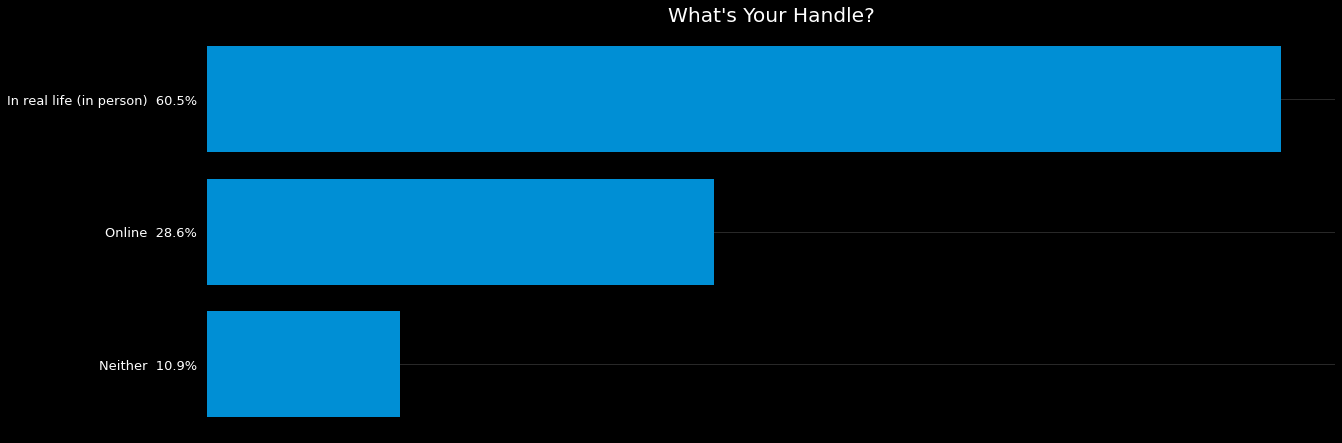

In [158]:
Extraversion = data["Extraversion"]   # We called necessary data

Extraversion.dropna(inplace=True)    # We filter the data from NaN and empty spaces 


Dictionary_Distributor(Extraversion , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, Extraversion ,"fivethirtyeight", False , (18,7), "What's Your Handle?")  # Building a schedule


## Technology

#### Most Popular Technologies

<h5 style="text-align:center; " > <b>Programming, Scripting, and Markup Languages

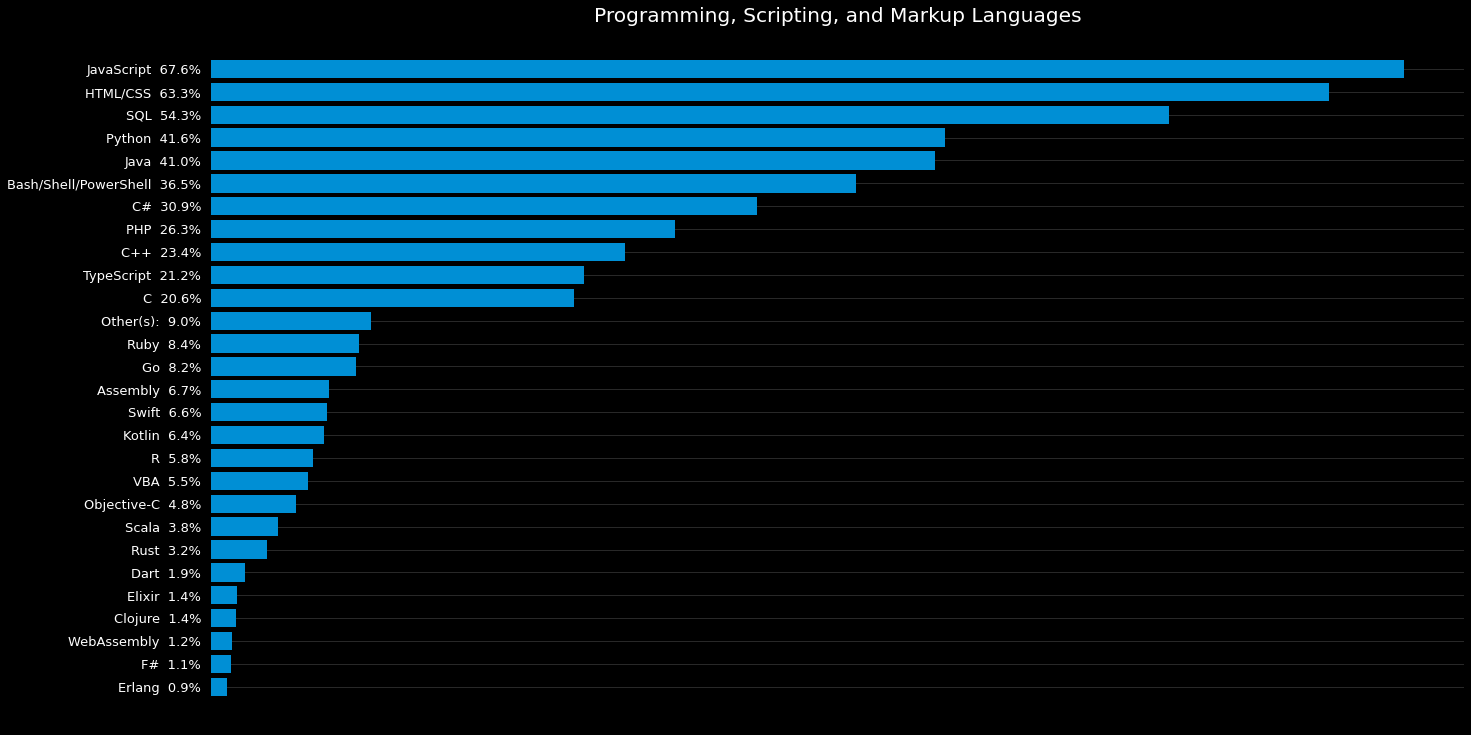

In [159]:
LanguageWorkedWith = data["LanguageWorkedWith"]   # We called necessary data

LanguageWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

LanguageWorkedWith = LanguageWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(LanguageWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, LanguageWorkedWith ,"fivethirtyeight", False , (20,12), "Programming, Scripting, and Markup Languages")  # Building a schedule


<h5 style="text-align:center; " > <b>Web Frameworks

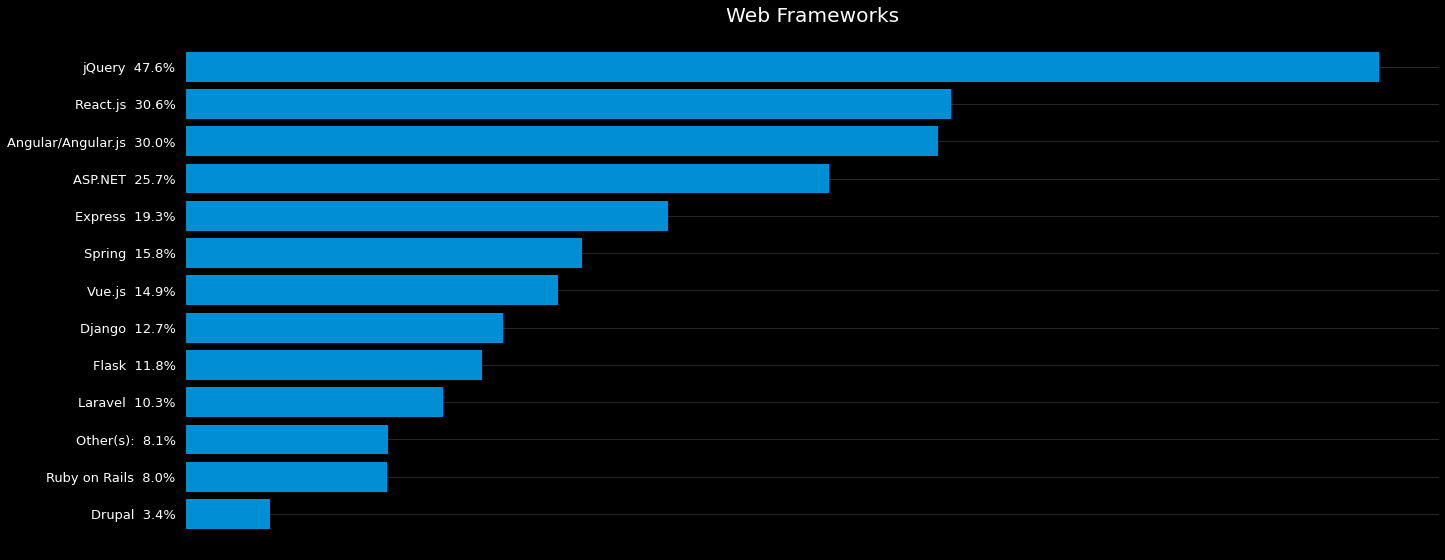

In [160]:
WebFrameWorkedWith = data["WebFrameWorkedWith"]   # We called necessary data

WebFrameWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

WebFrameWorkedWith = WebFrameWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(WebFrameWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, WebFrameWorkedWith ,"fivethirtyeight", False , (20,9), "Web Frameworks")  # Building a schedule


<h5 style="text-align:center; " > <b>Other Frameworks, Libraries, and Tools

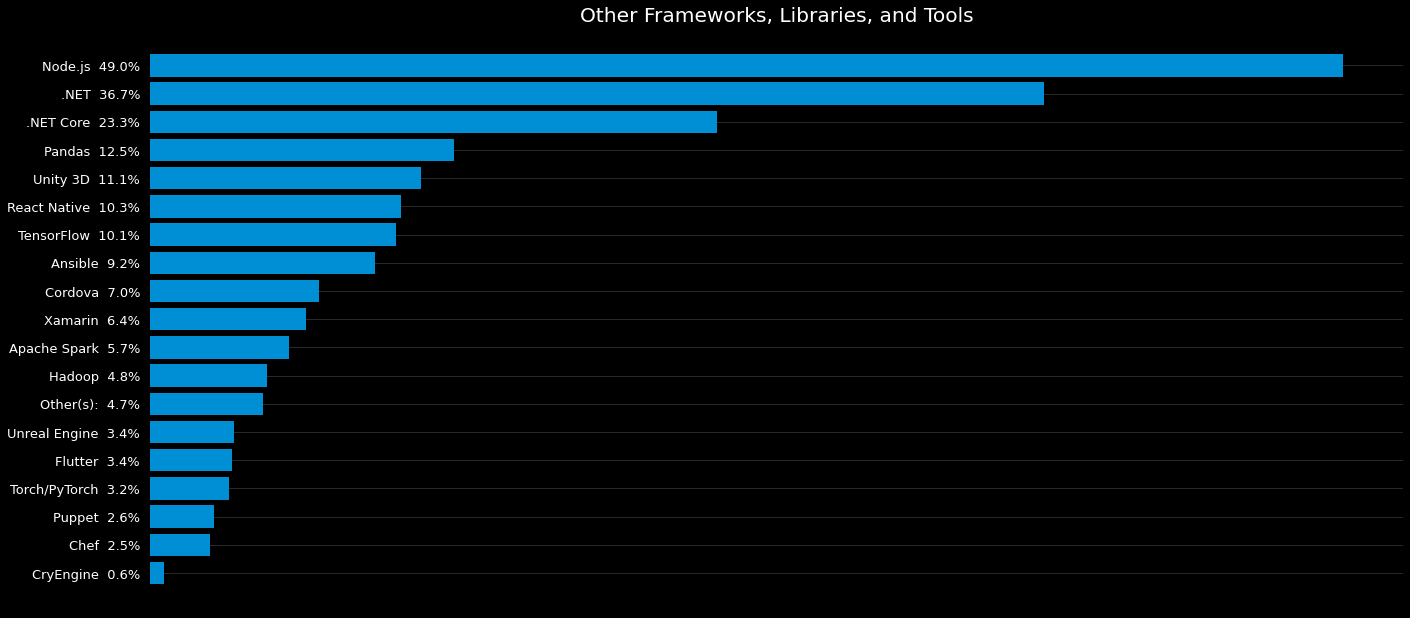

In [161]:
MiscTechWorkedWith = data["MiscTechWorkedWith"]   # We called necessary data

MiscTechWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

MiscTechWorkedWith = MiscTechWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(MiscTechWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, MiscTechWorkedWith ,"fivethirtyeight", False , (20,10), "Other Frameworks, Libraries, and Tools")  # Building a schedule


<h5 style="text-align:center; " > <b>Databases

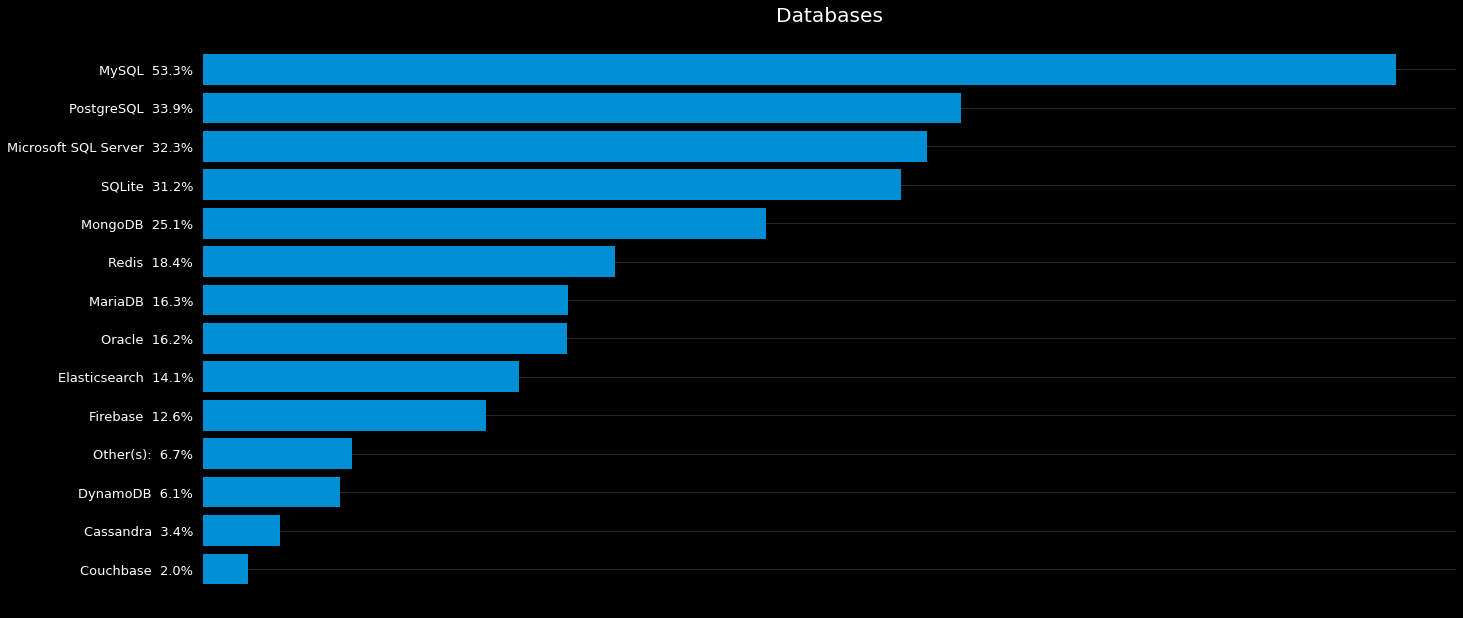

In [162]:
DatabaseWorkedWith = data["DatabaseWorkedWith"]   # We called necessary data

DatabaseWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

DatabaseWorkedWith = DatabaseWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(DatabaseWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, DatabaseWorkedWith ,"fivethirtyeight", False , (20,10), "Databases")  # Building a schedule


<h5 style="text-align:center; " > <b>Platforms

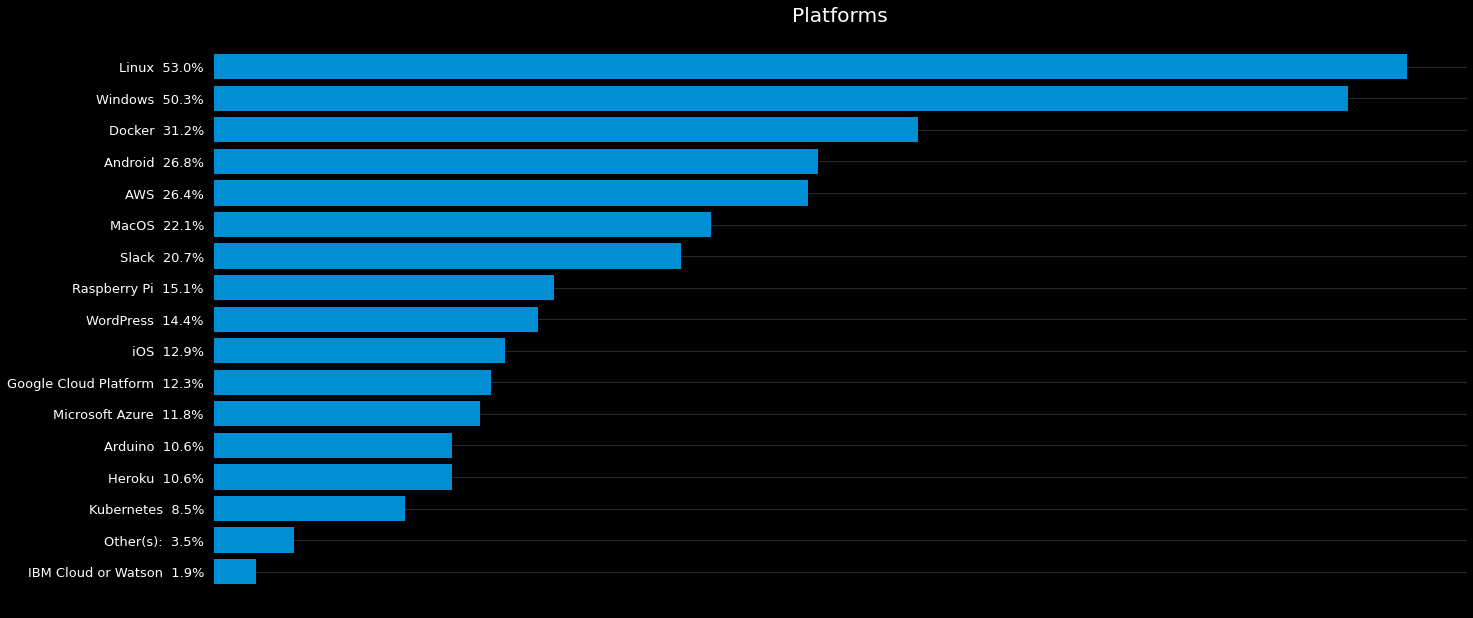

In [163]:
PlatformWorkedWith = data["PlatformWorkedWith"]   # We called necessary data

PlatformWorkedWith.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

PlatformWorkedWith = PlatformWorkedWith.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(PlatformWorkedWith , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, PlatformWorkedWith ,"fivethirtyeight", False , (20,10), "Platforms")  # Building a schedule


####  Development Environments and Tools

<h5 style="text-align:center; " > <b> Most Popular Development Environments

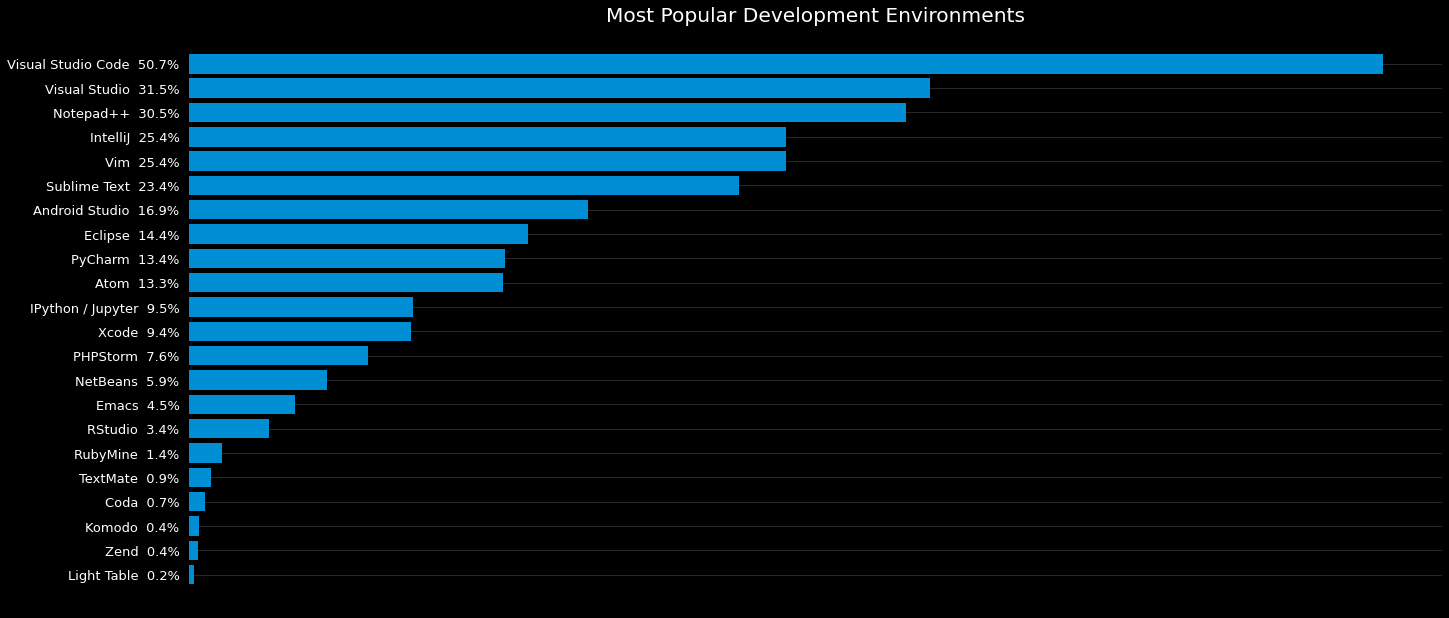

In [164]:
DevEnviron = data["DevEnviron"]   # We called necessary data

DevEnviron.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

DevEnviron = DevEnviron.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(DevEnviron , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, DevEnviron ,"fivethirtyeight", False , (20,10), "Most Popular Development Environments")  # Building a schedule


C:\Users\Anri\AppData\Local\Temp\ipykernel_2268\2674232490.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_DevEnviron.dropna(inplace = True)       # We filter the data from NaN and empty spaces


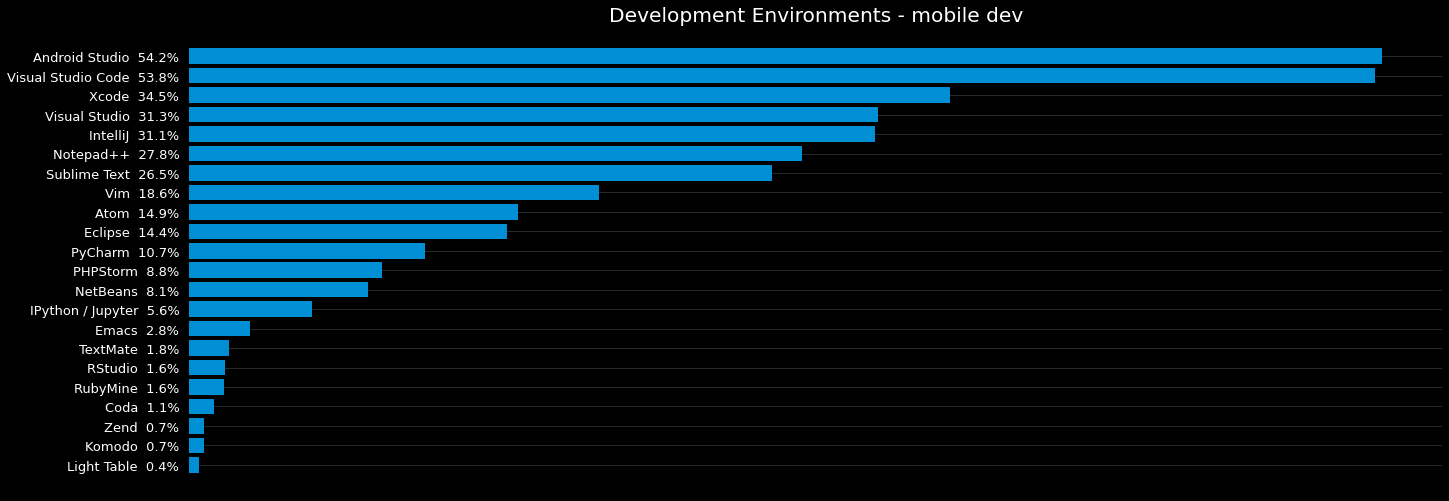

In [165]:
DevType = data["DevType"]    # We called necessary data
dev_environment = data["DevEnviron"]    # We called necessary data
DevType.dropna(inplace = True)      # We filter the data from NaN and empty spaces


new_list = []  # creat new list for key Phrases

for i in DevType:
    if "mobile" in i:           # check all variable and add specific ones into "new_list" 
        new_list.append(i)



counted = Counter(new_list)   # count key Phrases     reason: Eliminate repetitions
key_list = list(counted)    # take only key Phrases



all_ifo = []

for i in key_list:
    new_data = data[(dev_environment != "Nan") & (data["DevType"] == i) ]  # 

    new_DevEnviron = new_data['DevEnviron']   # save old data into new data

    new_DevEnviron.dropna(inplace = True)       # We filter the data from NaN and empty spaces

    for i in new_DevEnviron:
        all_ifo.append(i.split(";"))    # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(all_ifo , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, all_ifo ,"fivethirtyeight", False , (20,8), "Development Environments - mobile dev")  # Building a schedule

C:\Users\Anri\AppData\Local\Temp\ipykernel_2268\3291289554.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_DevEnviron.dropna(inplace = True)       # We filter the data from NaN and empty spaces


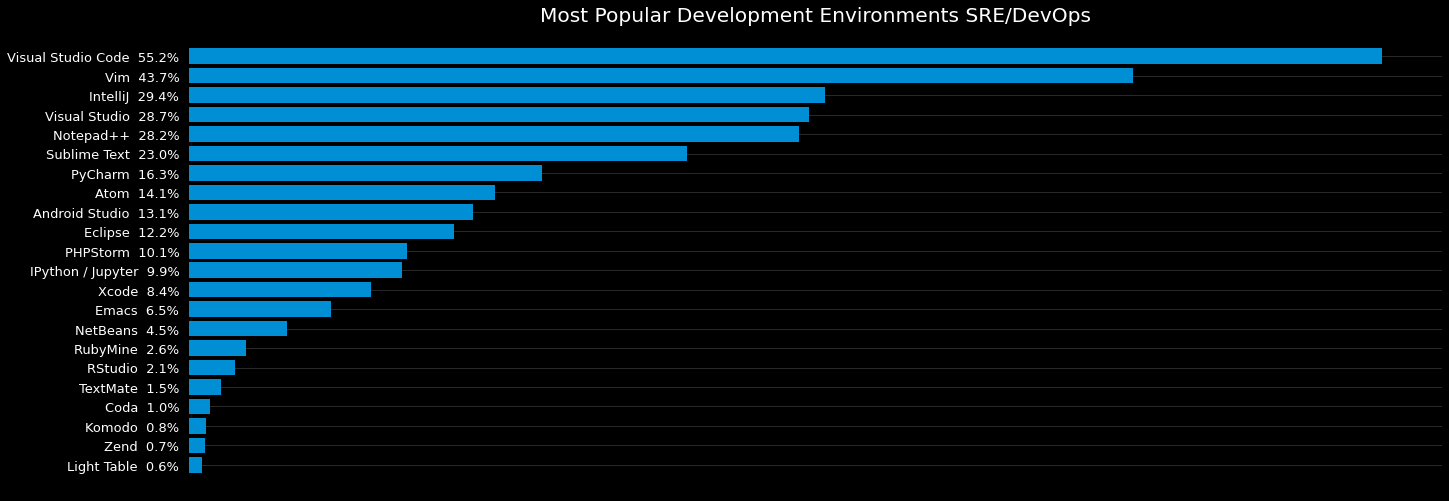

In [166]:
DevType = data["DevType"]    # We called necessary data
DevEnviron = data["DevEnviron"]    # We called necessary data
DevType.dropna(inplace = True)      # We filter the data from NaN and empty spaces


new_list = []       # creat new list for key Phrases


for i in DevType:
    if "site reliability" in i or "DevOps" in i:
       new_list.append(i)       # check all variable and add specific ones into "new_list" 

counted = Counter(new_list) # count key Phrases     reason: Eliminate repetitions

key_list = list(counted)    # take only key Phrases




devtype_with_enironment = []


for i in key_list:
    new_data = data[(DevEnviron != "Nan") & (data["DevType"] == i) ]

    new_DevEnviron = new_data['DevEnviron']     # save old data into new data

    new_DevEnviron.dropna(inplace = True)       # We filter the data from NaN and empty spaces

    for i in new_DevEnviron:
        devtype_with_enironment.append(i.split(";"))     # We are splitting variables    "split variable when program sees (;) "




Double_list_sort_count(devtype_with_enironment, False)  # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, devtype_with_enironment ,"fivethirtyeight", False , (20,8), "Most Popular Development Environments SRE/DevOps") # Building a schedule

<h5 style="text-align:center; " > <b>Developers' Primary Operating Systems

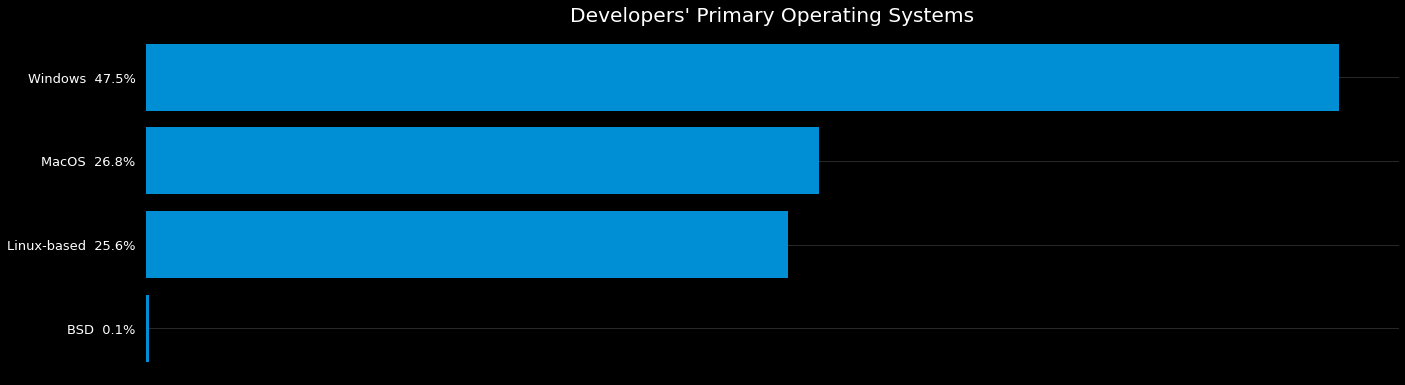

In [167]:
OpSys = data["OpSys"]   # We called necessary data

OpSys.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

OpSys = OpSys.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(OpSys , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, OpSys ,"fivethirtyeight", False , (20,6), "Developers' Primary Operating Systems")  # Building a schedule


<h5 style="text-align:center; " > <b>Using Containers

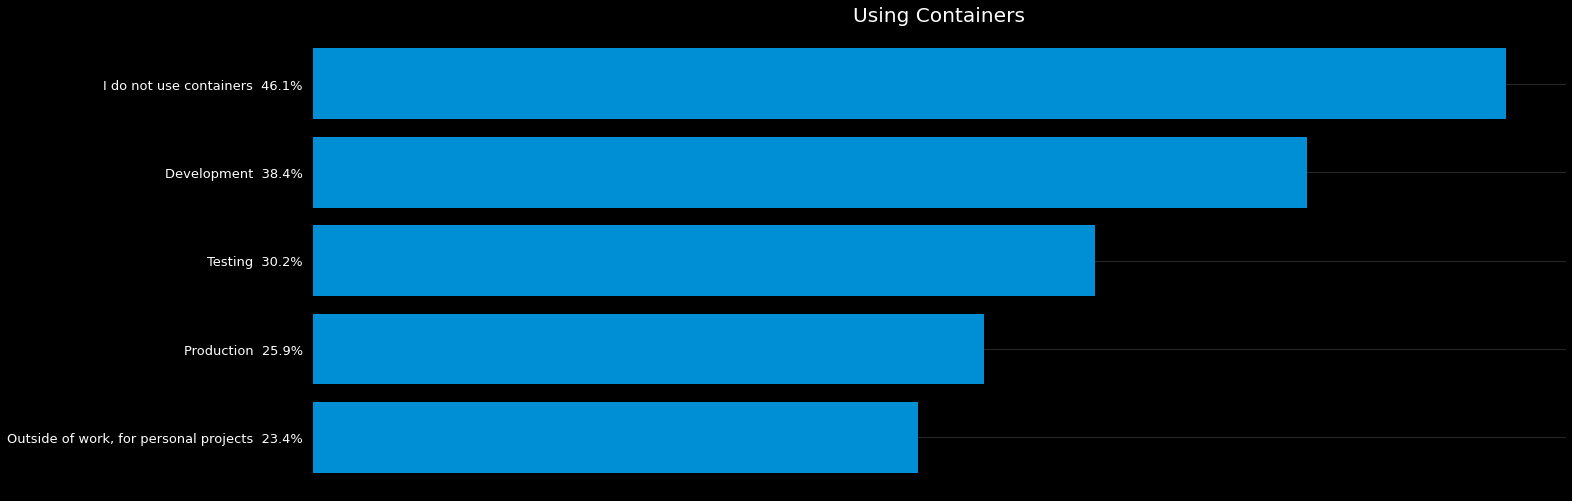

In [168]:
Containers = data["Containers"]   # We called necessary data

Containers.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

Containers = Containers.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(Containers , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, Containers ,"fivethirtyeight", False , (20,8), "Using Containers")  # Building a schedule


#### Blockchain in the Real World

<h5 style="text-align:center; " > <b>How Are Organizations Using Blockchain Technology?

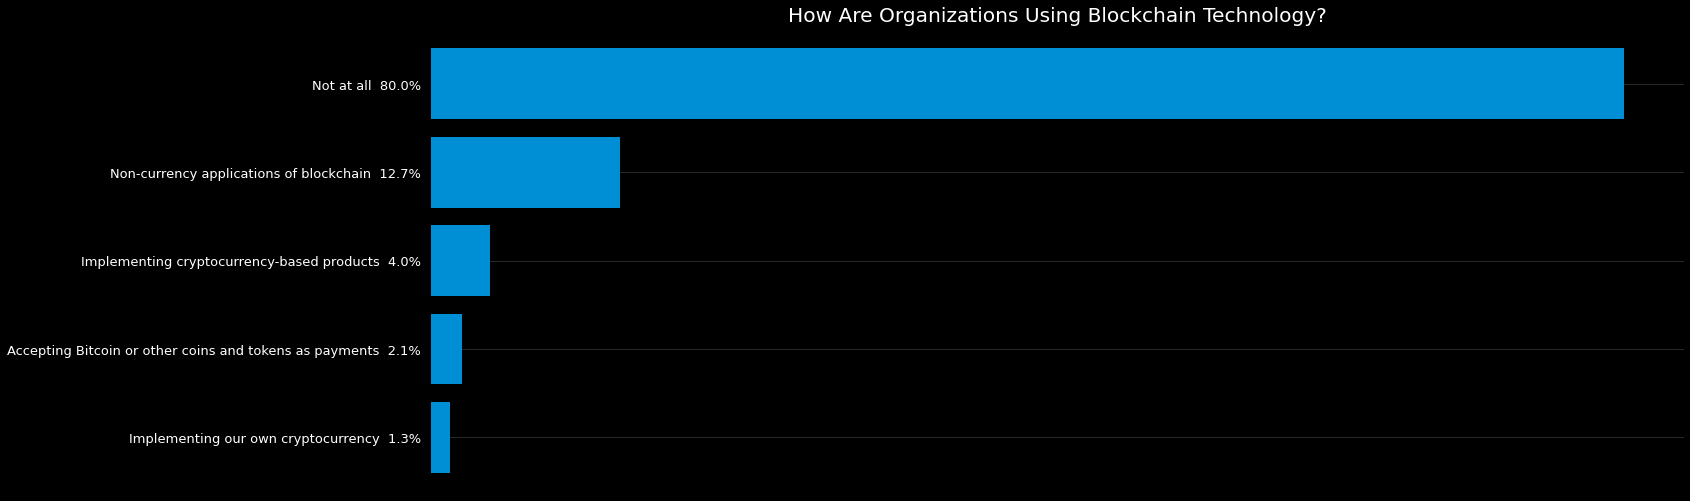

In [169]:
BlockchainOrg = data["BlockchainOrg"]   # We called necessary data

BlockchainOrg.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

BlockchainOrg = BlockchainOrg.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(BlockchainOrg , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, BlockchainOrg ,"fivethirtyeight", False , (20,8), "How Are Organizations Using Blockchain Technology?")  # Building a schedule


<h5 style="text-align:center; " > <b>Developer Opinions on Blockchain Technology

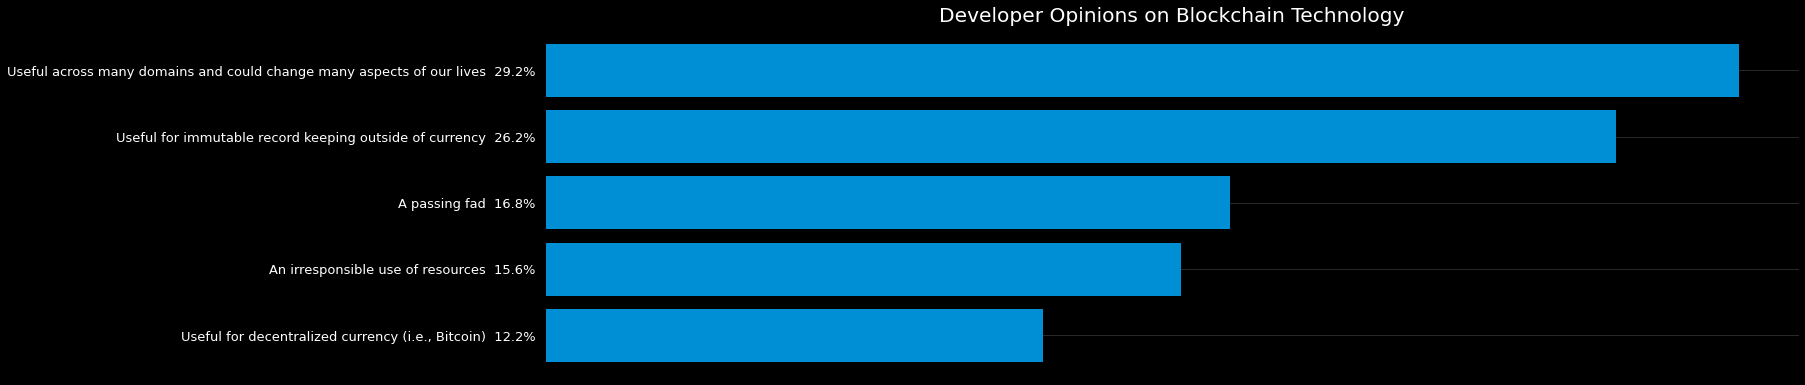

In [170]:
BlockchainIs = data["BlockchainIs"]   # We called necessary data

BlockchainIs.dropna(inplace=True)    # We filter the data from NaN and empty spaces 

BlockchainIs = BlockchainIs.str.split(";")  # We are splitting variables    "split variable when program sees (;) "

Double_list_sort_count(BlockchainIs , False)     # list sorter-Counter

Build_Barh_sizes( key_Phrases , Quantity, BlockchainIs ,"fivethirtyeight", False , (20,6), "Developer Opinions on Blockchain Technology")  # Building a schedule


## Work

#### Employment

<h5 style="text-align:center; " > <b>Employment Status

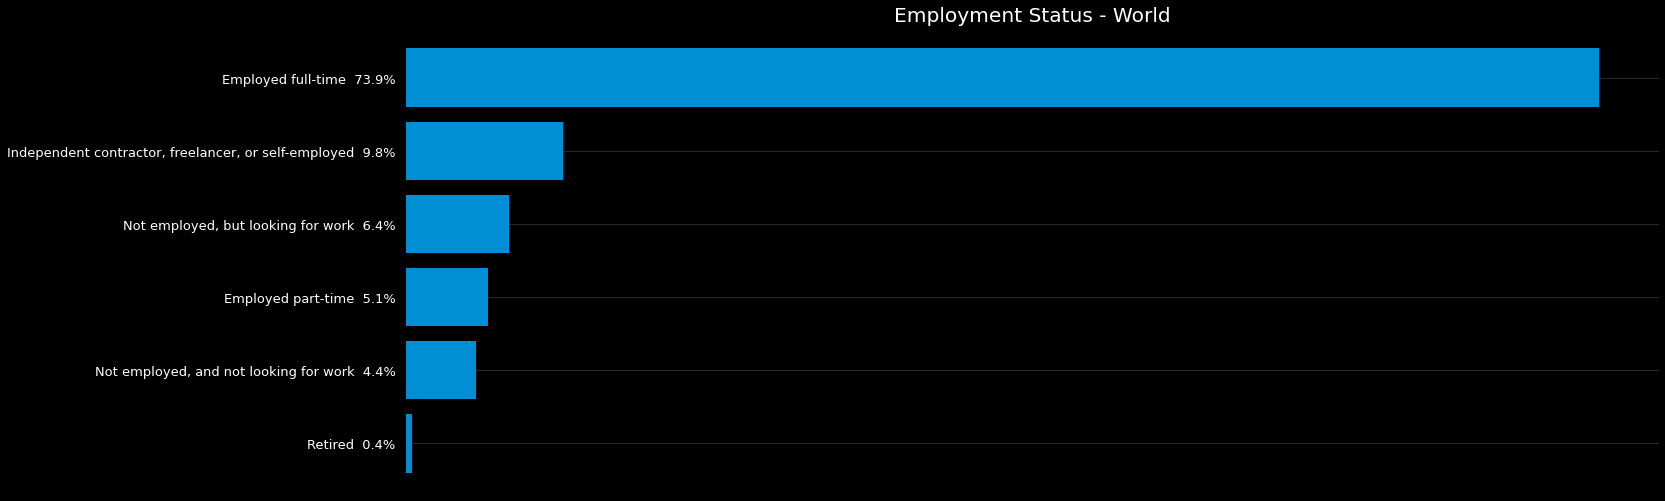

In [171]:
Employment = data['Employment']

Employment.dropna(inplace=True)


Dictionary_Distributor(Employment, False)


Build_Barh_sizes( key_Phrases , Quantity, Employment ,"fivethirtyeight", False , (20,8), "Employment Status - World")  # Building a schedule



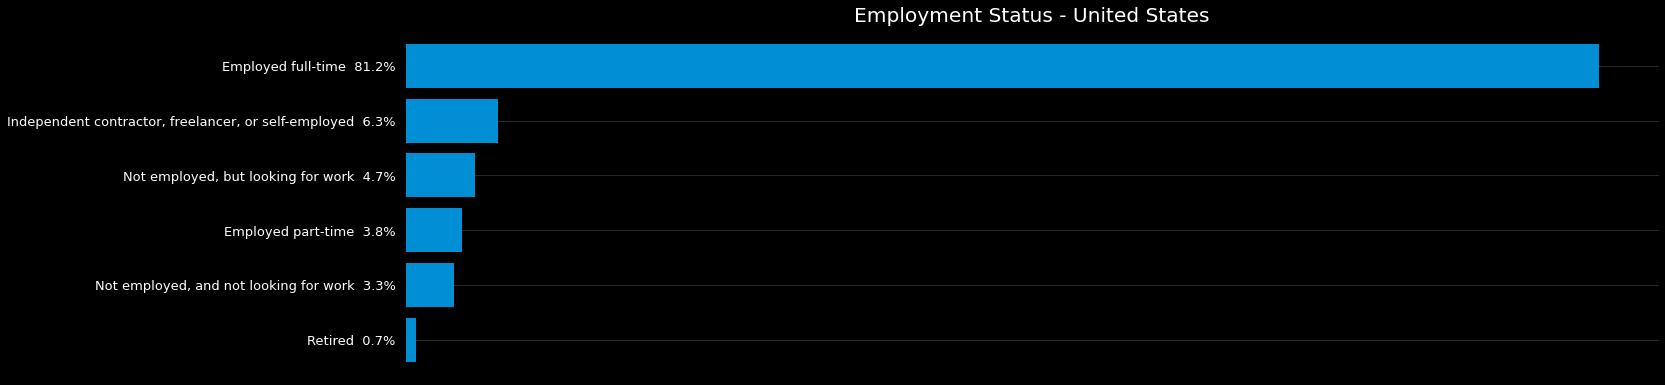

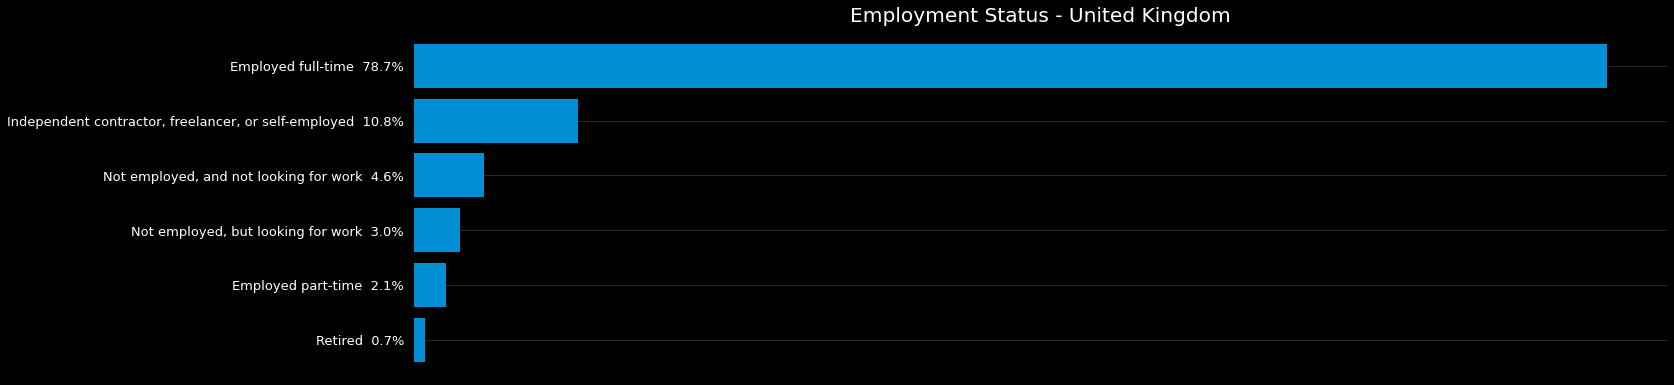

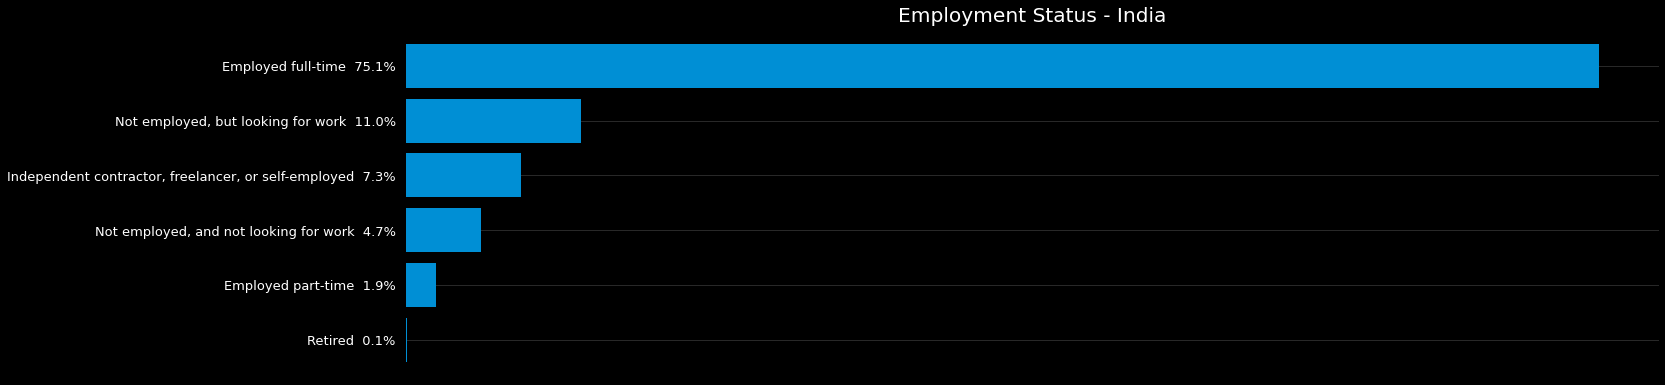

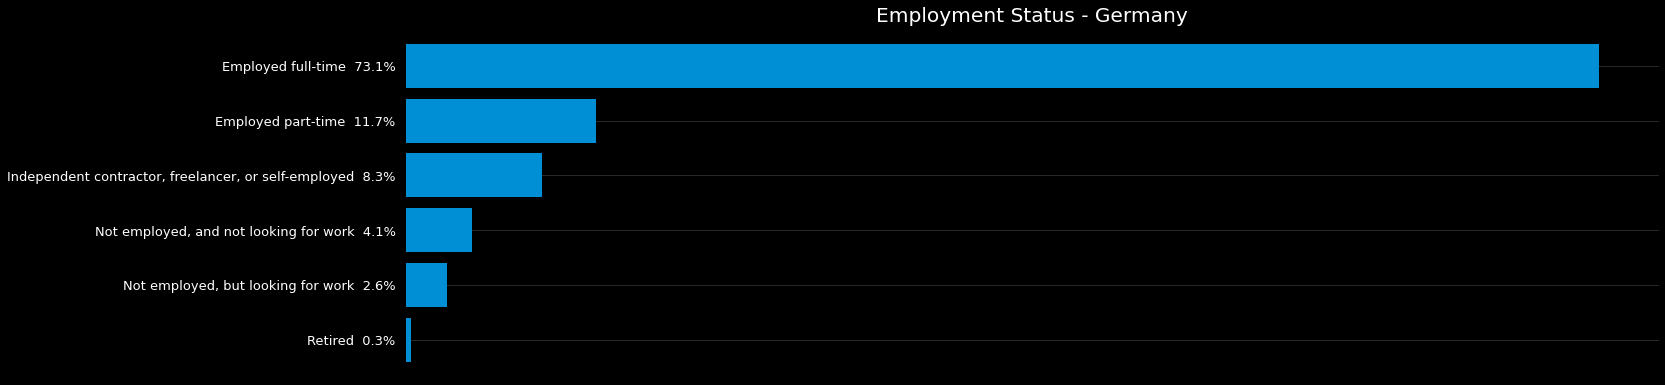

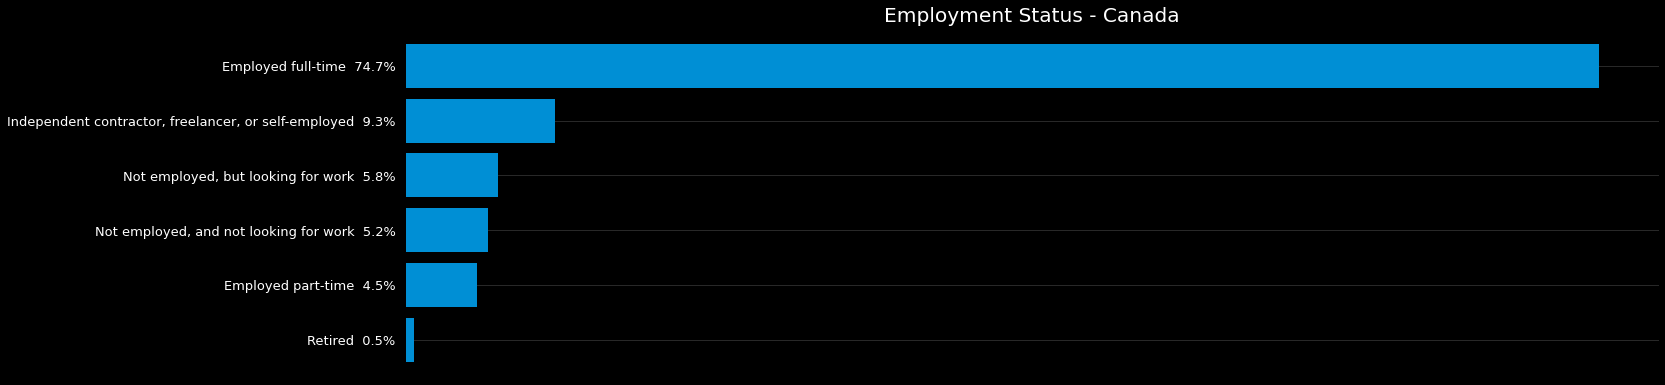

In [172]:
Employment = data["Employment"]
Employment.dropna(inplace=True)

Countries = ["United States", "United Kingdom","India", "Germany","Canada"]

for i in Countries:

    new_Employment = data[ (Employment != "NaN")   &  ( data["Country"] == i ) ]

    new_Employment = new_Employment ["Employment"]


    Dictionary_Distributor(new_Employment , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_Employment ,"fivethirtyeight", False , (20,6), "Employment Status - " + i)  # Building a schedule

####  Company Type

<h5 style="text-align:center; " > <b>Company Size

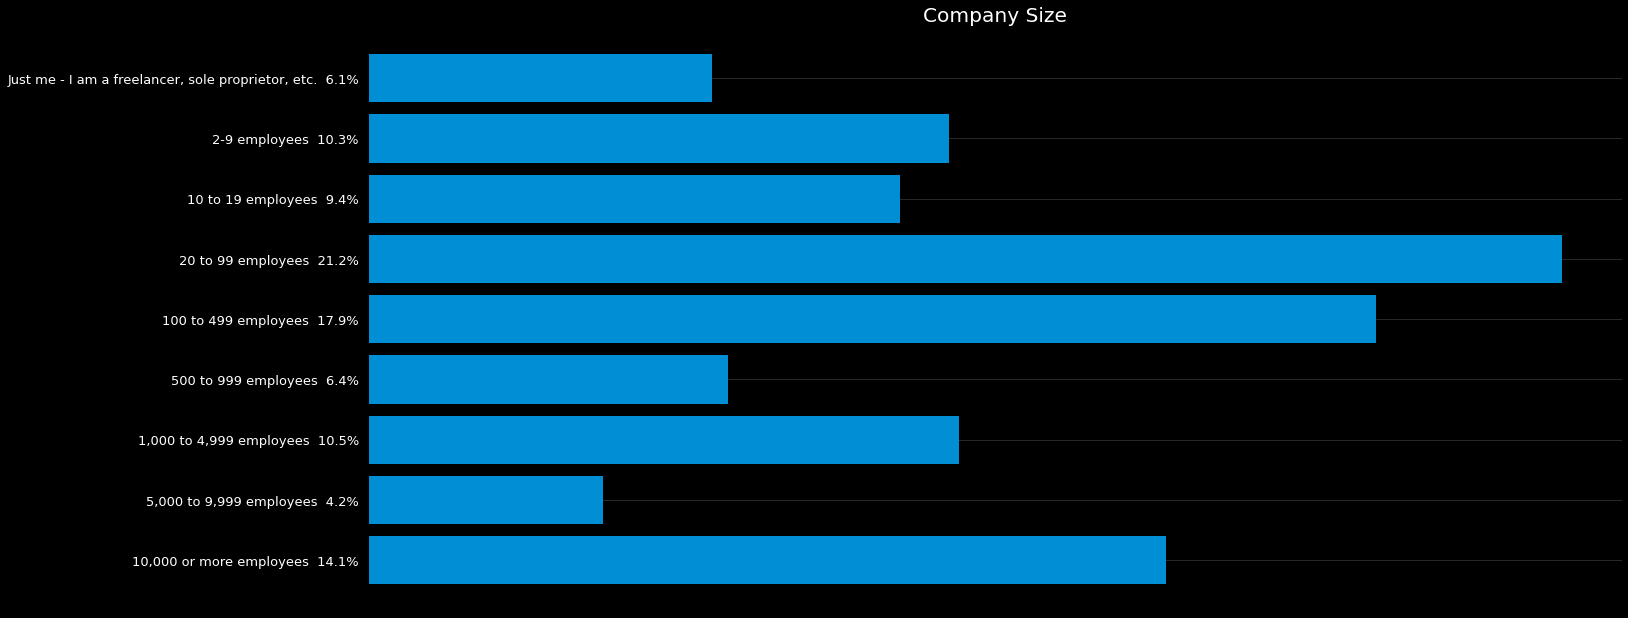

In [173]:
OrgSize = data['OrgSize']

OrgSize.dropna(inplace=True)

OrgSize_Counted = Counter(OrgSize)


key_Phrases = ['Just me - I am a freelancer, sole proprietor, etc.' ,'2-9 employees', '10 to 19 employees' ,'20 to 99 employees','100 to 499 employees', '500 to 999 employees','1,000 to 4,999 employees','5,000 to 9,999 employees','10,000 or more employees',]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(OrgSize_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, OrgSize ,"fivethirtyeight", False , (20,10), "Company Size")  # Building a schedule



####  Career Values

<h5 style="text-align:center; " > <b>How Do Developers Feel About Their Careers and Jobs?

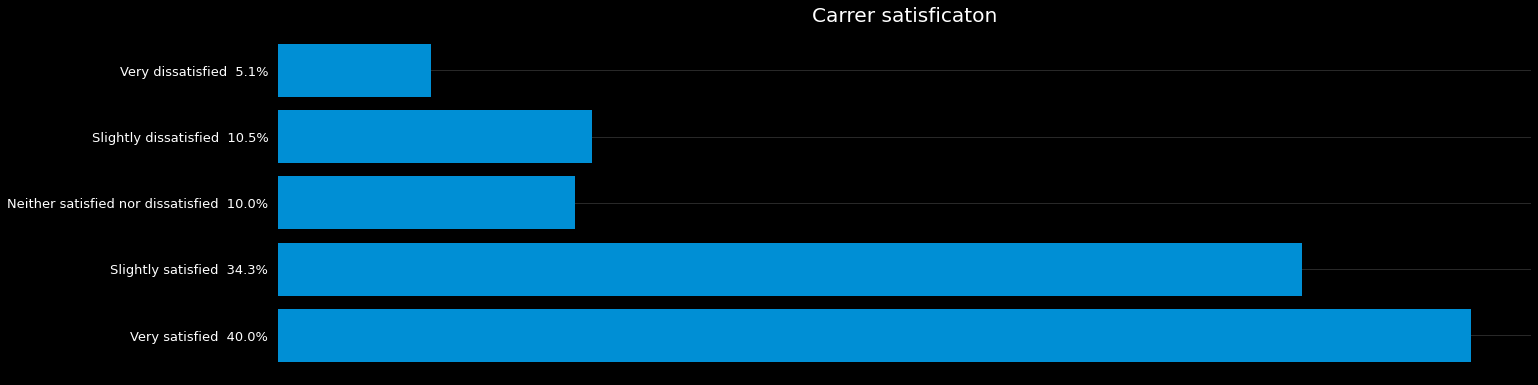

In [174]:
CareerSat = data["CareerSat"]
CareerSat.dropna(inplace=True)

CareerSat_Counted = Counter(CareerSat)

key_Phrases = ['Very dissatisfied','Slightly dissatisfied','Neither satisfied nor dissatisfied','Slightly satisfied','Very satisfied' ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(CareerSat_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, CareerSat ,"fivethirtyeight", False , (20,6), "Carrer satisficaton")  # Building a schedule



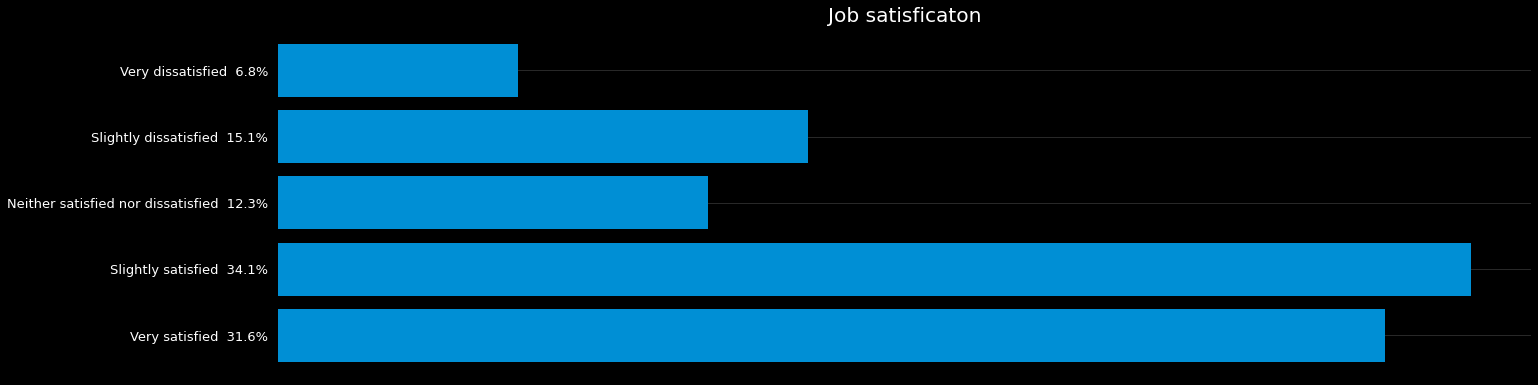

In [175]:
JobSat = data["JobSat"]
JobSat.dropna(inplace=True)

JobSat_Counted = Counter(JobSat)

key_Phrases = key_Phrases = ['Very dissatisfied','Slightly dissatisfied','Neither satisfied nor dissatisfied','Slightly satisfied','Very satisfied' ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(JobSat_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, JobSat ,"fivethirtyeight", False , (20,6), "Job satisficaton")  # Building a schedule



<h5 style="text-align:center; " > <b>How Confident Are Developers in Their Managers?

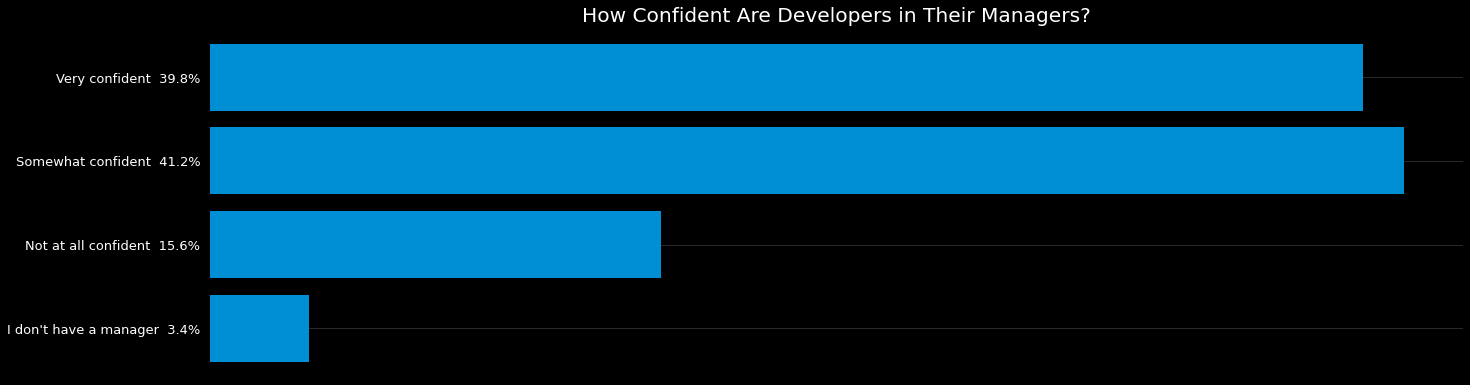

In [176]:
MgrIdiot = data["MgrIdiot"]
MgrIdiot.dropna(inplace=True)

MgrIdiot_Counted = Counter(MgrIdiot)

key_Phrases = key_Phrases = ["Very confident",'Somewhat confident','Not at all confident',"I don't have a manager"]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(MgrIdiot_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, MgrIdiot ,"fivethirtyeight", False , (20,6), "How Confident Are Developers in Their Managers?")  # Building a schedule


<h5 style="text-align:center; " > <b>Do Developers Need to Become Managers to Make More Money?

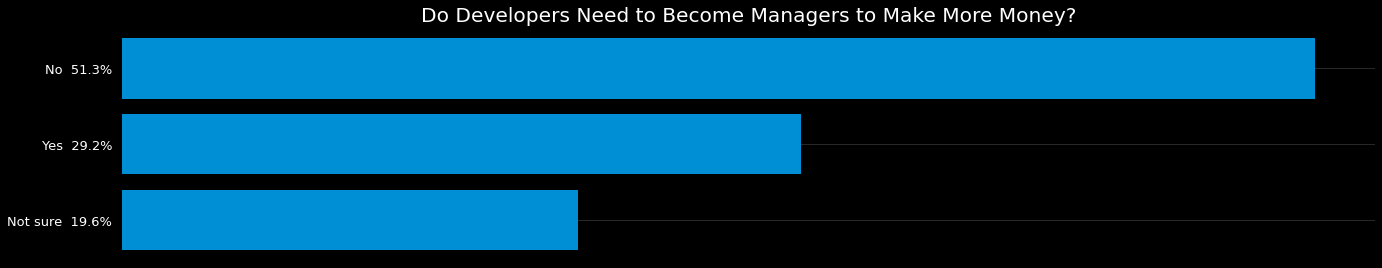

In [177]:
MgrMoney = data["MgrMoney"]
MgrMoney.dropna(inplace=True)

Dictionary_Distributor(MgrMoney , False)

Build_Barh_sizes( key_Phrases , Quantity, MgrMoney ,"fivethirtyeight", False , (20,4), "Do Developers Need to Become Managers to Make More Money?")  # Building a schedule


<h5 style="text-align:center; " > <b>Do Developers Want To Become Managers in the Future?

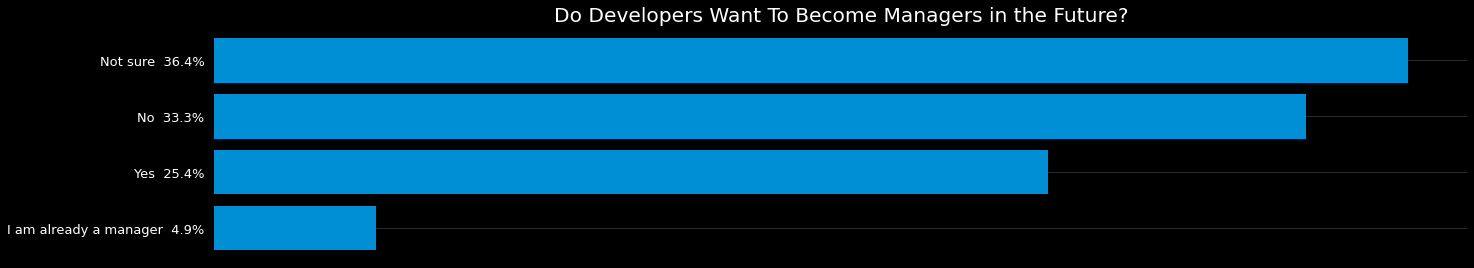

In [178]:
MgrWant = data["MgrWant"]
MgrWant.dropna(inplace=True)

Dictionary_Distributor(MgrWant , False)

Build_Barh_sizes( key_Phrases , Quantity, MgrWant ,"fivethirtyeight", False , (20,4), "Do Developers Want To Become Managers in the Future?")  # Building a schedule


####   Looking for a Job

<h5 style="text-align:center; " > <b>Job Search Status

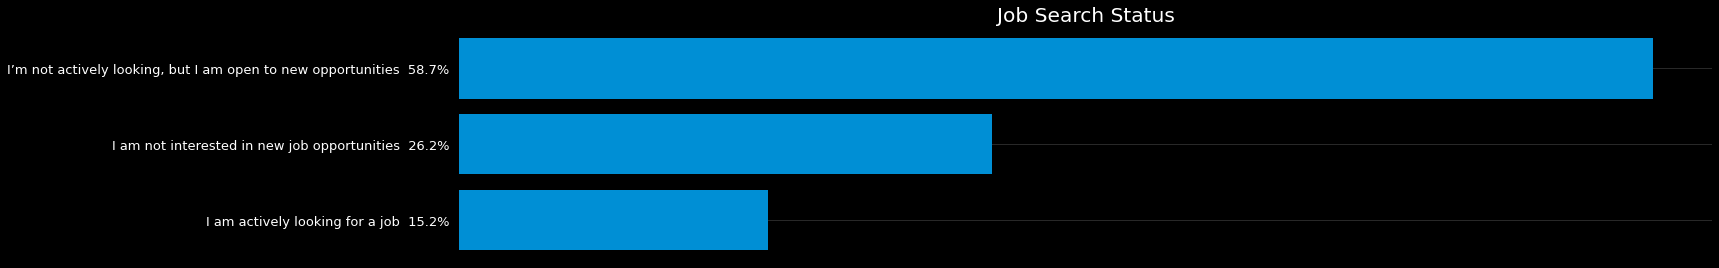

In [179]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace=True)

Dictionary_Distributor(JobSeek , False)

Build_Barh_sizes( key_Phrases , Quantity, JobSeek ,"fivethirtyeight", False , (20,4), "Job Search Status")  # Building a schedule


<h5 style="text-align:center; " > <b>Job Search Status by Geography

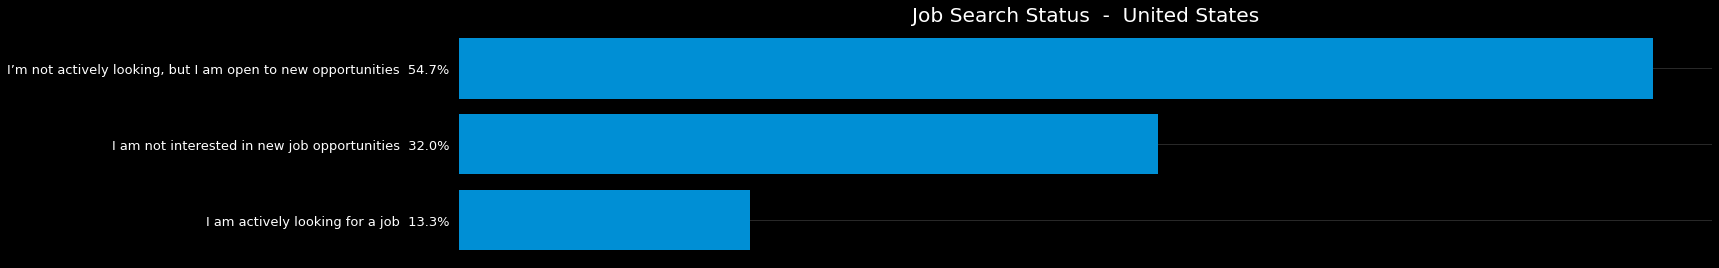

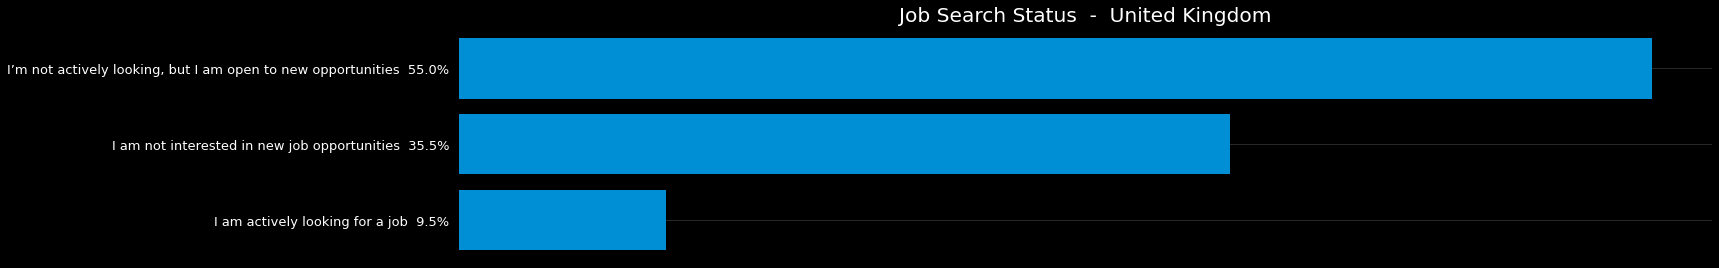

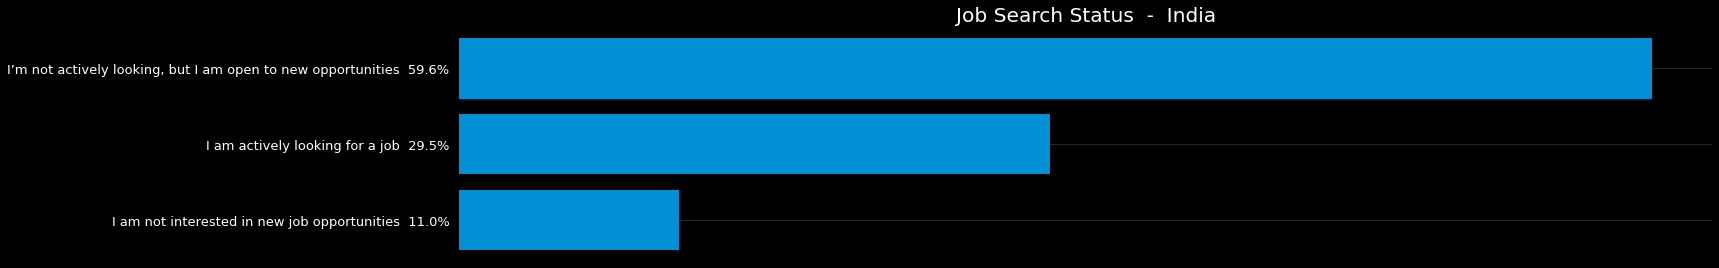

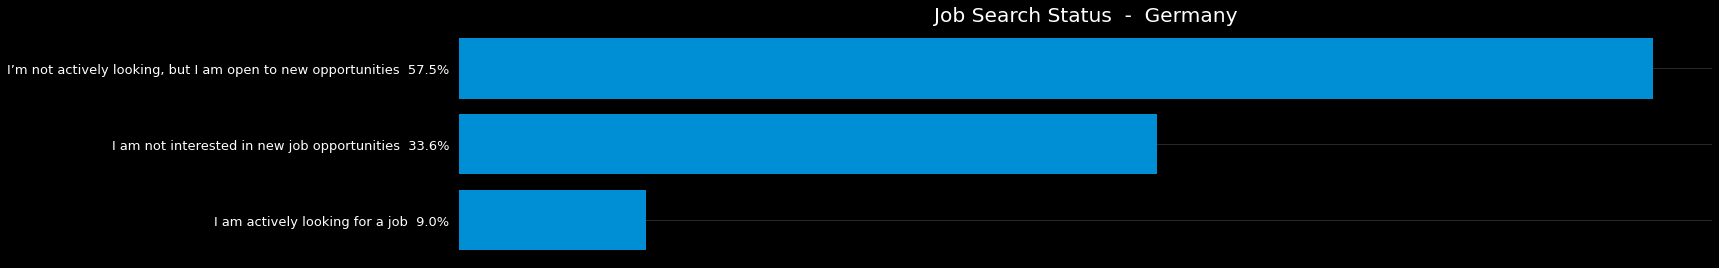

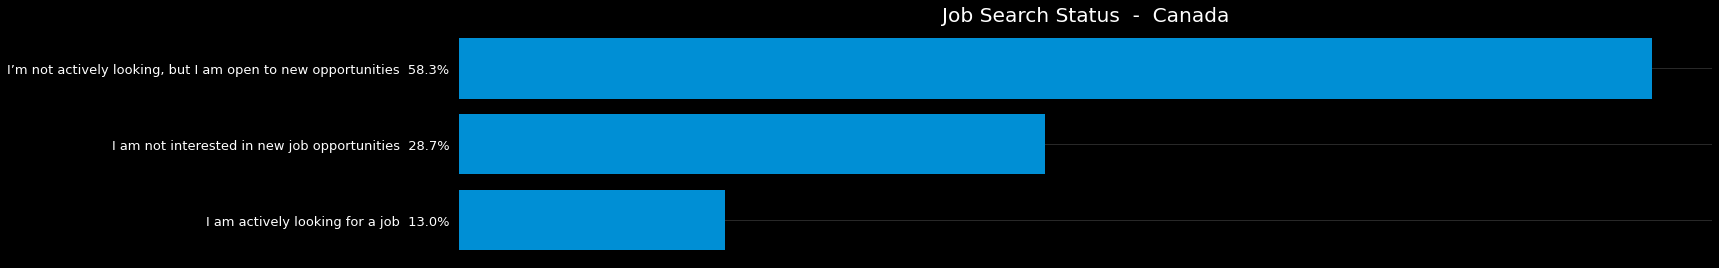

In [180]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace=True)

Countries = ["United States", "United Kingdom","India", "Germany","Canada"]

for i in Countries:

    new_JobSeek = data[ (JobSeek != "NaN")   &  ( data["Country"] == i ) ]

    new_JobSeek = new_JobSeek ["JobSeek"]


    Dictionary_Distributor(new_JobSeek , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_JobSeek ,"fivethirtyeight", False , (20,4), "Job Search Status  -  " + i)  # Building a schedule



<h5 style="text-align:center; " > <b>Who's Actively Looking for a Job?

C:\Users\Anri\AppData\Local\Temp\ipykernel_2268\1671273339.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_DevType.dropna(inplace=True)


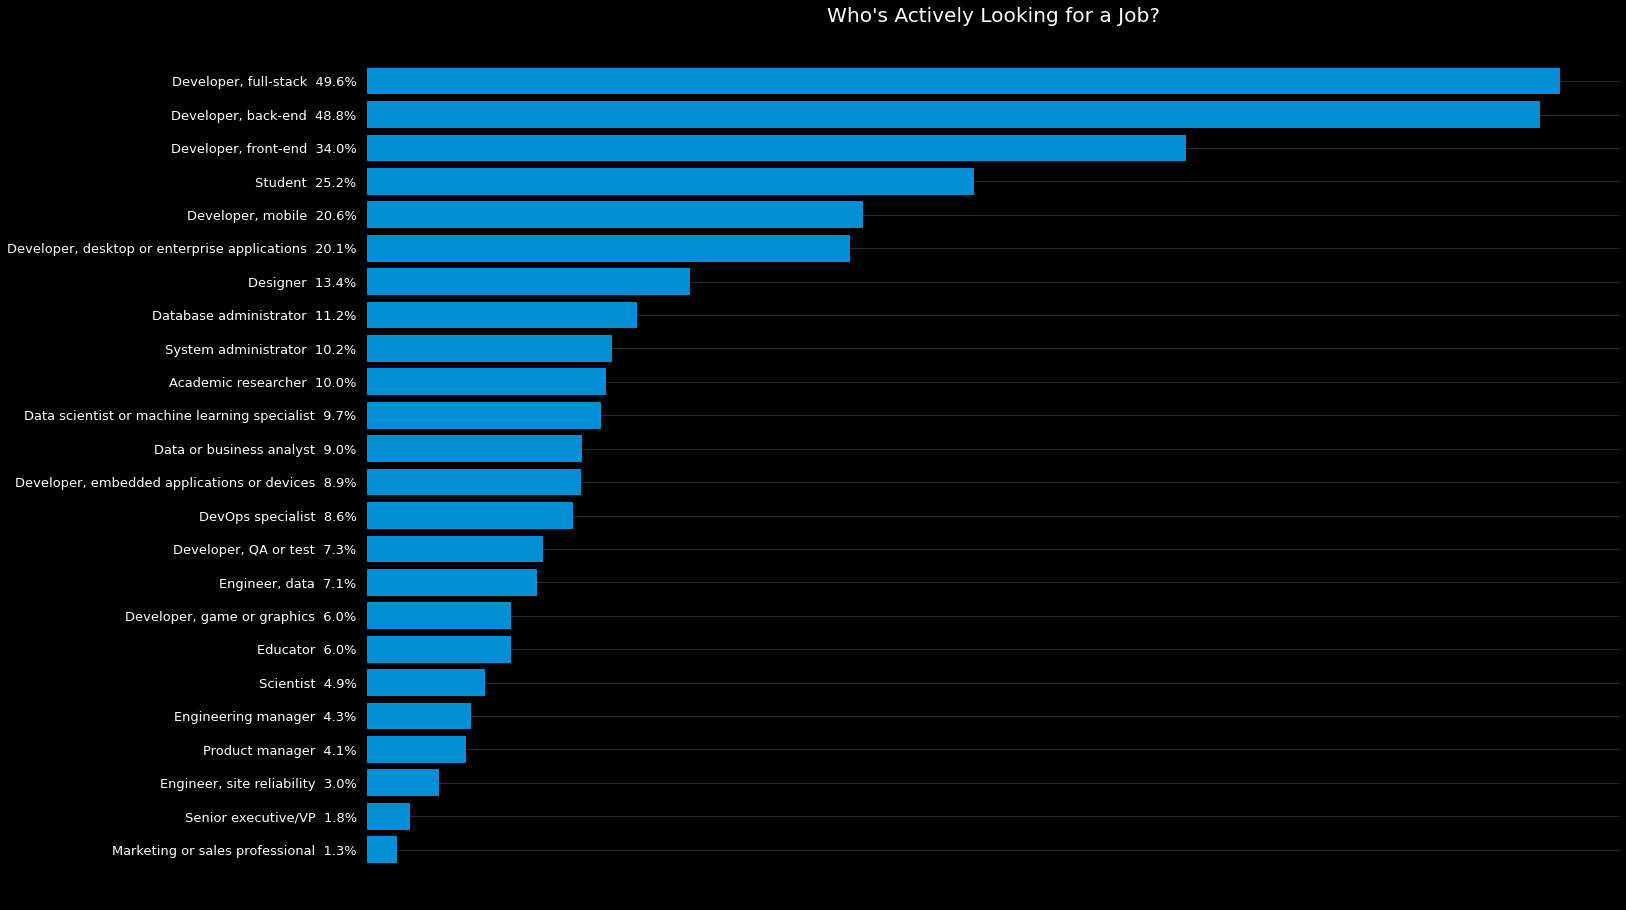

In [181]:
JobSeek = data["JobSeek"]
JobSeek.dropna(inplace=True)


new_JobSeek = data[(JobSeek == 'I am actively looking for a job')  &  ( data["DevType"] != "NaN" ) ]

new_DevType = new_JobSeek ["DevType"]

new_DevType.dropna(inplace=True)

new_DevType = new_DevType.str.split(";")


Double_list_sort_count(new_DevType , False)

Build_Barh_sizes( key_Phrases , Quantity, new_DevType ,"fivethirtyeight", False , (20,15), "Who's Actively Looking for a Job?")  # Building a schedule

<h5 style="text-align:center; " > <b>How Long Ago Did Developers Last Change Jobs?

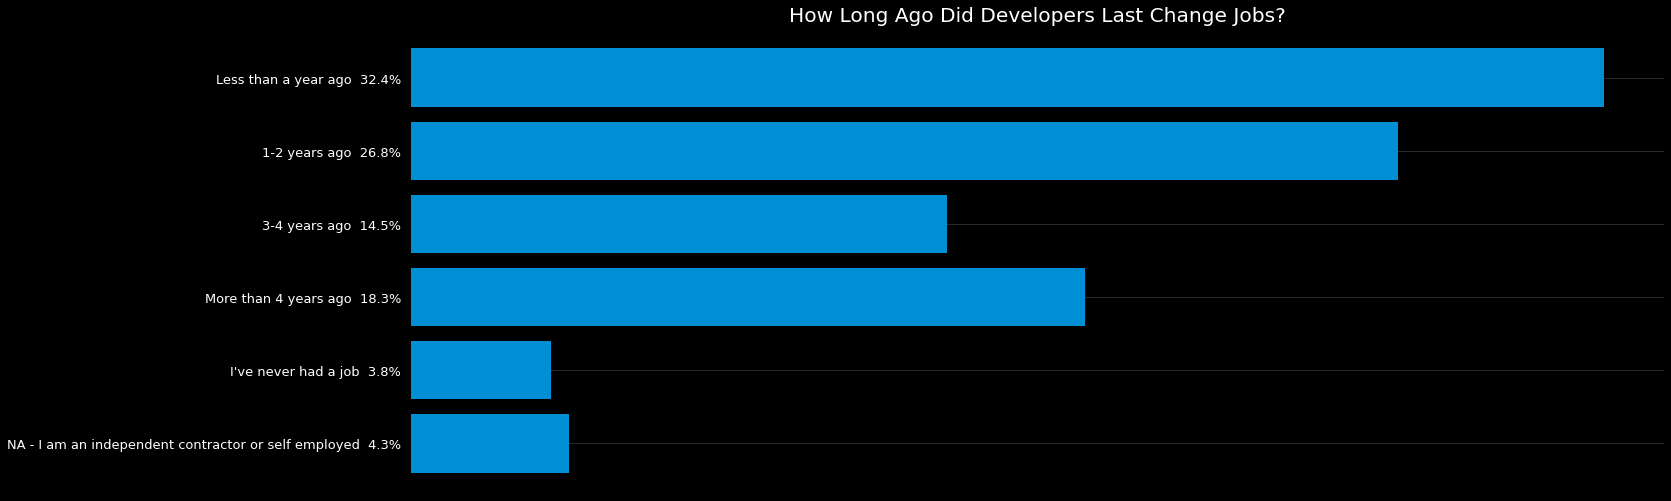

In [182]:
LastHireDate = data["LastHireDate"]
LastHireDate.dropna(inplace=True)

LastHireDate_Counted = Counter(LastHireDate)

key_Phrases = key_Phrases = ["Less than a year ago",'1-2 years ago','3-4 years ago',"More than 4 years ago" , "I've never had a job" , 'NA - I am an independent contractor or self employed']
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(LastHireDate_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, LastHireDate ,"fivethirtyeight", False , (20,8), "How Long Ago Did Developers Last Change Jobs?")  # Building a schedule


<h5 style="text-align:center; " > <b>Interview Practices

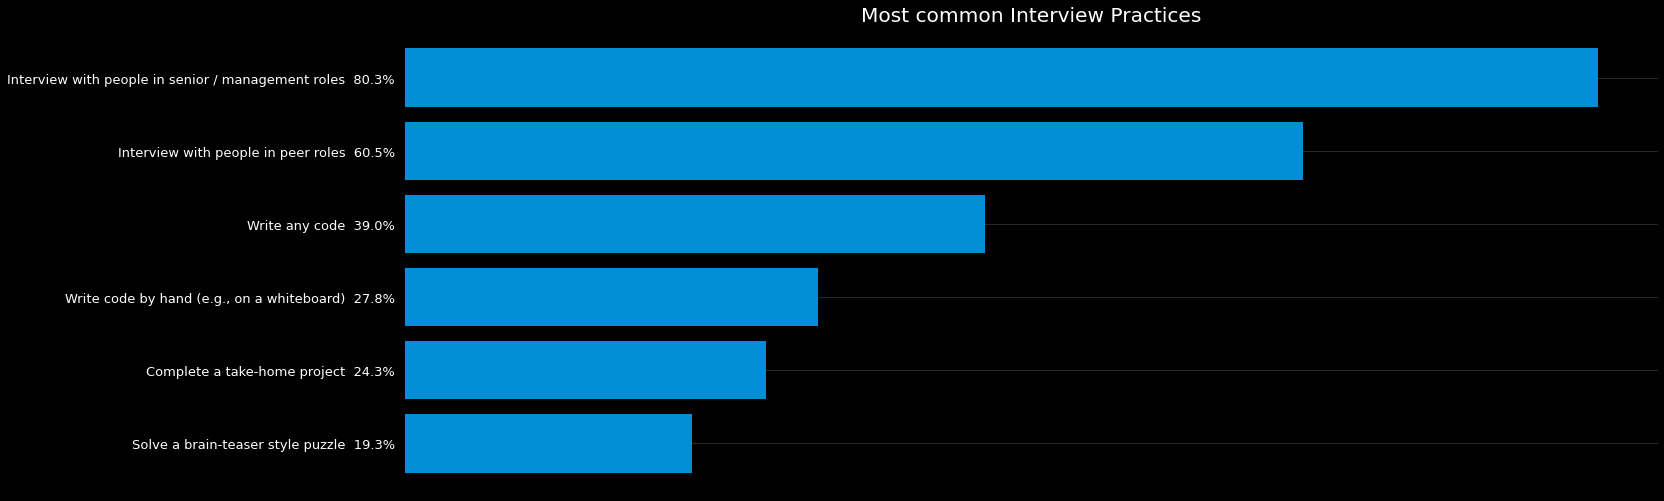

In [183]:
LastInt = data["LastInt"]
LastInt.dropna(inplace=True)
LastInt = LastInt.str.split(";")

Double_list_sort_count(LastInt , False)

Build_Barh_sizes( key_Phrases , Quantity, LastInt ,"fivethirtyeight", False , (20,8), "Most common Interview Practices")  # Building a schedule


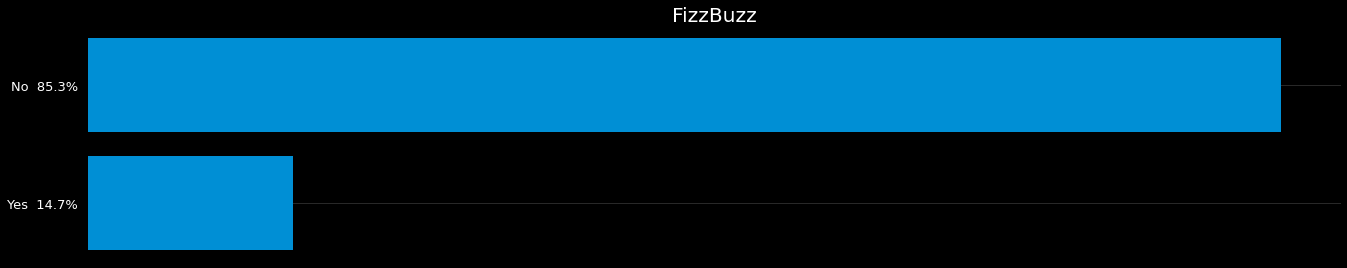

In [184]:
FizzBuzz = data["FizzBuzz"]
FizzBuzz.dropna(inplace=True)


Dictionary_Distributor(FizzBuzz , False)

Build_Barh_sizes( key_Phrases , Quantity, FizzBuzz ,"fivethirtyeight", False , (20,4), "FizzBuzz")  # Building a schedule


<h5 style="text-align:center; " > <b>Updating That Resume

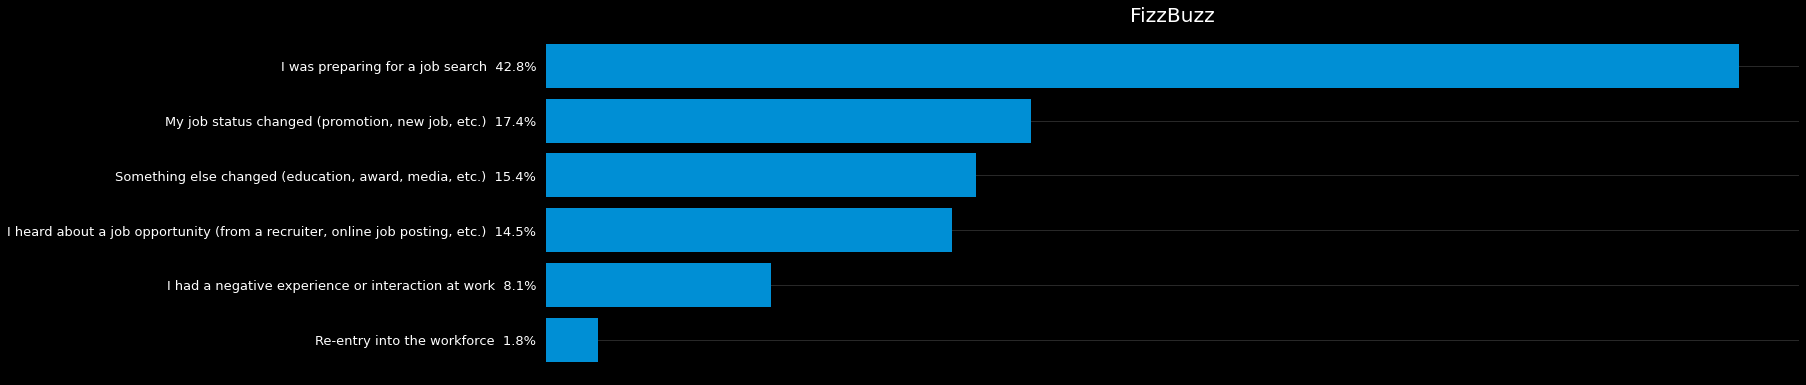

In [185]:
ResumeUpdate = data["ResumeUpdate"]
ResumeUpdate.dropna(inplace=True)

Dictionary_Distributor(ResumeUpdate , False)

Build_Barh_sizes( key_Phrases , Quantity, ResumeUpdate ,"fivethirtyeight", False , (20,6), "FizzBuzz")  # Building a schedule

####     Job Priorities

<h5 style="text-align:center; " > <b>Most Important Job Factors

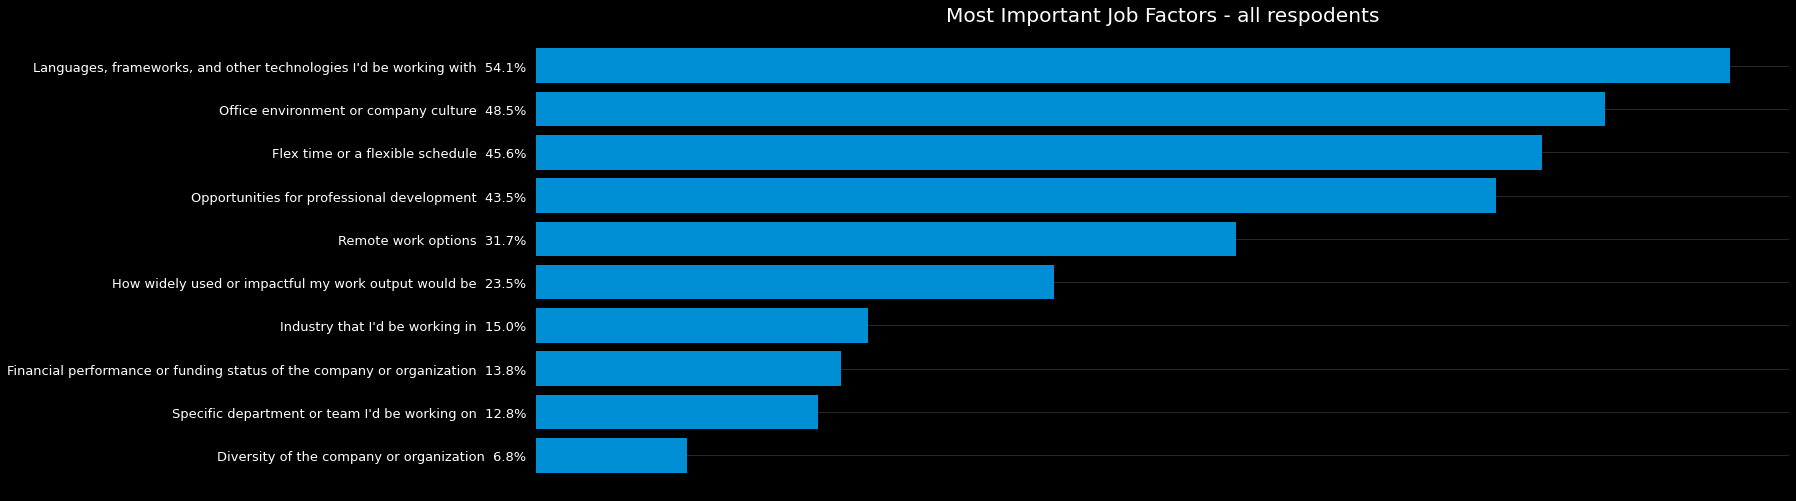

In [186]:
JobFactors = data["JobFactors"]
JobFactors.dropna(inplace=True)
JobFactors = JobFactors.str.split(";")

Double_list_sort_count(JobFactors , False)

Build_Barh_sizes( key_Phrases , Quantity, JobFactors ,"fivethirtyeight", False , (20,8), "Most Important Job Factors - all respodents")  # Building a schedule

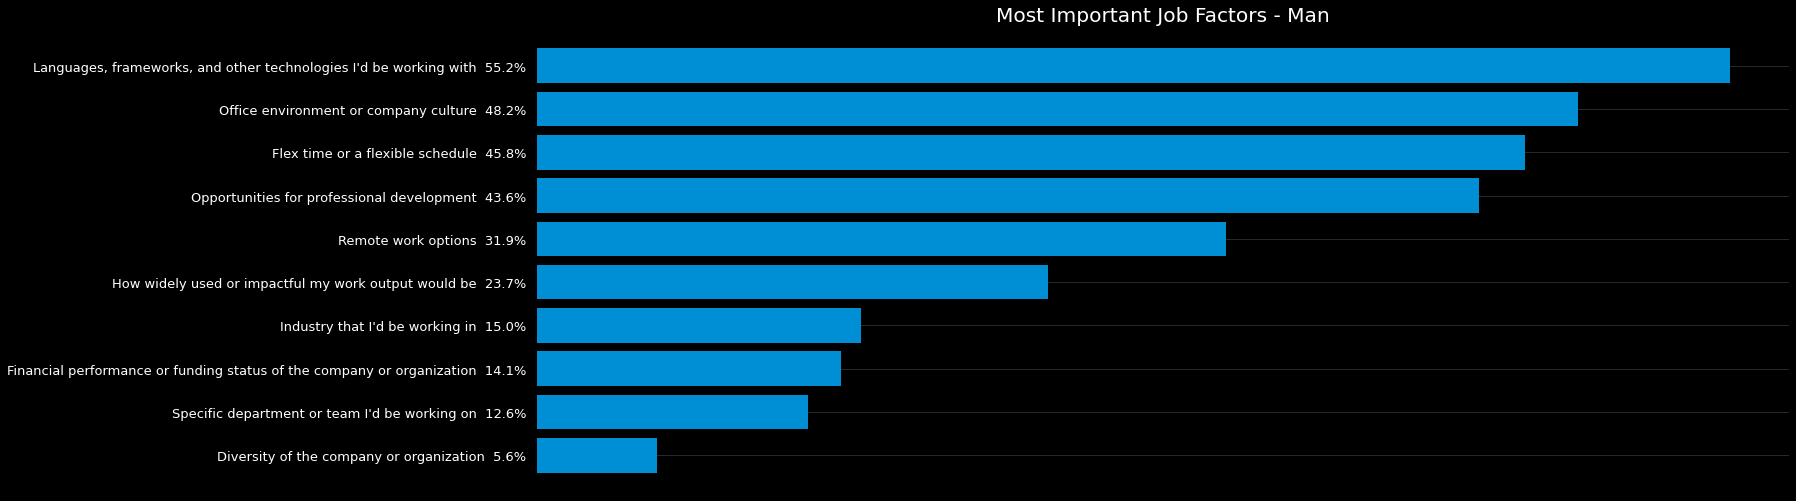

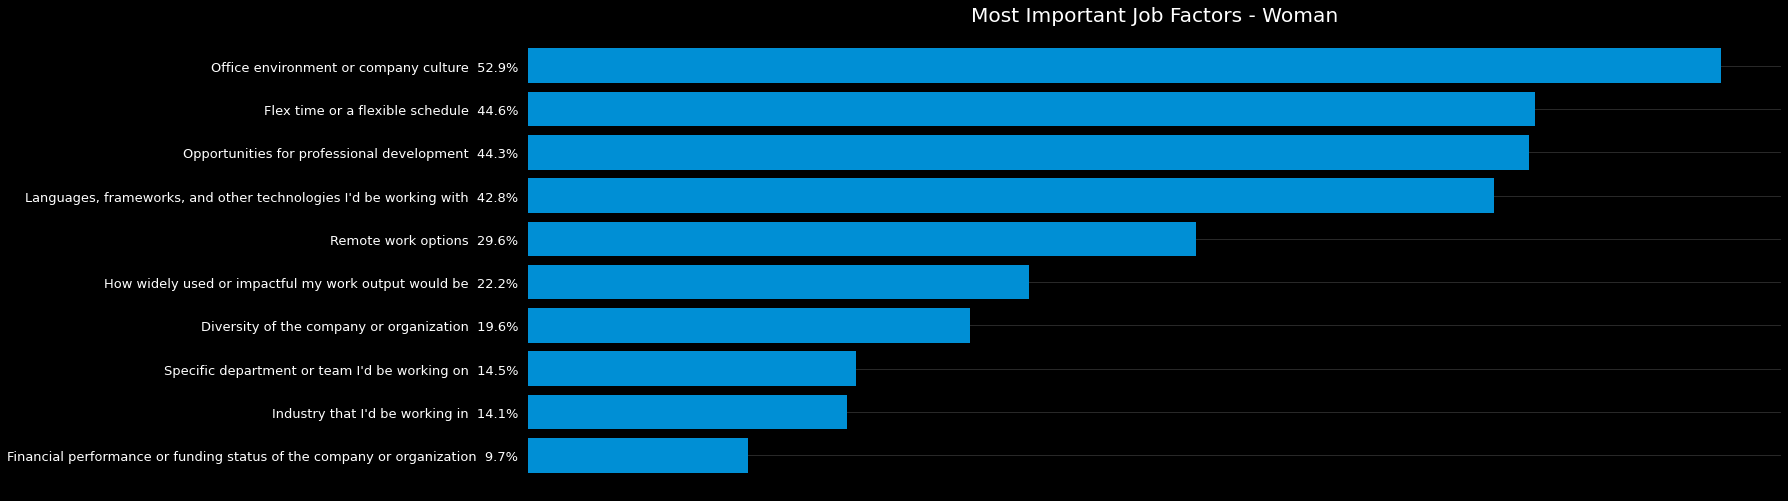

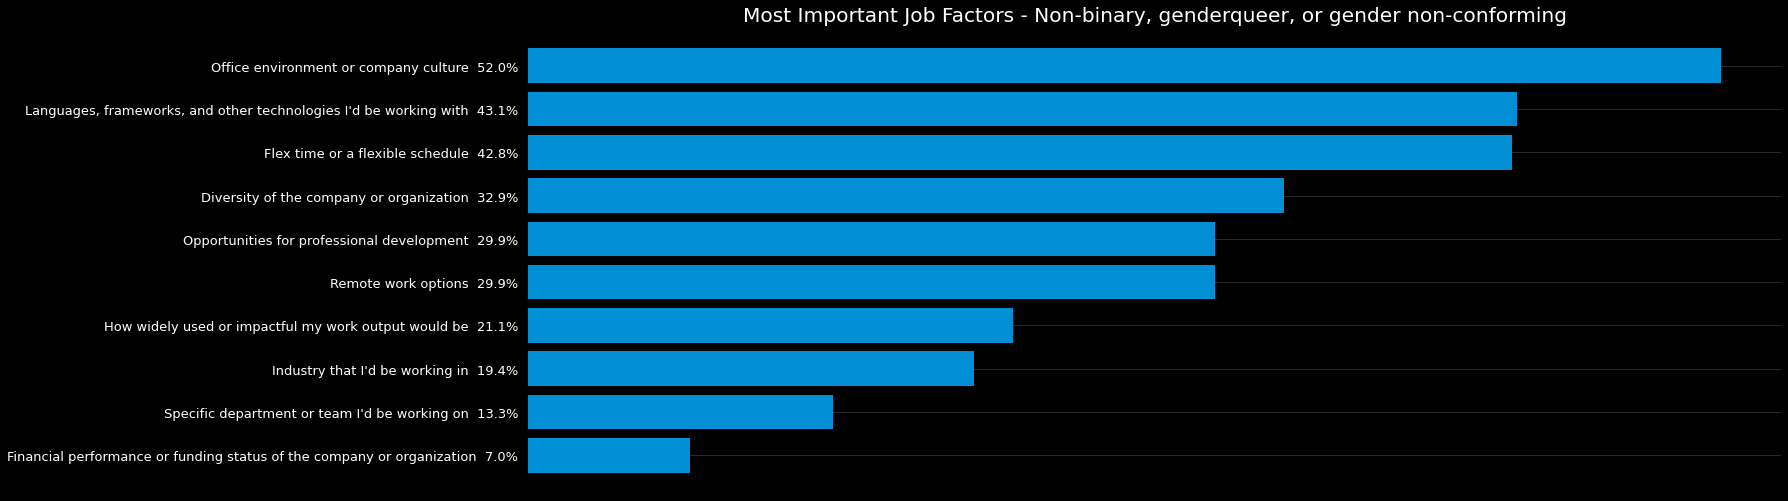

In [187]:
JobFactors = data["JobFactors"]
JobFactors.dropna(inplace=True)

Man = ["Man" , "Man;Non-binary, genderqueer, or gender non-conforming" ,"Woman;Man;Non-binary, genderqueer, or gender non-conforming", "Woman;Man"  ]
Non_binary = ['Non-binary, genderqueer, or gender non-conforming','Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Woman;Non-binary, genderqueer, or gender non-conforming', 'Man;Non-binary, genderqueer, or gender non-conforming' ]
Woman = ['Woman','Woman;Non-binary, genderqueer, or gender non-conforming','Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Woman;Man'  ]

Gender = [Man, Woman, Non_binary]

for i in Gender:
    new_list = []

    for k in i:
        new_data = data[ (JobFactors != "NaN") & ( data["Gender"] == k)]

        new_JobFactors = new_data["JobFactors"]
        new_JobFactors = new_JobFactors.str.split(";")

        for s in new_JobFactors:
            new_list.append(s)
    

    

    Double_list_sort_count(new_list , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_list ,"fivethirtyeight", False , (20,8), "Most Important Job Factors - " + i[0])  # Building a schedule


<h5 style="text-align:center; " > <b>Weighting Important Job Factors in the US

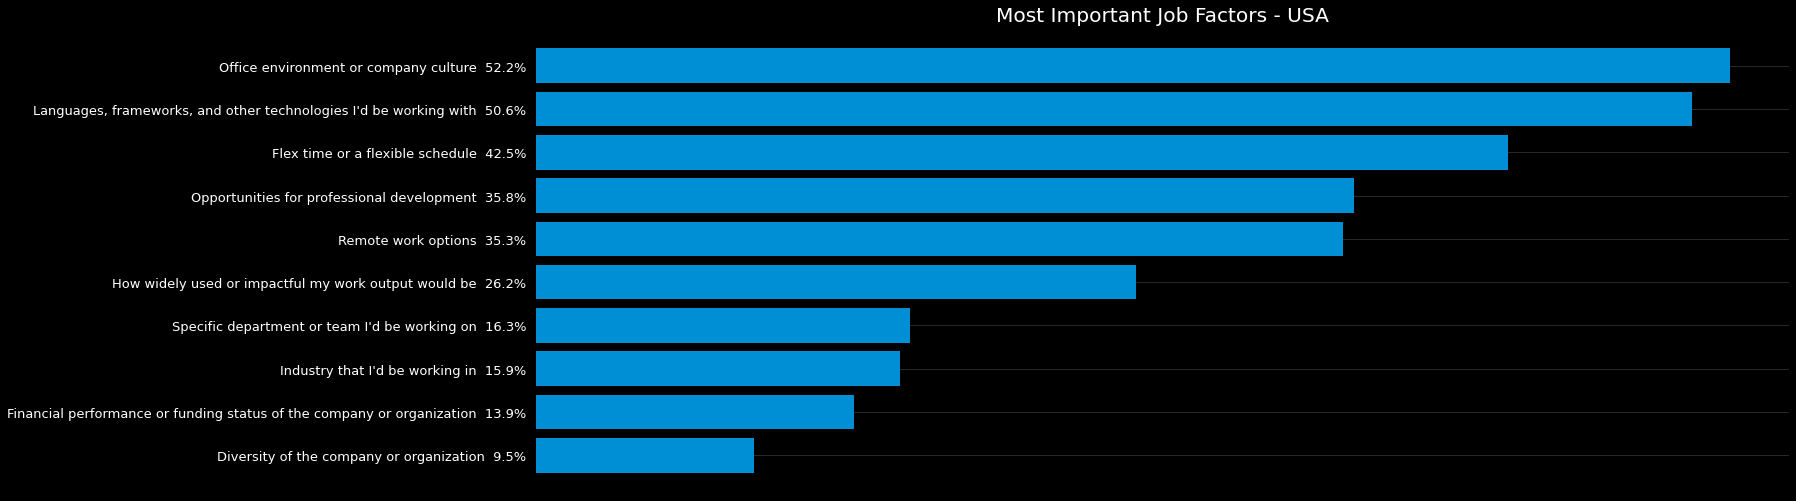

In [188]:
JobFactors = data["JobFactors"]
JobFactors.dropna(inplace=True)


new_data = data[ (JobFactors != "NaN") & (data["Country"] == "United States")]

new_JobFactors = new_data["JobFactors"]
new_JobFactors = new_JobFactors.str.split(";")

Double_list_sort_count(new_JobFactors , False)

Build_Barh_sizes( key_Phrases , Quantity, new_JobFactors ,"fivethirtyeight", False , (20,8), "Most Important Job Factors - USA")  # Building a schedule

<h5 style="text-align:center; " > <b>How Often Do Developers Work Remotely?

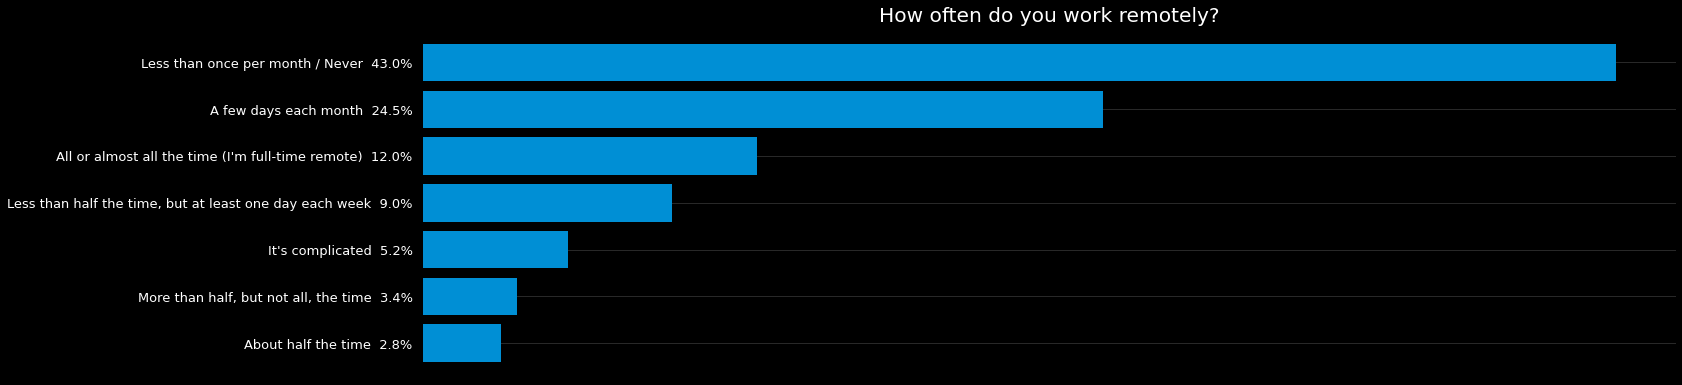

In [189]:
WorkRemote = data["WorkRemote"]
WorkRemote.dropna(inplace=True)

Dictionary_Distributor(WorkRemote , False)

Build_Barh_sizes( key_Phrases , Quantity, WorkRemote ,"fivethirtyeight", False , (20,6), "How often do you work remotely?")  # Building a schedule

<h5 style="text-align:center; " > <b>Where Do Developers Want to Work?

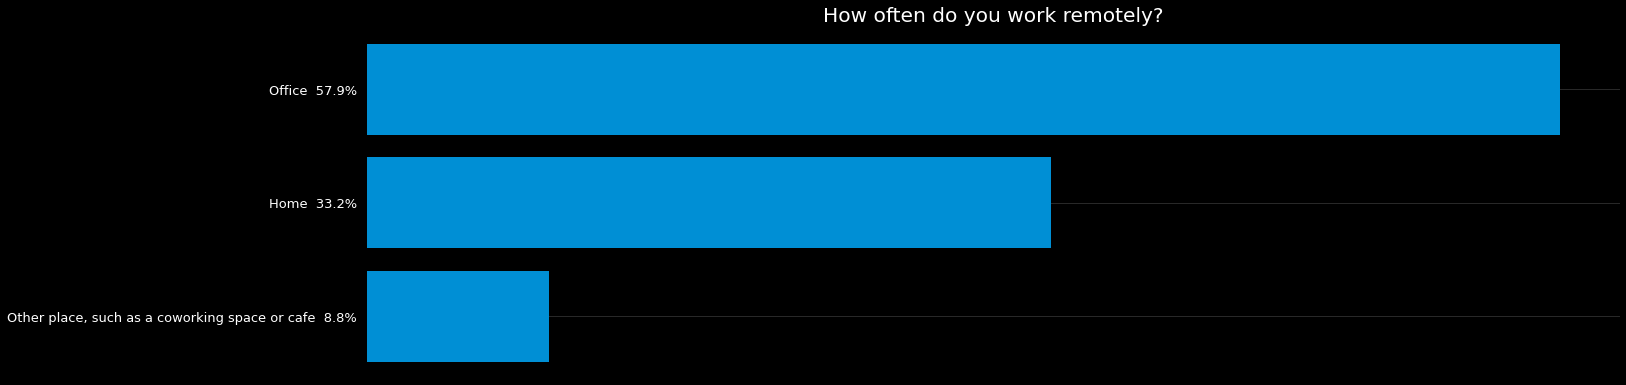

In [190]:
WorkLoc = data["WorkLoc"]
WorkLoc.dropna(inplace=True)

Dictionary_Distributor(WorkLoc , False)

Build_Barh_sizes( key_Phrases , Quantity, WorkLoc ,"fivethirtyeight", False , (20,6), "How often do you work remotely?")  # Building a schedule

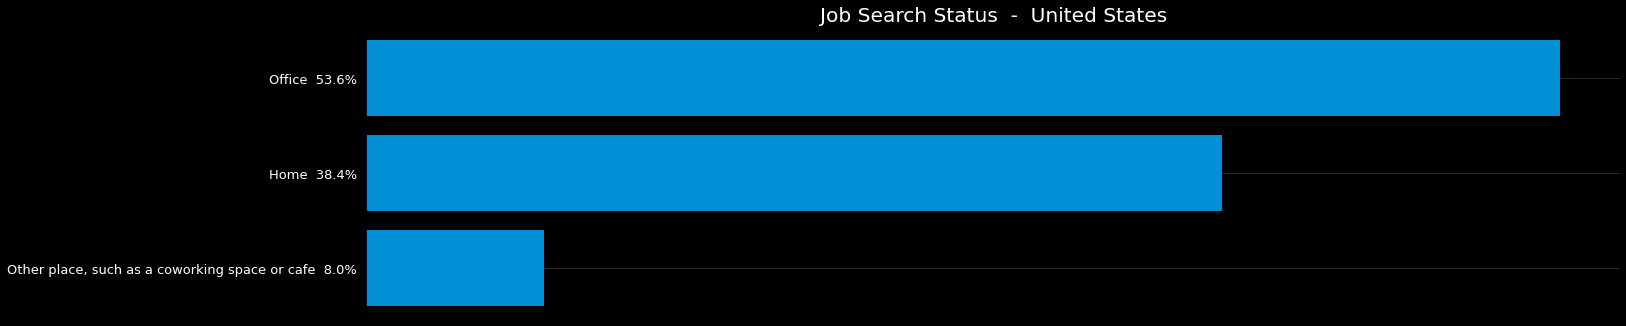

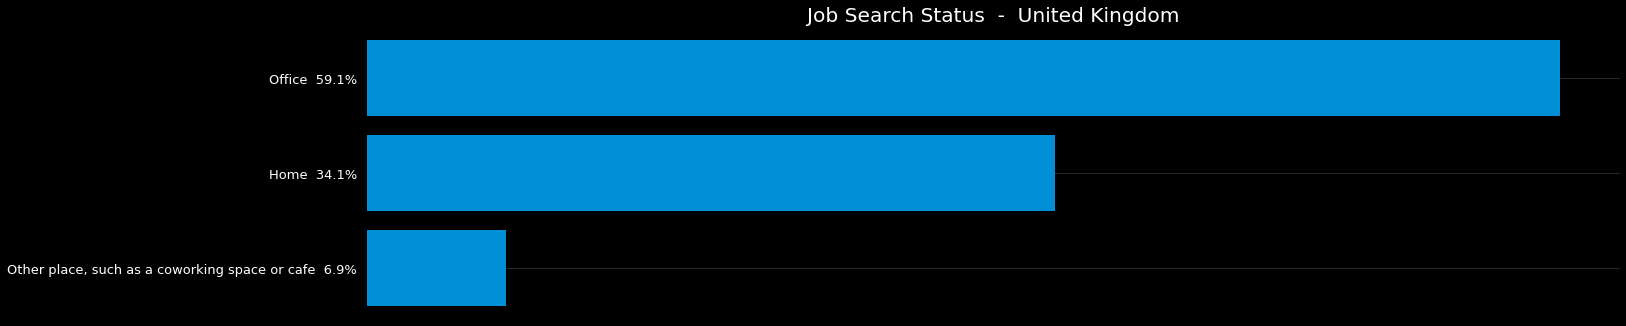

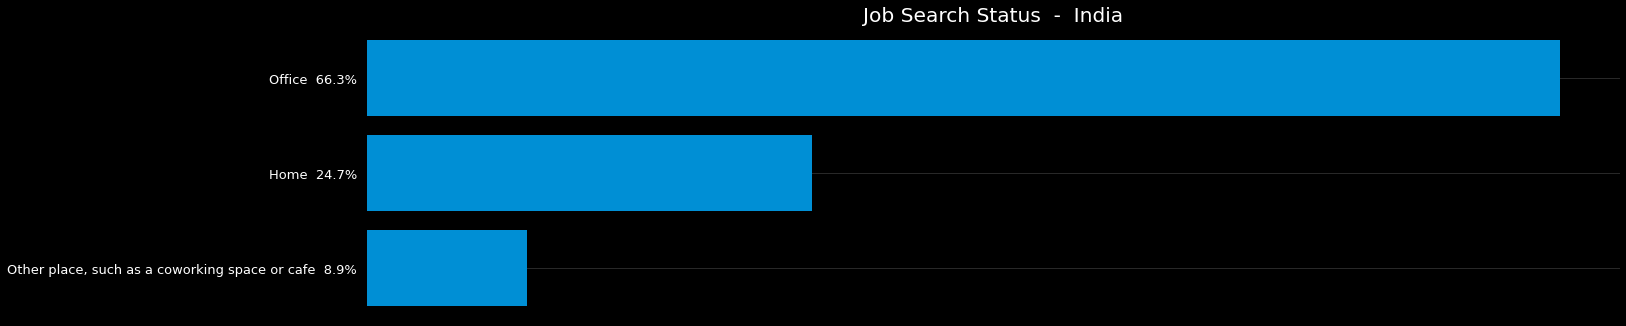

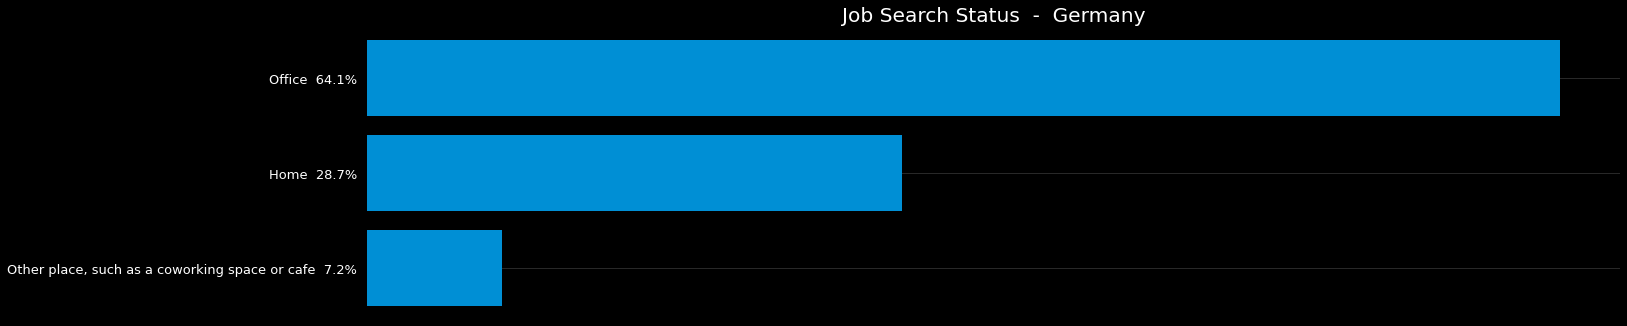

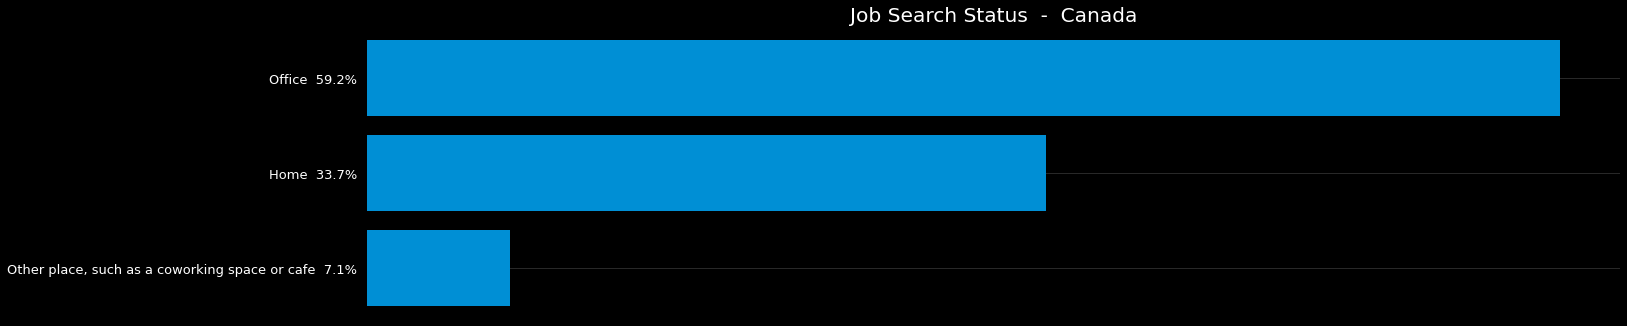

In [191]:
WorkLoc = data["WorkLoc"]
WorkLoc.dropna(inplace=True)

Countries = ["United States", "United Kingdom","India", "Germany","Canada"]

for i in Countries:

    new_WorkLoc = data[ (WorkLoc != "NaN")   &  ( data["Country"] == i ) ]

    new_WorkLoc = new_WorkLoc ["WorkLoc"]


    Dictionary_Distributor(new_WorkLoc , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_WorkLoc ,"fivethirtyeight", False , (20,5), "Job Search Status  -  " + i)  # Building a schedule



####     Development Practices

<h5 style="text-align:center; " > <b>How Structured Is the Work of Developers?

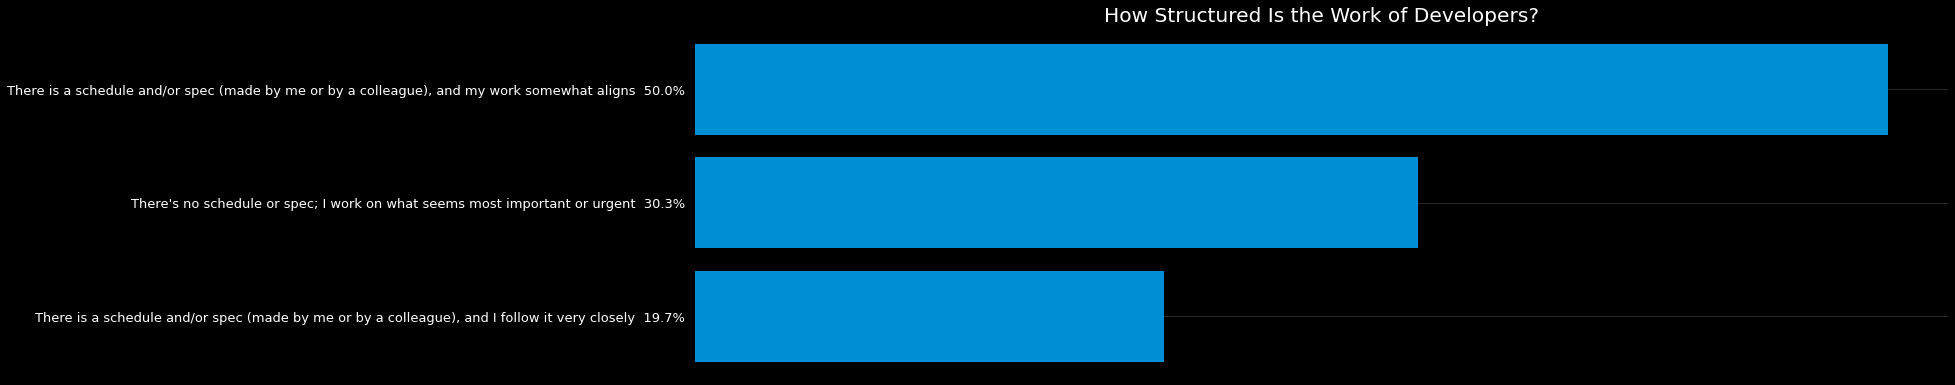

In [192]:
WorkPlan = data["WorkPlan"]
WorkPlan.dropna(inplace=True)

Dictionary_Distributor(WorkPlan , False)

Build_Barh_sizes( key_Phrases , Quantity, WorkPlan ,"fivethirtyeight", False , (20,6), "How Structured Is the Work of Developers?")  # Building a schedule

<h5 style="text-align:center; " > <b>Greatest Challenges to Productivity

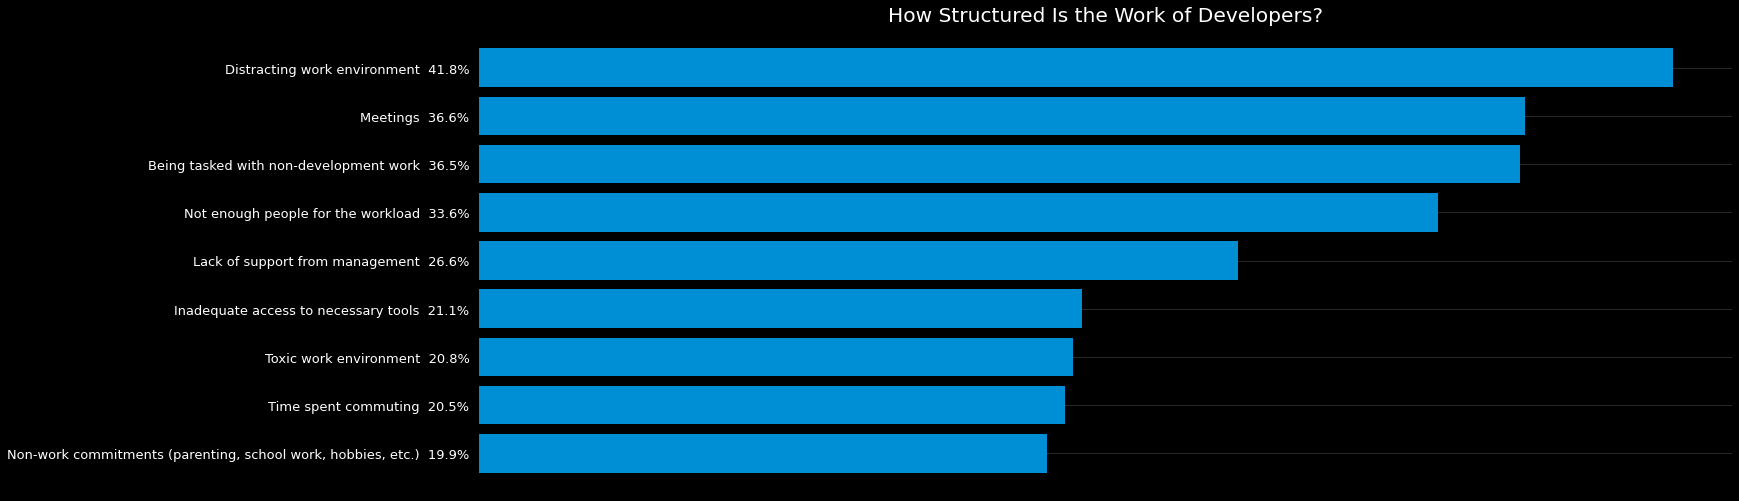

In [193]:
WorkChallenge = data["WorkChallenge"]
WorkChallenge.dropna(inplace=True)
WorkChallenge = WorkChallenge.str.split(";")


Double_list_sort_count(WorkChallenge , False)

Build_Barh_sizes( key_Phrases , Quantity, WorkChallenge ,"fivethirtyeight", False , (20,8), "How Structured Is the Work of Developers?")  # Building a schedule

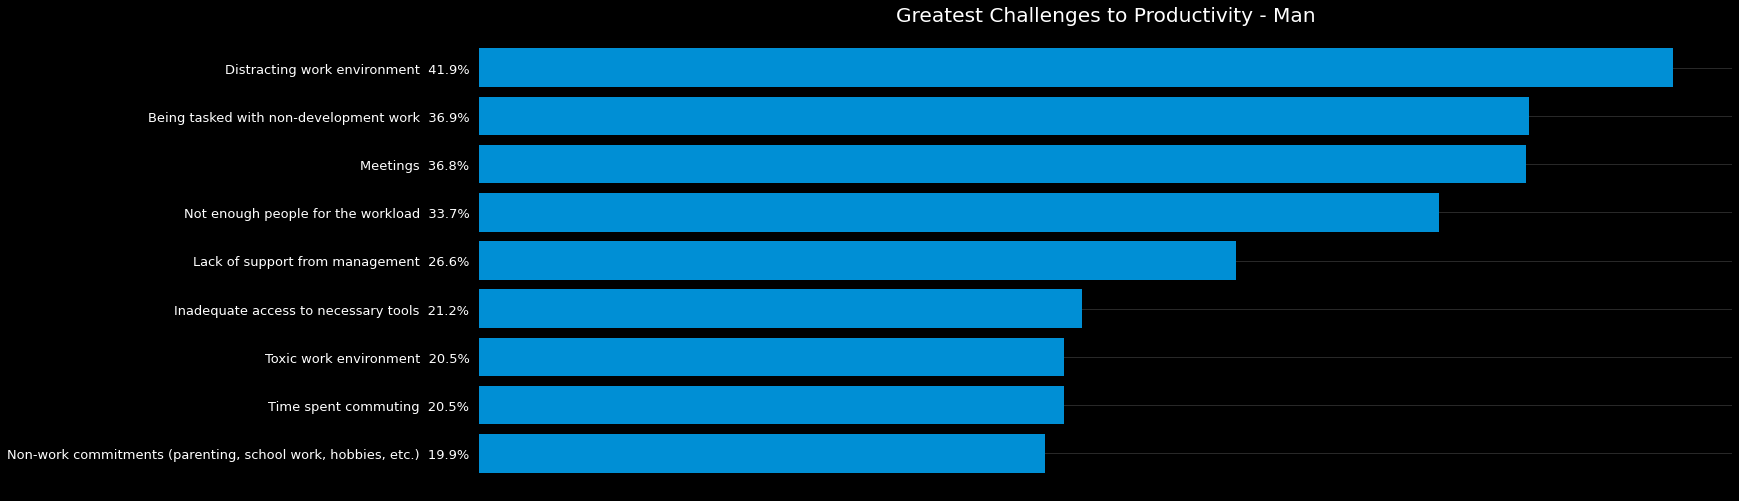

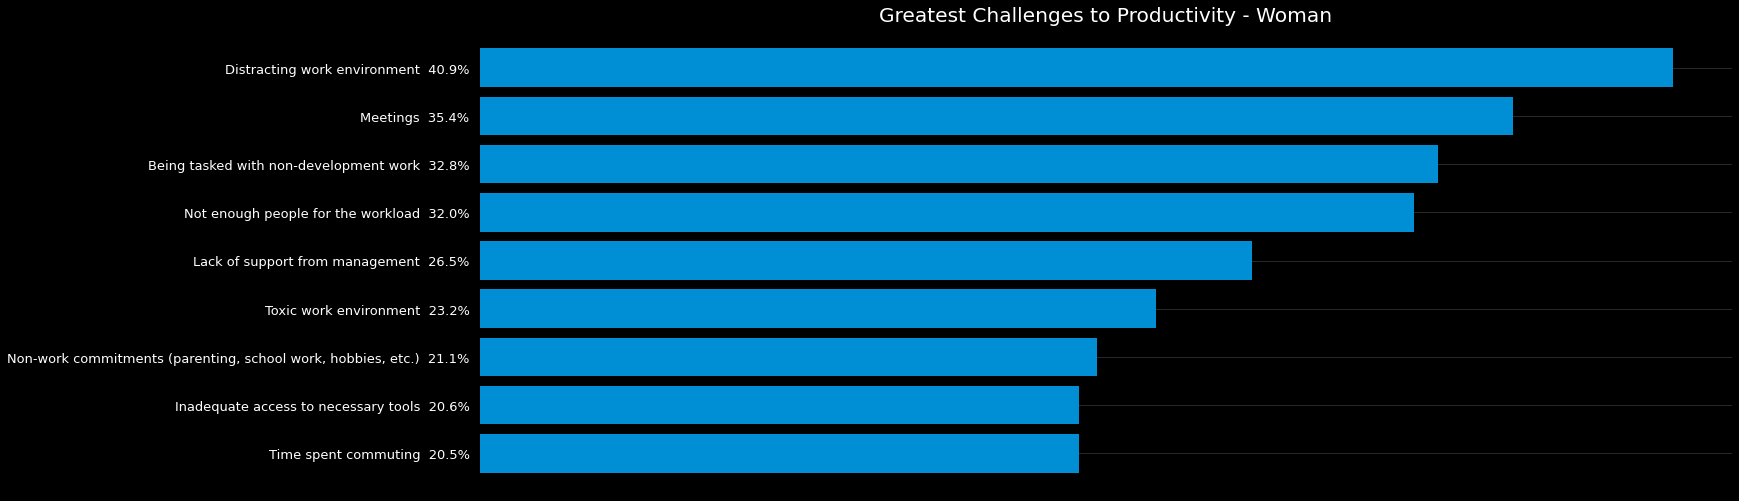

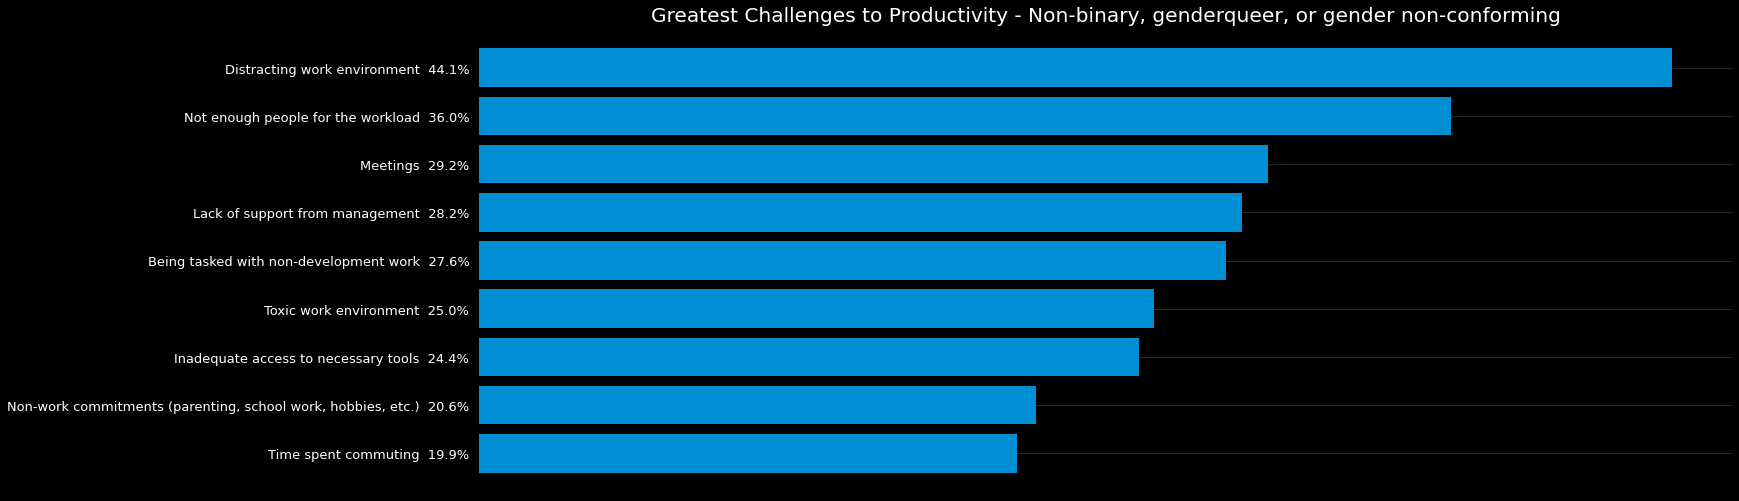

In [194]:
WorkChallenge = data["WorkChallenge"]
WorkChallenge.dropna(inplace=True)

Man = ["Man" , "Man;Non-binary, genderqueer, or gender non-conforming" ,"Woman;Man;Non-binary, genderqueer, or gender non-conforming", "Woman;Man"  ]
Non_binary = ['Non-binary, genderqueer, or gender non-conforming','Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Woman;Non-binary, genderqueer, or gender non-conforming', 'Man;Non-binary, genderqueer, or gender non-conforming' ]
Woman = ['Woman','Woman;Non-binary, genderqueer, or gender non-conforming','Woman;Man;Non-binary, genderqueer, or gender non-conforming', 'Woman;Man'  ]

Gender = [Man, Woman, Non_binary]

for i in Gender:
    new_list = []

    for k in i:
        new_data = data[ (WorkChallenge != "NaN") & ( data["Gender"] == k)]

        new_WorkChallenge = new_data["WorkChallenge"]
        new_WorkChallenge = new_WorkChallenge.str.split(";")

        for s in new_WorkChallenge:
            new_list.append(s)
    

    

    Double_list_sort_count(new_list , False)

    Build_Barh_sizes( key_Phrases , Quantity, new_list ,"fivethirtyeight", False , (20,8), "Greatest Challenges to Productivity - " + i[0])  # Building a schedule


<h5 style="text-align:center; " > <b>Weighting Productivity Challenges in the US

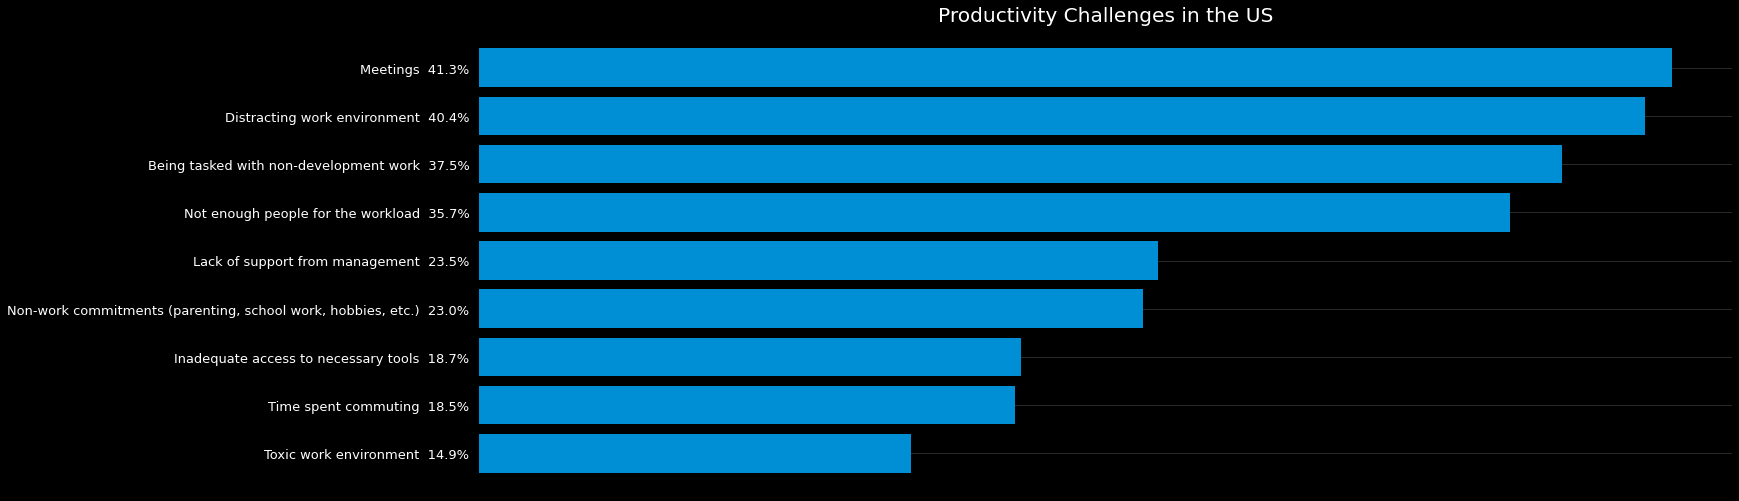

In [195]:
WorkChallenge = data["WorkChallenge"]
WorkChallenge.dropna(inplace=True)


new_data = data[ (WorkChallenge != "NaN") & (data["Country"] == "United States")]

new_WorkChallenge = new_data["WorkChallenge"]
new_WorkChallenge = new_WorkChallenge.str.split(";")

Double_list_sort_count(new_WorkChallenge , False)

Build_Barh_sizes( key_Phrases , Quantity, new_WorkChallenge ,"fivethirtyeight", False , (20,8), "Productivity Challenges in the US")  # Building a schedule

<h5 style="text-align:center; " > <b>Quality of Open Source Software

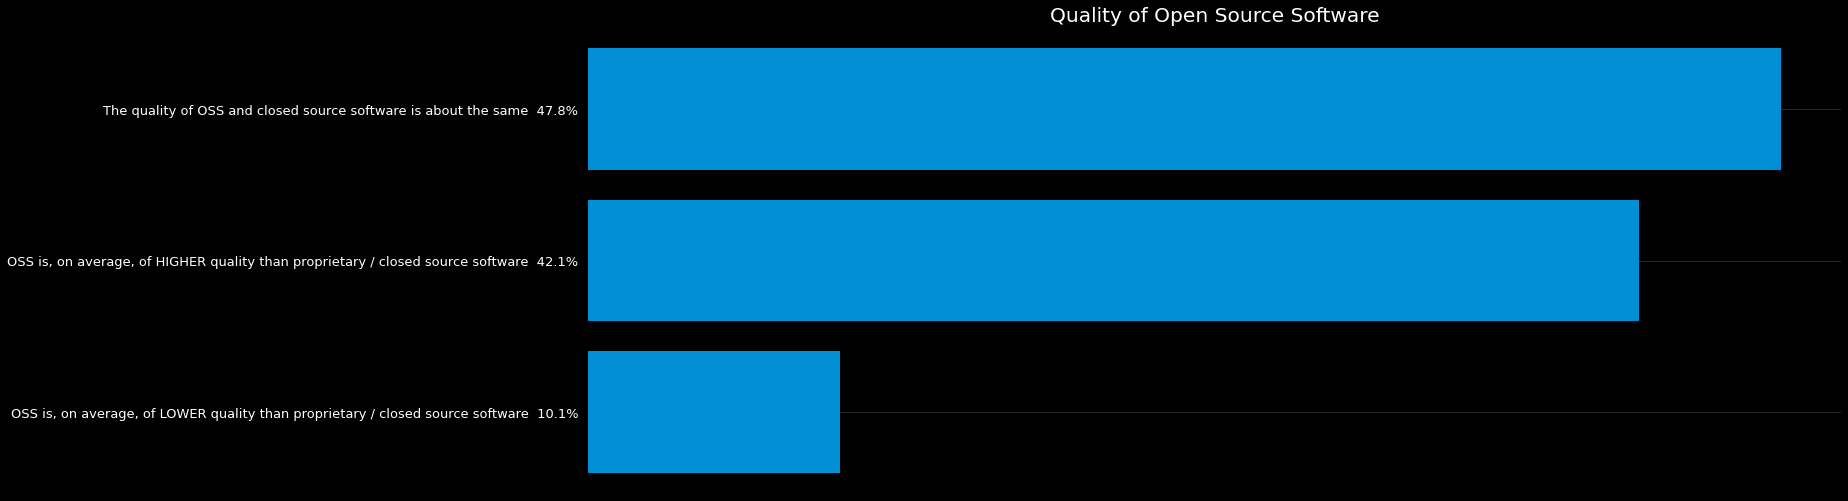

In [196]:
OpenSource = data["OpenSource"]
OpenSource.dropna(inplace=True)


Dictionary_Distributor(OpenSource , False)
Build_Barh_sizes( key_Phrases , Quantity, OpenSource ,"fivethirtyeight", False , (20,8), "Quality of Open Source Software")  # Building a schedule


<h5 style="text-align:center; " > <b>Code Review

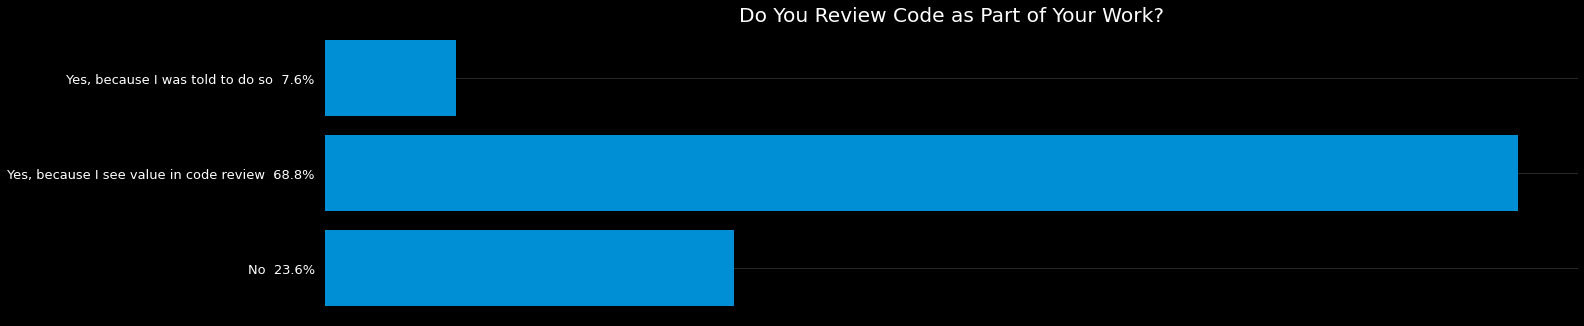

In [197]:
CodeRev = data["CodeRev"]
CodeRev.dropna(inplace=True)

CodeRev_Counted = Counter(CodeRev)

key_Phrases = key_Phrases = ['Yes, because I was told to do so' , 'Yes, because I see value in code review', 'No']
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(CodeRev_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, CodeRev ,"fivethirtyeight", False , (20,5), "Do You Review Code as Part of Your Work?")  # Building a schedule



<h5 style="text-align:center; " > <b>Unit Tests

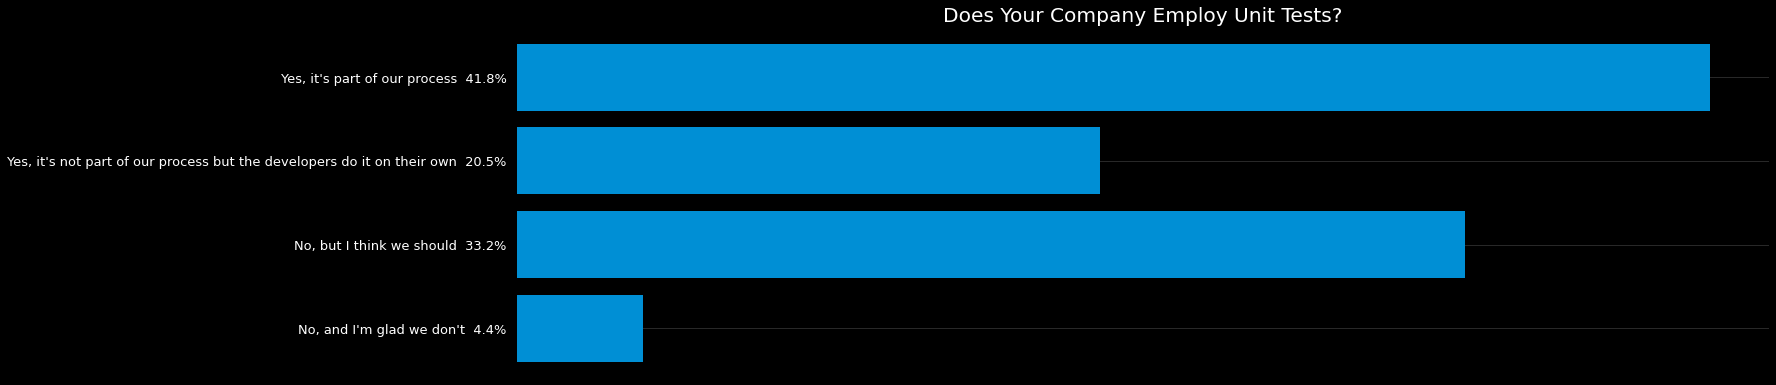

In [198]:
UnitTests = data["UnitTests"]
UnitTests.dropna(inplace=True)

UnitTests_Counted = Counter(UnitTests)

key_Phrases = key_Phrases = ["Yes, it's part of our process" , "Yes, it's not part of our process but the developers do it on their own" , "No, but I think we should" , "No, and I'm glad we don't"]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(UnitTests_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, UnitTests ,"fivethirtyeight", False , (20,6), "Does Your Company Employ Unit Tests?")  # Building a schedule



## Community

#### Site Use

<h5 style="text-align:center; " > <b>Visiting Stack Overflow

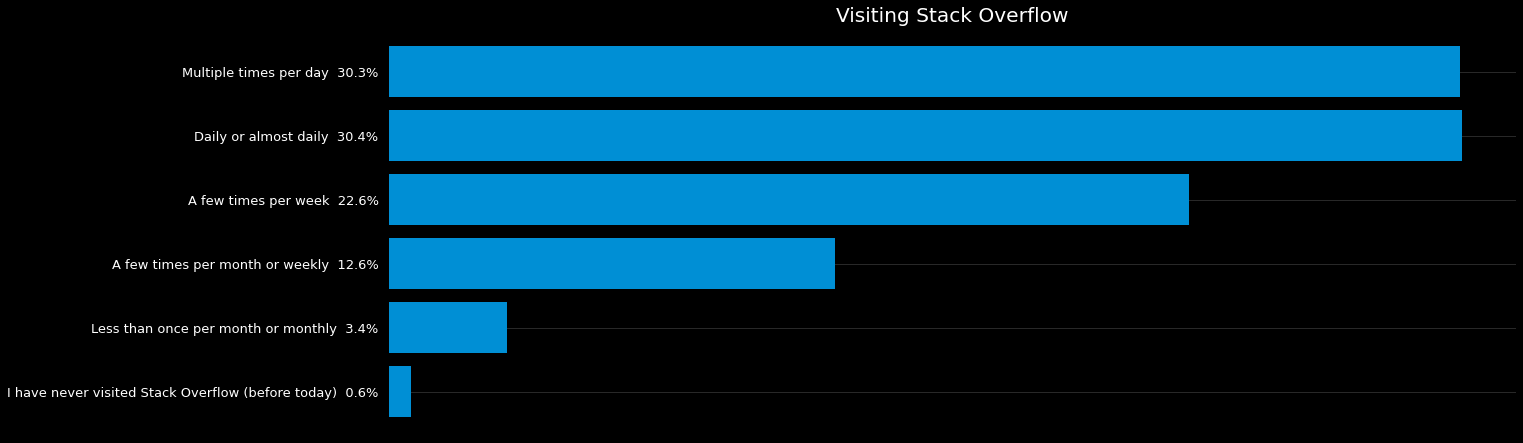

In [199]:
SOVisitFreq = data ["SOVisitFreq"]
SOVisitFreq.dropna(inplace=True)

SOVisitFreq_Counted = Counter(SOVisitFreq)

key_Phrases =  ['I have never visited Stack Overflow (before today)' , 'Less than once per month or monthly', 'A few times per month or weekly', "A few times per week", "Daily or almost daily", "Multiple times per day"]
Quantity = []

for i in key_Phrases:
    Quantity.append(SOVisitFreq_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOVisitFreq ,"fivethirtyeight", False , (18,7), "Visiting Stack Overflow")   # Building a schedule

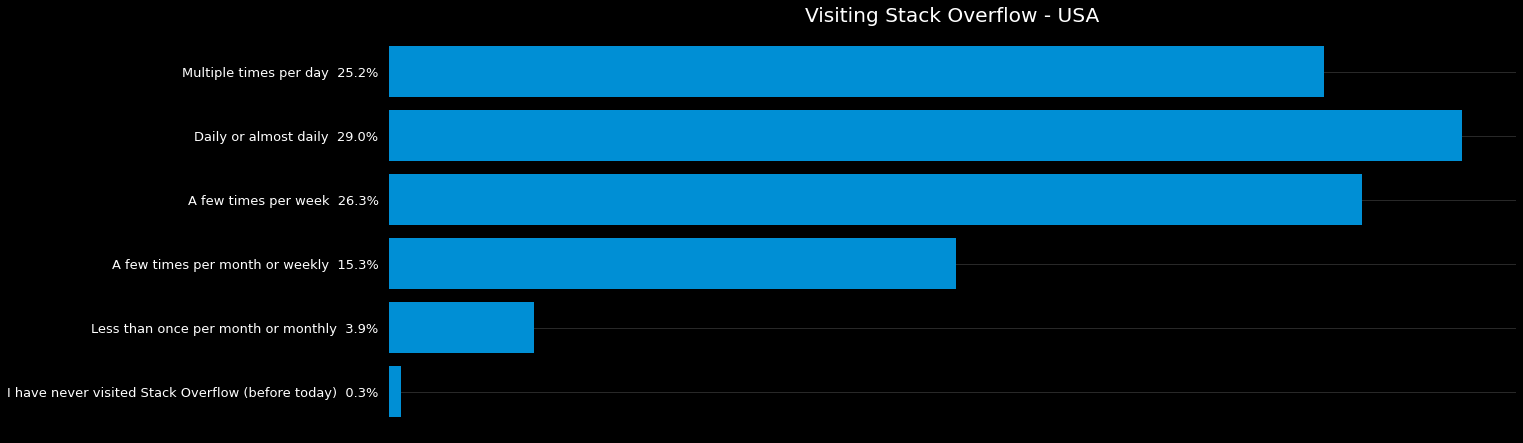

In [200]:
SOVisitFreq = data ["SOVisitFreq"]
SOVisitFreq.dropna(inplace=True)

new_SOVisitFreq = data[ (SOVisitFreq != 'nan') & (data["Country"] == "United States")]
SOVisitFreq = new_SOVisitFreq["SOVisitFreq"]

SOVisitFreq_Counted = Counter(SOVisitFreq)

key_Phrases =  ['I have never visited Stack Overflow (before today)' , 'Less than once per month or monthly', 'A few times per month or weekly', "A few times per week", "Daily or almost daily", "Multiple times per day"]
Quantity = []

for i in key_Phrases:
    Quantity.append(SOVisitFreq_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOVisitFreq ,"fivethirtyeight", False , (18,7), "Visiting Stack Overflow - USA")   # Building a schedule

<h5 style="text-align:center; " > <b>When Did You First Visit Stack Overflow?


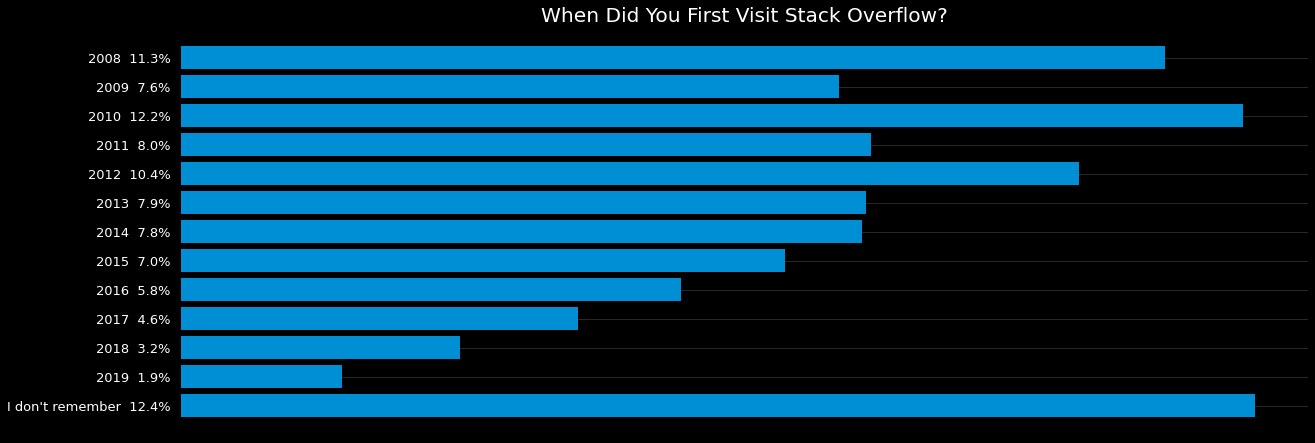

In [201]:
SOVisit1st = data['SOVisit1st']
SOVisit1st.dropna(inplace=True)

SOVisit1st_Counted = Counter(SOVisit1st)


key_Phrases =  ["I don't remember"]
Quantity = []


for i in range(2019,2007,-1):
    key_Phrases.append(str(i))



for i in key_Phrases:
    Quantity.append(SOVisit1st_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOVisit1st ,"fivethirtyeight", False , (18,7), "When Did You First Visit Stack Overflow?")   # Building a schedule

<h5 style="text-align:center; " > <b>How Many Participants Have a Stack Overflow Account?

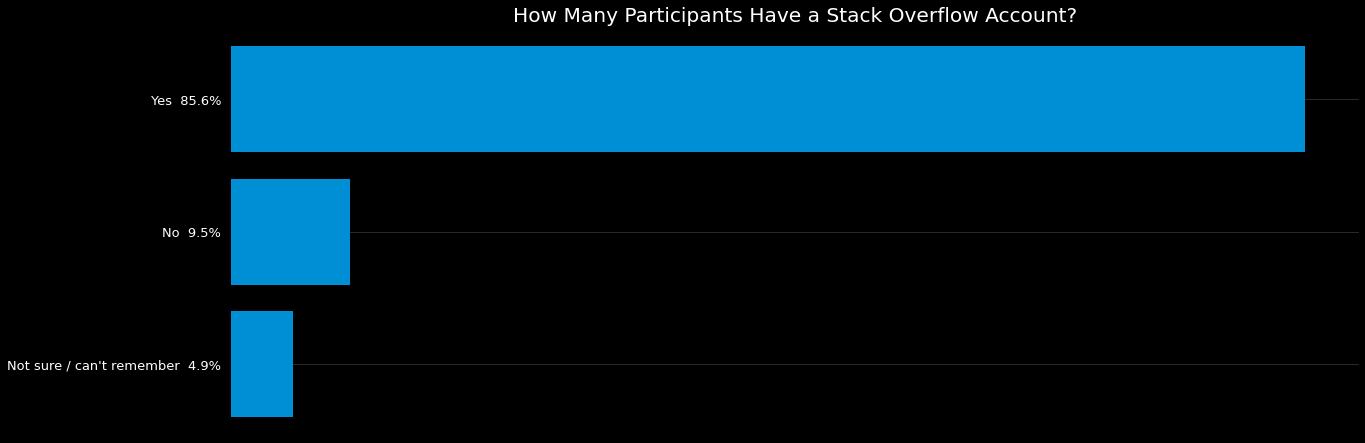

In [202]:
SOAccount = data['SOAccount']
SOAccount.dropna(inplace=True)

Dictionary_Distributor(SOAccount, False)

Build_Barh_sizes( key_Phrases , Quantity, SOAccount ,"fivethirtyeight", False , (18,7), "How Many Participants Have a Stack Overflow Account?")   # Building a schedule

<h5 style="text-align:center; " > <b>Why Do Developers Visit Stack Overflow?

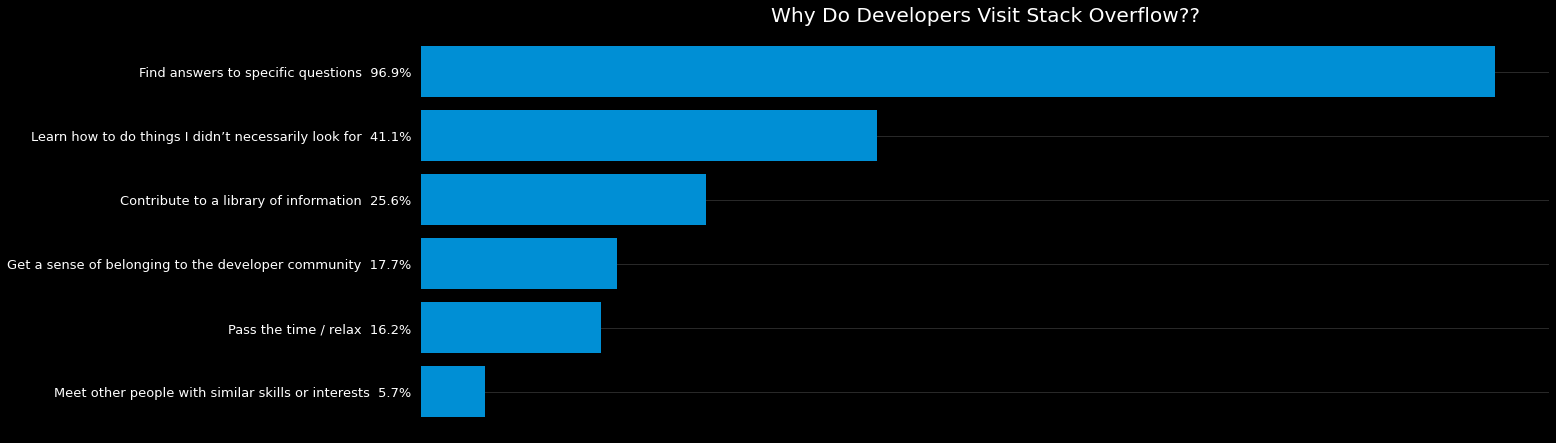

In [203]:
SOVisitTo = data['SOVisitTo']
SOVisitTo.dropna(inplace=True)
SOVisitTo = SOVisitTo.str.split(";")

Double_list_sort_count(SOVisitTo, False)

Build_Barh_sizes( key_Phrases , Quantity, SOVisitTo ,"fivethirtyeight", False , (18,7), "Why Do Developers Visit Stack Overflow??")   # Building a schedule

<h5 style="text-align:center; " > <b>Finding Answers on Stack Overflow

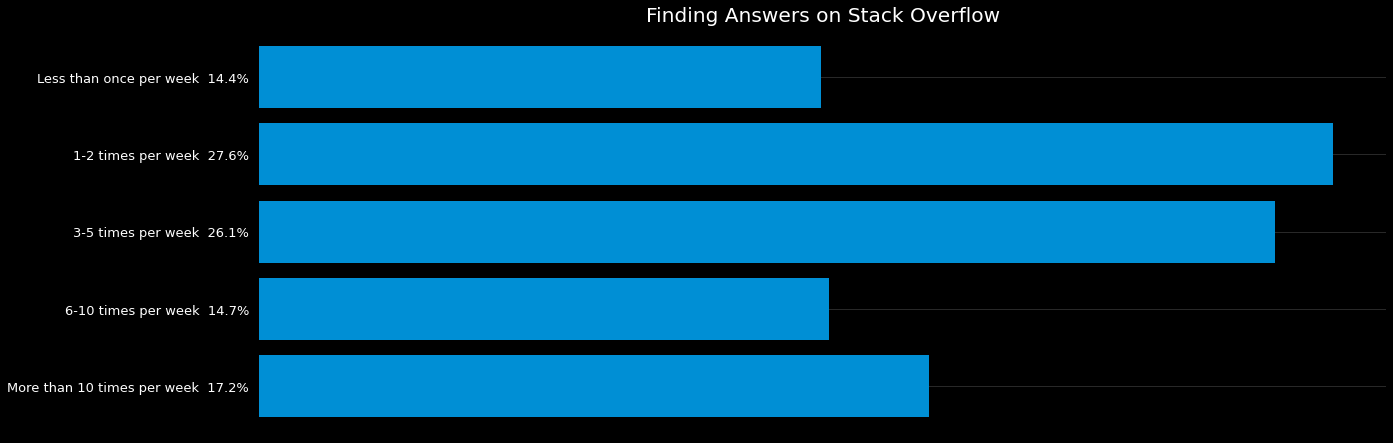

In [204]:
SOFindAnswer = data['SOFindAnswer']
SOFindAnswer.dropna(inplace=True)


SOFindAnswer_Counted = Counter(SOFindAnswer)

key_Phrases =  ['Less than once per week','1-2 times per week', '3-5 times per week','6-10 times per week',  'More than 10 times per week' ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(SOFindAnswer_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOFindAnswer ,"fivethirtyeight", False , (18,7), "Finding Answers on Stack Overflow")   # Building a schedule

<h5 style="text-align:center; " > <b>Comparing Stack Overflow to Other Resources

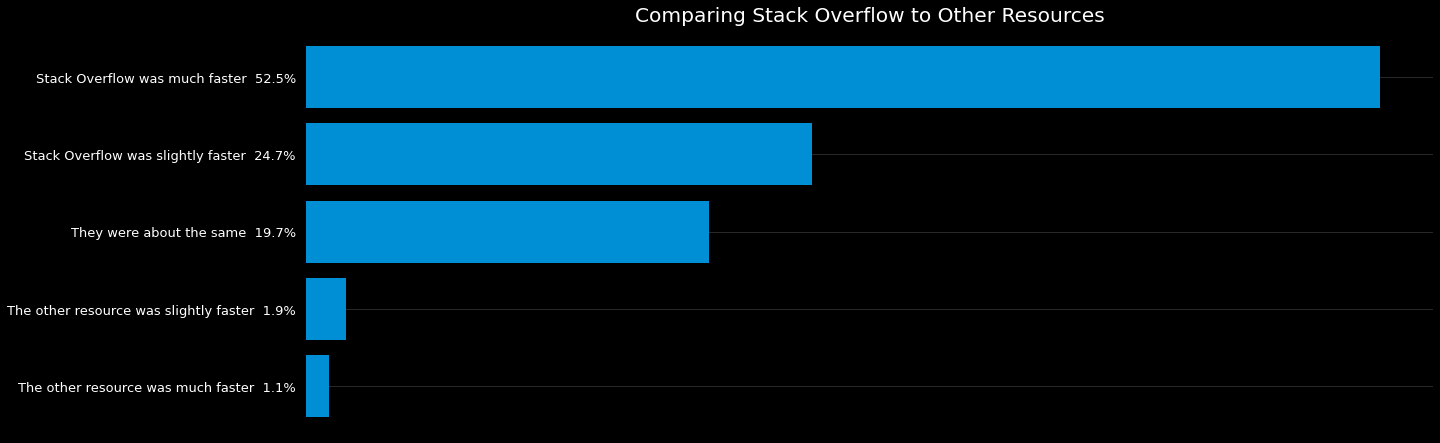

In [205]:
SOTimeSaved = data["SOTimeSaved"]
SOTimeSaved.dropna(inplace=True)

Dictionary_Distributor(SOTimeSaved , False)

Build_Barh_sizes( key_Phrases , Quantity, SOTimeSaved ,"fivethirtyeight", False , (18,7), "Comparing Stack Overflow to Other Resources")   # Building a schedule

<h5 style="text-align:center; " > <b>How Much Time Does Stack Overflow Save Developers?

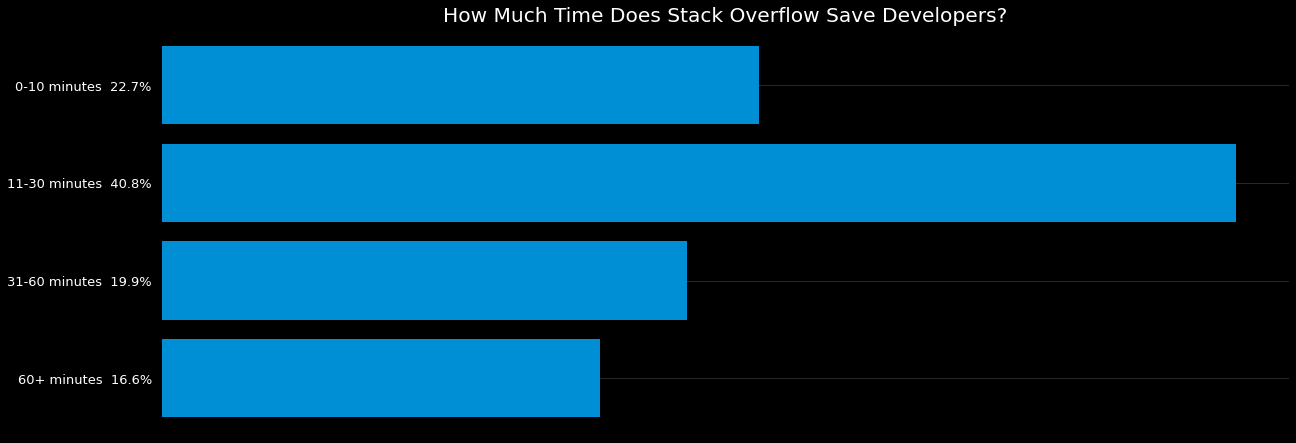

In [206]:
SOHowMuchTime = data["SOHowMuchTime"]
SOHowMuchTime.dropna(inplace=True)

SOHowMuchTime_Counted = Counter(SOHowMuchTime)

key_Phrases =  ['0-10 minutes','11-30 minutes', '31-60 minutes','60+ minutes' ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(SOHowMuchTime_Counted[i])

Build_Barh_sizes( key_Phrases , Quantity, SOHowMuchTime ,"fivethirtyeight", False , (18,7), "How Much Time Does Stack Overflow Save Developers?")   # Building a schedule

####  Engaging Together

<h5 style="text-align:center; " > <b>How Often Do Developers Participate on Stack Overflow?

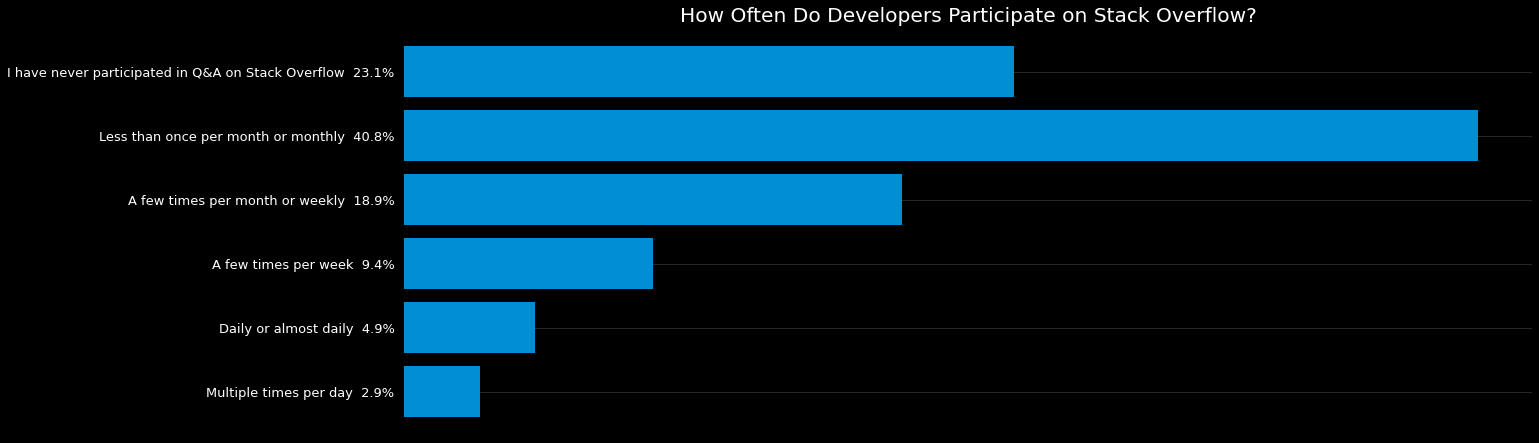

In [207]:
SOPartFreq = data["SOPartFreq"]
SOPartFreq.dropna(inplace=True)

SOPartFreq_Counted = Counter(SOPartFreq)

key_Phrases =  ['I have never participated in Q&A on Stack Overflow','Less than once per month or monthly', 'A few times per month or weekly','A few times per week', "Daily or almost daily", "Multiple times per day" ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(SOPartFreq_Counted[i])

Build_Barh_sizes( key_Phrases , Quantity, SOPartFreq ,"fivethirtyeight", False , (18,7), "How Often Do Developers Participate on Stack Overflow?")   # Building a schedule

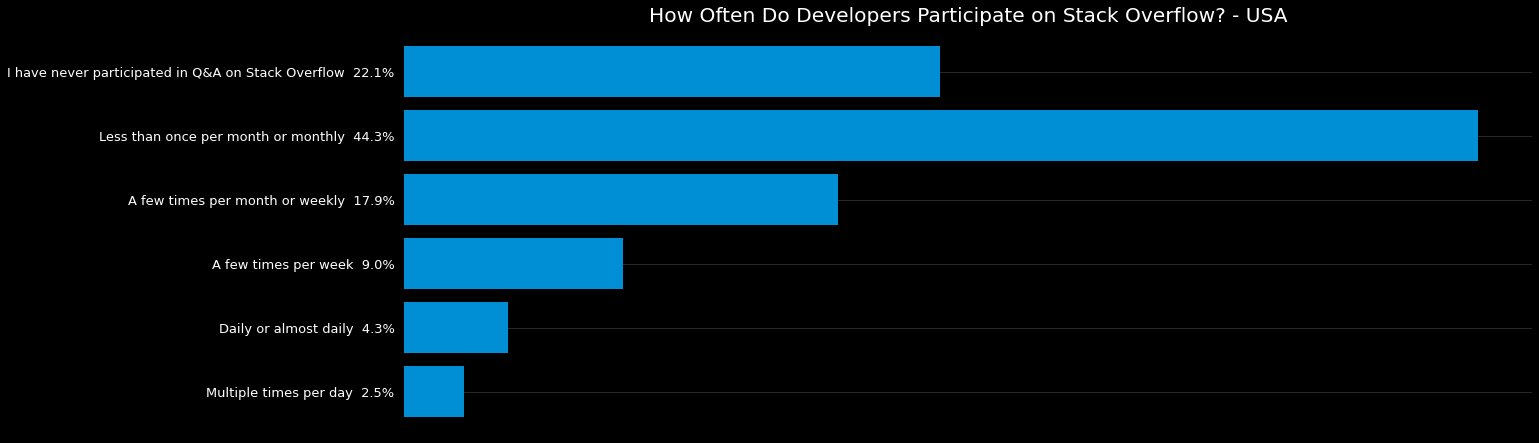

In [208]:
SOPartFreq = data ["SOPartFreq"]
SOPartFreq.dropna(inplace=True)

new_SOPartFreq = data[ (SOPartFreq != 'nan') & (data["Country"] == "United States")]
SOPartFreq = new_SOPartFreq["SOPartFreq"]

SOPartFreq_Counted = Counter(SOPartFreq)

key_Phrases =  ['I have never participated in Q&A on Stack Overflow','Less than once per month or monthly', 'A few times per month or weekly','A few times per week', "Daily or almost daily", "Multiple times per day" ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(SOPartFreq_Counted[i])


Build_Barh_sizes( key_Phrases , Quantity, SOPartFreq ,"fivethirtyeight", False , (18,7), "How Often Do Developers Participate on Stack Overflow? - USA")   # Building a schedule

<h5 style="text-align:center; " > <b>Do Developers Consider Themselves Part of the Stack Overflow Community?

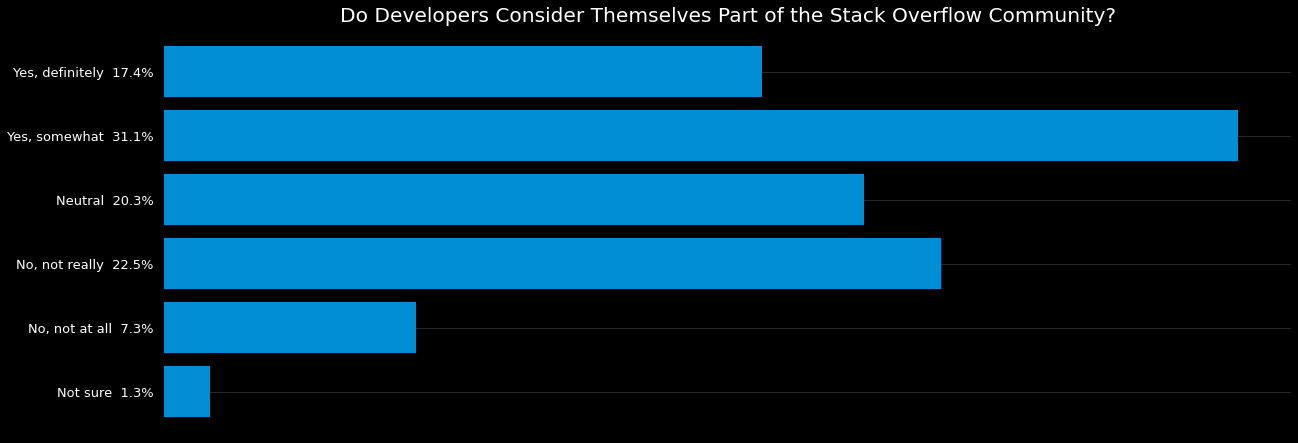

In [209]:
SOComm = data["SOComm"]
SOComm.dropna(inplace=True)

SOComm_Counted = Counter(SOComm)

key_Phrases =  ['Yes, definitely','Yes, somewhat','Neutral','No, not really', 'No, not at all' , 'Not sure'   ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(SOComm_Counted[i])

Build_Barh_sizes( key_Phrases , Quantity, SOComm ,"fivethirtyeight", False , (18,7), 'Do Developers Consider Themselves Part of the Stack Overflow Community?')   # Building a schedule

<h5 style="text-align:center; " > <b>Is Stack Overflow More Welcoming Than Last Year?

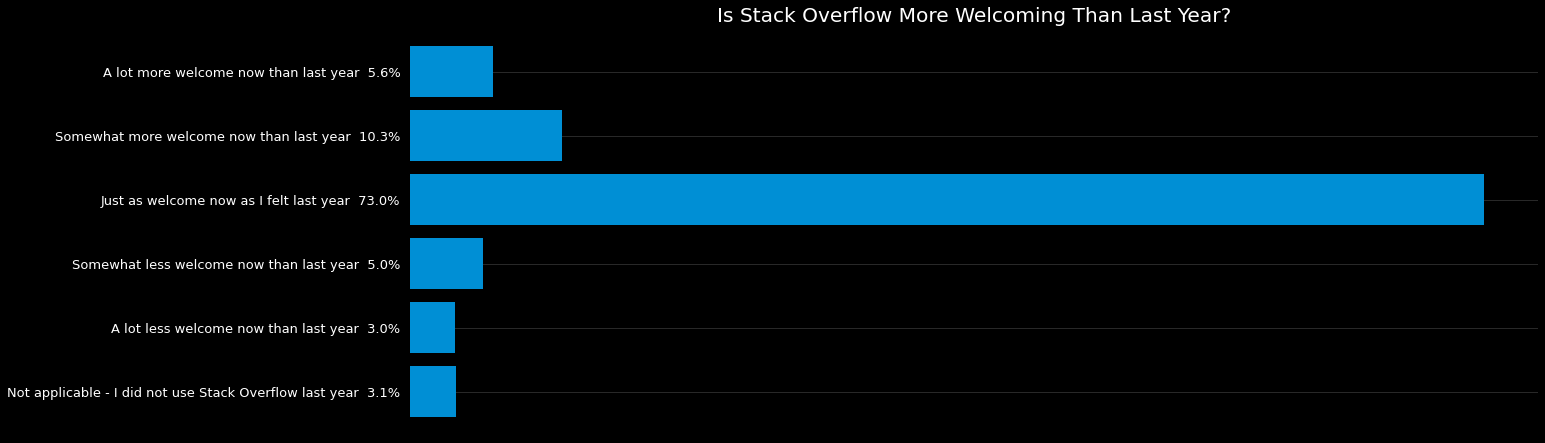

In [210]:
WelcomeChange = data["WelcomeChange"]
WelcomeChange.dropna(inplace=True)

WelcomeChange_Counted = Counter(WelcomeChange)

key_Phrases =  ['A lot more welcome now than last year','Somewhat more welcome now than last year','Just as welcome now as I felt last year','Somewhat less welcome now than last year', 'A lot less welcome now than last year' , 'Not applicable - I did not use Stack Overflow last year'   ]
key_Phrases.reverse()
Quantity = []

for i in key_Phrases:
    Quantity.append(WelcomeChange_Counted[i])

Build_Barh_sizes( key_Phrases , Quantity, WelcomeChange ,"fivethirtyeight", False , (18,7), 'Is Stack Overflow More Welcoming Than Last Year?')   # Building a schedule

<h5 style="text-align:center; " > <b>Opinions on New Content Types

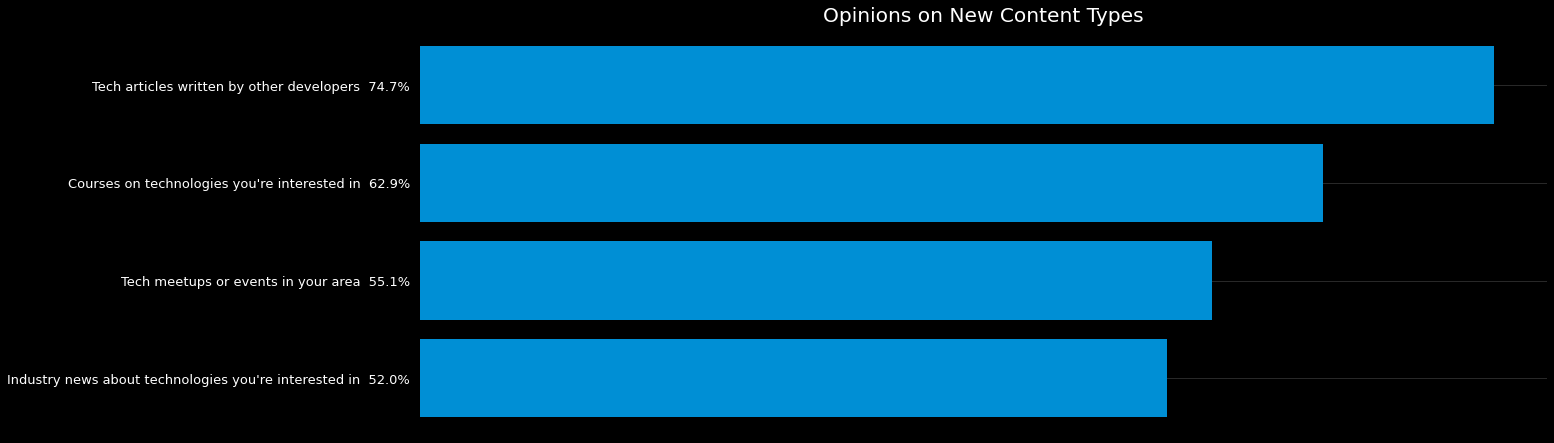

In [211]:
SONewContent = data["SONewContent"]
SONewContent.dropna(inplace=True)

SONewContent = SONewContent.str.split(";")

Double_list_sort_count(SONewContent, False)

Build_Barh_sizes( key_Phrases , Quantity, SONewContent ,"fivethirtyeight", False , (18,7), 'Opinions on New Content Types')   # Building a schedule
